# Unsupervised learning capstone

For your third capstone, you’ll complete an unsupervised learning project. You can choose your own research question or choose from one below.

Go out and find a dataset of interest. It could be one that helps you work on one of our recommended research questions, or any other dataset that addresses an unsupervised learning question of your own.

Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

Things to keep in mind: how do clustering and modeling compare? What are the advantages of each? Why would you want to use one over the other?

Be prepared to talk about:

- Your end-user and the value your project provides to them.
The end-user would be the CDC, WHO, any health and government organizations responsible for responding to outbreaks. The goal is to be able to anticipate animal disease outbreaks in an effort to minimize damage. 

- Quantifiable results based on the research you’ve conducted.
None as of yet

- The visuals you chose and what they represent for your research.


- Next steps you'd take to expand on your work.
Getting more data


- A specified research question your model addresses.
Can we predict when and where the next animal disease outbreaks will occur? Can we predict outbreaks that will lead to human disease?

- How you chose your model specification and what alternatives you compared it to.
K-means and GMM had the highest silhouette scores and lowest (?) Davies Bouldin indexes. 


- The practical uses of your model for an audience of interest.
None as of yet

- Any weak points or shortcomings of your model.
Clustering techniques weren't able to mirror dimensionaly reduced clusters

[Animal Outbreaks](https://www.kaggle.com/tentotheminus9/empres-global-animal-disease-surveillance)

# The Data

I've chosen to explore, and analze data on [animal disease outbreaks](https://www.kaggle.com/tentotheminus9/empres-global-animal-disease-surveillance) found on Kaggle gathered by EMPRES Global Animal Disease Information System (EMPRES-i), an application created to assist veterinary services by providing information on global diseases. The ability to understand the inception and spread of these diseases and ultimately predict where and how future incidents/episodes will unfold is crucial in our efforts to combat the damage caused. While some may believe the animals' health is irrelevant to us, this couldn't be farther from the truth - on an obvious level, because roughly 90% of the world's population eats meat it is advantageous for us to keep our fellow animals healthy. What is less known but perhaps even more important is that many epidemiologists believe it's likely that the next pandemic will come from an animal, similar to the SARS and MERS viruses that have killed hundreds.

The data includes just over 17,000 cases of animal outbreaks. Each row represents a different outbreak so there are some repeating diseases. Variables include timing, place, species, and diseases, as well as information on the number of animals and humans affected. I'll use clustering and other unsupervised learning in an effort to learn about the onset and dispersion of animal disease outbreaks. Ideally, the data will collect in such a way that I am able to differentiate/locate/predict outbreaks with pandemic potential.

# Animal Disease Outbreaks

- data gathered by EMPRES Global Animal Disease Information System (EMPRES-i)
- 1918 avian Influenza
    - infected 500 million
    - killed 50-100 million
- more recently MERS & SARS, caused by Coronavirus

# The Data

- \> 17,000 cases
- reported 2015-2017
- variables include timing, location, species, disease
- half of the variables missing values
- potential target: outbreaks with pandemic potential


In [246]:
!pip3 install RISE

     |████████████████████████████████| 4.0MB 1.6MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [247]:
pip install --upgrade pip

     |████████████████████████████████| 1.4MB 1.2MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip3 install hdbscan --no-binary :all:

  Using cached hdbscan-0.8.24.tar.gz (4.4 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.7/bin/python3 /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pip install --ignore-installed --no-user --prefix /private/var/folders/f8/5zxmhd9j2rqd26b2bw_6x1k80000gn/T/pip-build-env-0ifwalss/overlay --no-warn-script-location --no-binary :all: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel cython numpy
       cwd: None
  Complete output (373 lines):
    Using cached setuptools-45.1.0.zip (859 kB)
    Using cached wheel-0.34.1.tar.gz (55 kB)
    Using cached Cython-0.29.14.tar.gz (2.1 MB)
    Using cached numpy-1.18.1.zip (5.4 MB)
    Installing build dependencies: started
    Installing build dependencies: finished with status 'error'
    ERROR: Command errored out with exit status 1:
     command: /Library/Frameworks/Python.framework/Version

In [2]:
import os
os.chdir('/Users/sophiaperides/Desktop/Thinkful')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml
%matplotlib inline
from datetime import datetime, timedelta
import re


from matplotlib import image
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import normalize
import scipy.stats as stats
from sklearn.neural_network import MLPClassifier
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from keras.layers import Input,Dense
from keras.models import Model

import keras
from sklearn.decomposition import PCA
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
# import hdbscan
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics
from sklearn.neural_network import BernoulliRBM
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage as lnkg

Using TensorFlow backend.


In [3]:
outbreaks1 = pd.read_csv('Outbreak1.csv')
outbreaks2 = pd.read_csv('Outbreak2.csv')
outbreaks3 = pd.read_csv('Outbreak3.csv')
outbreaks4 = pd.read_csv('Outbreak4.csv')
outbreaks5 = pd.read_csv('Outbreak5.csv')
outbreaks6 = pd.read_csv('Outbreak6.csv')
outbreaks = outbreaks1.append([outbreaks2, outbreaks3, outbreaks4, outbreaks5, outbreaks6])
print(outbreaks.columns)
print(outbreaks.info())


Index(['Id', 'source', 'latitude', 'longitude', 'region', 'country', 'admin1',
       'localityName', 'localityQuality', 'observationDate', 'reportingDate',
       'status', 'disease', 'serotypes', 'speciesDescription', 'sumAtRisk',
       'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered',
       'humansGenderDesc', 'humansAge', 'humansAffected', 'humansDeaths'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 4999
Data columns (total 24 columns):
Id                    30000 non-null int64
source                30000 non-null object
latitude              30000 non-null float64
longitude             30000 non-null float64
region                30000 non-null object
country               30000 non-null object
admin1                30000 non-null object
localityName          30000 non-null object
localityQuality       30000 non-null object
observationDate       29314 non-null object
reportingDate         30000 non-null object
status     

# Humans Affected

- potential problem with data

In [4]:
print('Value counts for humansAffected: \n', outbreaks.humansAffected.value_counts())
print('Value counts for humansDeaths: \n', outbreaks.humansDeaths.value_counts())

Value counts for humansAffected: 
 1.0      1589
0.0        16
3.0         2
11.0        1
5.0         1
78.0        1
100.0       1
145.0       1
24.0        1
4.0         1
2.0         1
Name: humansAffected, dtype: int64
Value counts for humansDeaths: 
 1.0    434
0.0     32
2.0      2
6.0      1
3.0      1
Name: humansDeaths, dtype: int64


# The Cleaning

More than half of the variables are not missing any data which is a great start. Just under 7,000 rows are missing information on serotypes so I will fill these with 'Uknown Serotypes'. Similarly, under 2,000 rows are missing in speciesDescription, so these will be filled with 'Unknown Species'. Additionally, the information populating these cells are lists of animals so I will create new dummy variables with keywords, including 'wild' and 'domestic'. Finally, I'll create new features 'birds' and 'mammals' which will indicate whether a disease affected these classes.

Empty cells in sumAtRisk, sumCases, sumDeaths, sumDestroyed, sumSlaughtered, and humansAge will be filled with the mean value of these columns. I will drop the column humansGenderDesc as there is simply not enough information for me to populate the missing values. As for humansAffected and humansDeaths, I'll populate missing values with the mode.

All dates in the data will be converted to datetime objects and create variables for the year, month, and day of the observation. Missing variables in observationDate will be filled by finding the average difference between the observationDate and reportingDate, and subtracting this number from the reportingDate. A new variable, 'differenceInDays', will be created by finding the difference between the observationDate and reportingDate for each instance. There are just over 3,700 entries with observationDate values after reportingDates. This is impossible, so I will delete these rows.

Dummies will be created for source, region, country, localityQuality, disease, serotypes, and status.

In [5]:
outbreaks.serotypes.fillna('UknownSerotypes', inplace=True)
outbreaks.speciesDescription.fillna('UknownSpecies', inplace=True)
outbreaks.sumAtRisk.fillna(outbreaks.sumAtRisk.mean(), inplace=True)
outbreaks.sumCases.fillna(outbreaks.sumCases.mean(), inplace=True)
outbreaks.sumDeaths.fillna(outbreaks.sumDeaths.mean(), inplace=True)
outbreaks.sumDestroyed.fillna(outbreaks.sumDestroyed.mean(), inplace=True)
outbreaks.sumSlaughtered.fillna(outbreaks.sumSlaughtered.mean(), inplace=True)
outbreaks.drop(columns=['humansGenderDesc'], inplace=True)
outbreaks.humansAge.fillna(outbreaks.humansAge.mean(), inplace=True)
outbreaks.humansAffected.fillna(outbreaks.humansAffected.mode()[0], inplace=True)
outbreaks.humansDeaths.fillna(outbreaks.humansDeaths.mode()[0], inplace=True)

In [6]:
print('Reporting Dates: \n', outbreaks.reportingDate.head())
print('Observation Dates: \n', outbreaks.observationDate.head())

Reporting Dates: 
 0    19/12/2019
1    23/12/2019
2    23/12/2019
3    23/12/2019
4    23/12/2019
Name: reportingDate, dtype: object
Observation Dates: 
 0    17/09/2019
1    23/12/2019
2    23/12/2019
3    20/12/2019
4    19/12/2019
Name: observationDate, dtype: object


In [7]:
# Creating a new dataframe to handle the dates
outbreaks['observationDate'] = pd.to_datetime(outbreaks['observationDate'])
outbreaks['reportingDate'] = pd.to_datetime(outbreaks['reportingDate'])
outbreaks_time = outbreaks[['observationDate', 'reportingDate']]
outbreaks_time.dropna(inplace=True)

# Find the average difference between observation and reporting dates
outbreaks_time['differenceInDays'] = (outbreaks_time['reportingDate'] - outbreaks_time['observationDate'])/np.timedelta64(1,'D')
                                                                     
print('Average difference between observation and reporting dates: ', outbreaks_time['differenceInDays'].mean())
outbreaks.observationDate.fillna(outbreaks.reportingDate - timedelta(days=33), inplace=True)

# Creating a new variable
outbreaks['differenceInDays'] = (outbreaks['reportingDate'] - outbreaks['observationDate'])/np.timedelta64(1,'D')


Average difference between observation and reporting dates:  29.083953059971346


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
outbreaks.differenceInDays.head()

0    93.0
1     0.0
2     0.0
3     3.0
4     4.0
Name: differenceInDays, dtype: float64

In [9]:
outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 4999
Data columns (total 24 columns):
Id                    30000 non-null int64
source                30000 non-null object
latitude              30000 non-null float64
longitude             30000 non-null float64
region                30000 non-null object
country               30000 non-null object
admin1                30000 non-null object
localityName          30000 non-null object
localityQuality       30000 non-null object
observationDate       30000 non-null datetime64[ns]
reportingDate         30000 non-null datetime64[ns]
status                30000 non-null object
disease               30000 non-null object
serotypes             30000 non-null object
speciesDescription    30000 non-null object
sumAtRisk             30000 non-null float64
sumCases              30000 non-null float64
sumDeaths             30000 non-null float64
sumDestroyed          30000 non-null float64
sumSlaughtered        30000 non-nul

In [10]:
outbreaks['observationYear'] = pd.DatetimeIndex(outbreaks['observationDate']).year
outbreaks['observationMonth'] = pd.DatetimeIndex(outbreaks['observationDate']).month
outbreaks['observationDay'] = pd.DatetimeIndex(outbreaks['observationDate']).day
outbreaks['reportYear'] = pd.DatetimeIndex(outbreaks['reportingDate']).year
outbreaks['reportMonth'] = pd.DatetimeIndex(outbreaks['reportingDate']).month
outbreaks['reportDay'] = pd.DatetimeIndex(outbreaks['reportingDate']).day
outbreaks['observationFirstHalfMonth'] = outbreaks['observationDay'].apply(lambda x: 1 if x <= 15 else 0 )
outbreaks['observationSecondHalfMonth'] = outbreaks['observationDay'].apply(lambda x: 1 if x > 15 else 0 )

In [11]:
outbreaks.observationYear.value_counts()

2016    8445
2018    7333
2017    7079
2019    7019
2015     120
2020       3
2014       1
Name: observationYear, dtype: int64

In [12]:
outbreaks.reportYear.value_counts()

2017    8178
2019    7613
2016    7075
2018    7015
2020      70
2015      49
Name: reportYear, dtype: int64

In [13]:
pd.options.display.max_columns = None
outbreaks.head()

Id source  latitude  longitude    region             country  \
0  264093    OIE  18.24055 -70.282265  Americas  Dominican Republic   
1  264044    OIE  44.10990  26.804200    Europe             Romania   
2  264043    OIE  44.93120  25.626100    Europe             Romania   
3  264042    OIE  45.16140  25.392900    Europe             Romania   
4  264041    OIE  44.97410  25.464800    Europe             Romania   

      admin1 localityName localityQuality observationDate reportingDate  \
0    Peravia      Peravia           Exact      2019-09-17    2019-12-19   
1   Calarasi      Chislet           Exact      2019-12-23    2019-12-23   
2  Dimbovita       Adanca           Exact      2019-12-23    2019-12-23   
3  Dimbovita        Runcu           Exact      2019-12-20    2019-12-23   
4  Dimbovita     Viforata           Exact      2019-12-19    2019-12-23   

      status              disease        serotypes speciesDescription  \
0  Confirmed    Newcastle disease  UknownSerotypes  domestic, chicken   
1  Confirmed  African swine fever  UknownSerotypes    wild, wild boar   
2  Confirmed  African swine fever  UknownSerotypes    wild, wild boar   
3  Confirmed  African swine fever  UknownSerotypes    wild, wild boar   
4  Confirmed  African swine fever  UknownSerotypes    wild, wild boar   

      sumAtRisk  sumCases  sumDeaths  sumDestroyed  sumSlaughtered  humansAge  \
0  13191.000000   13191.0     6809.0   6382.000000      202.743361   8.823313   
1   6806.056084       1.0        1.0   3095.466068      202.743361   8.823313   
2   6806.056084       1.0        0.0      1.000000      202.743361   8.823313   
3   6806.056084       2.0        0.0      2.000000      202.743361   8.823313   
4     18.000000      18.0        1.0     17.000000      202.743361   8.823313   

   humansAffected  humansDeaths  differenceInDays  observationYear  \
0             1.0           1.0              93.0             2019   
1             1.0           1.0               0.0             2019   
2             1.0           1.0               0.0             2019   
3             1.0           1.0               3.0             2019   
4             1.0           1.0               4.0             2019   

   observationMonth  observationDay  reportYear  reportMonth  reportDay  \
0                 9              17        2019           12         19   
1                12              23        2019           12         23   
2                12              23        2019           12         23   
3                12              20        2019           12         23   
4                12              19        2019           12         23   

   observationFirstHalfMonth  observationSecondHalfMonth  
0                          0                           1  
1                          0                           1  
2                          0                           1  
3                          0                           1  
4                          0                           1

In [14]:
print('Unique values in source: ', len(outbreaks.source.unique()))
print('Unique values in region: ', len(outbreaks.region.unique()))
print('Unique values in country: ', len(outbreaks.country.unique()))
print('Unique values in admin1: ', len(outbreaks.admin1.unique()))
print('Unique values in localityName: ', len(outbreaks.localityName.unique()))
print('Unique values in localityQuality: ', len(outbreaks.localityQuality.unique()))
print('Unique values in status: ', len(outbreaks.status.unique()))
print('Unique values in disease: ', len(outbreaks.disease.unique()))
print('Unique values in serotypes: ', len(outbreaks.serotypes.unique()))
print('Unique values in speciesDescription: ', len(outbreaks.speciesDescription.unique()))


Unique values in source:  14
Unique values in region:  4
Unique values in country:  140
Unique values in admin1:  1312
Unique values in localityName:  16763
Unique values in localityQuality:  5
Unique values in status:  2
Unique values in disease:  25
Unique values in serotypes:  62
Unique values in speciesDescription:  371


In [15]:
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['source'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['region'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['country'])], axis=1)
outbreaks.drop(columns=['admin1', 'localityName'], inplace=True)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['localityQuality'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['status'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['disease'])], axis=1)
outbreaks = pd.concat([outbreaks, pd.get_dummies(outbreaks['serotypes'])], axis=1)


In [16]:
outbreaks.speciesDescription.unique()

array(['domestic, chicken', 'wild, wild boar', 'domestic, swine',
       'domestic, cattle', 'domestic, dog', 'domestic, cat',
       'domestic, unspecified bird', 'domestic, ostrich',
       'domestic, goat/sheep ', 'domestic, sheep',
       'wild,mute swan (cygnus olor))', 'UknownSpecies', 'domestic, duck',
       'domestic, turkey', 'domestic, goose', 'wild, crow',
       'environmental sample, unspecified bird', 'domestic, equidae',
       'domestic, muscovy ducks', 'domestic, quail',
       'environmental sample, unspecified env. sample, environmental sample, unspecified env. sample',
       'environmental sample, unspecified env. sample', 'domestic, horse',
       'wild, unspecified bird', 'wild, owl',
       'environmental sample, unspecified bird, environmental sample, unspecified bird',
       'domestic, goat, domestic, sheep',
       'wild,rose pelican (pelecanus onocrotalus))',
       'wild,greater flamingo (phoenicopterus roseus))', 'domestic, goat',
       'domestic, cattl

In [17]:
outbreaks['wild'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'wild' in x else 0)
outbreaks['undomestic'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'undomestic' in x else 0)
outbreaks['domestic'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'domestic' in x else 0)
outbreaks['captive'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'captive' in x else 0)
outbreaks['unspecified'] = outbreaks.speciesDescription.apply(lambda x: 1 if 'unspecified' in x else 0)
outbreaks.head(10)

Id source   latitude  longitude    region             country  \
0  264093    OIE  18.240550 -70.282265  Americas  Dominican Republic   
1  264044    OIE  44.109900  26.804200    Europe             Romania   
2  264043    OIE  44.931200  25.626100    Europe             Romania   
3  264042    OIE  45.161400  25.392900    Europe             Romania   
4  264041    OIE  44.974100  25.464800    Europe             Romania   
5  264040    OIE  45.194500  26.975600    Europe             Romania   
6  264039    OIE  47.190800  22.512200    Europe             Romania   
7  264038    OIE  47.743900  23.311200    Europe             Romania   
8  264037    OIE  44.818976  25.821518    Europe             Romania   
9  264036    OIE  44.666521  23.574296    Europe             Romania   

  localityQuality observationDate reportingDate     status  \
0           Exact      2019-09-17    2019-12-19  Confirmed   
1           Exact      2019-12-23    2019-12-23  Confirmed   
2           Exact      2019-12-23    2019-12-23  Confirmed   
3           Exact      2019-12-20    2019-12-23  Confirmed   
4           Exact      2019-12-19    2019-12-23  Confirmed   
5           Exact      2019-12-12    2019-12-23  Confirmed   
6           Exact      2019-12-20    2019-12-23  Confirmed   
7           Exact      2019-12-14    2019-12-20  Confirmed   
8           Exact      2019-12-18    2019-12-20  Confirmed   
9           Exact      2019-12-16    2019-12-20  Confirmed   

               disease        serotypes speciesDescription     sumAtRisk  \
0    Newcastle disease  UknownSerotypes  domestic, chicken  13191.000000   
1  African swine fever  UknownSerotypes    wild, wild boar   6806.056084   
2  African swine fever  UknownSerotypes    wild, wild boar   6806.056084   
3  African swine fever  UknownSerotypes    wild, wild boar   6806.056084   
4  African swine fever  UknownSerotypes    wild, wild boar     18.000000   
5  African swine fever  UknownSerotypes    wild, wild boar      7.000000   
6  African swine fever  UknownSerotypes    wild, wild boar   6806.056084   
7  African swine fever  UknownSerotypes    wild, wild boar   6806.056084   
8  African swine fever  UknownSerotypes    wild, wild boar   6806.056084   
9  African swine fever  UknownSerotypes    wild, wild boar   6806.056084   

   sumCases    sumDeaths  sumDestroyed  sumSlaughtered  humansAge  \
0   13191.0  6809.000000   6382.000000      202.743361   8.823313   
1       1.0     1.000000   3095.466068      202.743361   8.823313   
2       1.0     0.000000      1.000000      202.743361   8.823313   
3       2.0     0.000000      2.000000      202.743361   8.823313   
4      18.0     1.000000     17.000000      202.743361   8.823313   
5       7.0     1.000000      6.000000      202.743361   8.823313   
6       1.0     1.000000   3095.466068      202.743361   8.823313   
7       1.0     1.000000   3095.466068      202.743361   8.823313   
8       2.0     2.000000   3095.466068      202.743361   8.823313   
9       1.0   176.405431      1.000000      202.743361   8.823313   

   humansAffected  humansDeaths  differenceInDays  observationYear  \
0             1.0           1.0              93.0             2019   
1             1.0           1.0               0.0             2019   
2             1.0           1.0               0.0             2019   
3             1.0           1.0               3.0             2019   
4             1.0           1.0               4.0             2019   
5             1.0           1.0              11.0             2019   
6             1.0           1.0               3.0             2019   
7             1.0           1.0               6.0             2019   
8             1.0           1.0               2.0             2019   
9             1.0           1.0               4.0             2019   

   observationMonth  observationDay  reportYear  reportMonth  reportDay  \
0                 9              17        2019           12         19   
1            

In [18]:
birds = ['bird', 'swan', 'turkey', 'mallard', 'goose', 'duck', 'pigeon', 'heron', 'accipitridae', 'gull', 
         'phasianidae', 'eagle', 'chicken', 'buzzard', 'falcon', 'anatidae', 'fowl', 'eider', 'pelican', 'wigeon',
        'dove', 'rook', 'stork', 'egret', ' peafowl', 'cormorant', 'coot', 'crow', 'scaup', 'teal', 'magpie', 
         'kestrel', 'blackbird', 'gadwall', 'pochard', 'shelduck', 'parrot', 'tern', ' grebe', 'flamingo', 'eagle-owl',
        'accipiter gentilis', 'ibis', 'ibex', 'emu', 'xpeacock', 'magpie-robin', 'ostrich']
mammals = ['swine', 'boar', 'equidae', 'dog', 'sheep', 'cat', 'goat/sheep', 'goat', 'camelidae', 'horse',
          'fox', 'jackal', ' saiga', 'yaks', 'hippopotamus', 'buffaloe', 'deer', 'canine', 'elephant', 'mammal', 'cattle']

outbreaks['speciesDescription'] = outbreaks.speciesDescription.apply(lambda x: re.split('\s', x))
outbreaks['birds'] = outbreaks.speciesDescription.apply(lambda x: 1 if len(set(x) & set(birds)) > 0  else 0) 
outbreaks['mammals'] = outbreaks.speciesDescription.apply(lambda x: 1 if len(set(x) & set(mammals)) > 0  else 0)
outbreaks.head()

Id source  latitude  longitude    region             country  \
0  264093    OIE  18.24055 -70.282265  Americas  Dominican Republic   
1  264044    OIE  44.10990  26.804200    Europe             Romania   
2  264043    OIE  44.93120  25.626100    Europe             Romania   
3  264042    OIE  45.16140  25.392900    Europe             Romania   
4  264041    OIE  44.97410  25.464800    Europe             Romania   

  localityQuality observationDate reportingDate     status  \
0           Exact      2019-09-17    2019-12-19  Confirmed   
1           Exact      2019-12-23    2019-12-23  Confirmed   
2           Exact      2019-12-23    2019-12-23  Confirmed   
3           Exact      2019-12-20    2019-12-23  Confirmed   
4           Exact      2019-12-19    2019-12-23  Confirmed   

               disease        serotypes    speciesDescription     sumAtRisk  \
0    Newcastle disease  UknownSerotypes  [domestic,, chicken]  13191.000000   
1  African swine fever  UknownSerotypes   [wild,, wild, boar]   6806.056084   
2  African swine fever  UknownSerotypes   [wild,, wild, boar]   6806.056084   
3  African swine fever  UknownSerotypes   [wild,, wild, boar]   6806.056084   
4  African swine fever  UknownSerotypes   [wild,, wild, boar]     18.000000   

   sumCases  sumDeaths  sumDestroyed  sumSlaughtered  humansAge  \
0   13191.0     6809.0   6382.000000      202.743361   8.823313   
1       1.0        1.0   3095.466068      202.743361   8.823313   
2       1.0        0.0      1.000000      202.743361   8.823313   
3       2.0        0.0      2.000000      202.743361   8.823313   
4      18.0        1.0     17.000000      202.743361   8.823313   

   humansAffected  humansDeaths  differenceInDays  observationYear  \
0             1.0           1.0              93.0             2019   
1             1.0           1.0               0.0             2019   
2             1.0           1.0               0.0             2019   
3             1.0           1.0               3.0             2019   
4             1.0           1.0               4.0             2019   

   observationMonth  observationDay  reportYear  reportMonth  reportDay  \
0                 9              17        2019           12         19   
1                12              23        2019           12         23   
2                12              23        2019           12         23   
3                12              20        2019           12         23   
4                12              19        2019           12         23   

   observationFirstHalfMonth  observationSecondHalfMonth  EC  FAO ECTAD RAF  \
0                          0                           1   0              0   
1                          0                           1   0              0   
2                          0                           1   0              0   
3                          0                           1   0              0   
4                          0                           1   0              0   

   FAO Field Officer  FAO officer  FAO-Report  \
0                  0            0           0   
1                  0            0           0   
2                  0            0           0   
3                  0            0           0   
4                  0            0           0   

   International reference laboratory  Media  \
0                                   0      0   
1                                   0      0   
2                                   0      0   
3                                   0      0   
4                                   0      0   

   National Institute for Communicable Diseases, NICD  National authorities  \
0                                                  0                      0   
1                                                  0                      0   
2                                                  0                      0   
3                                                  0                      0   
4  

In [19]:
outbreaks[(outbreaks['birds'] == 1) & (outbreaks['mammals'] == 1)] # empty
outbreaks[(outbreaks['wild'] == 1) & (outbreaks['domestic'] == 1)] # not empty
pd.set_option('display.max_row', 1000)
outbreaks[(outbreaks['birds'] == 0) & (outbreaks['mammals'] == 0)]

Id                source   latitude  longitude region  \
143   263336  National authorities  24.130000  55.800000   Asia   
549   262838  National authorities  25.305276  51.505555   Asia   
550   262837  National authorities  25.305276  51.505555   Asia   
551   262836  National authorities  25.305276  51.505555   Asia   
552   262835  National authorities  28.360000  45.950000   Asia   
...      ...                   ...        ...        ...    ...   
4995  210939  National authorities  25.248333  45.252778   Asia   
4996  210938  National authorities  26.509766  45.350168   Asia   
4997  210937  National authorities  24.711660  46.724100   Asia   
4998  210936  National authorities  24.711660  46.724100   Asia   
4999  210935  National authorities  19.000000  43.000000   Asia   

                   country  localityQuality observationDate reportingDate  \
143   United Arab Emirates          Unknown      2019-08-12    2020-08-01   
549                  Qatar  Centroid Admin1      2019-11-29    2019-12-26   
550                  Qatar  Centroid Admin1      2019-11-29    2019-12-26   
551                  Qatar  Centroid Admin1      2019-11-23    2019-12-26   
552           Saudi Arabia          Unknown      2019-12-20    2019-12-23   
...                    ...              ...             ...           ...   
4995          Saudi Arabia            Exact      2016-02-15    2016-02-29   
4996          Saudi Arabia            Exact      2016-02-23    2016-02-29   
4997          Saudi Arabia            Exact      2016-01-27    2016-02-29   
4998          Saudi Arabia            Exact      2016-02-19    2016-02-28   
4999          Saudi Arabia            Exact      2016-02-19    2016-02-27   

         status    disease        serotypes speciesDescription    sumAtRisk  \
143   Confirmed  MERS-CoV   UknownSerotypes    [UknownSpecies]  6806.056084   
549   Confirmed  MERS-CoV   UknownSerotypes    [UknownSpecies]  6806.056084   
550   Confirmed  MERS-CoV   UknownSerotypes    [UknownSpecies]  6806.056084   
551   Confirmed  MERS-CoV   UknownSerotypes    [UknownSpecies]  6806.056084   
552   Confirmed  MERS-CoV   UknownSerotypes    [UknownSpecies]  6806.056084   
...         ...        ...              ...                ...          ...   
4995  Confirmed  MERS-CoV   UknownSerotypes    [UknownSpecies]  6806.056084   
4996  Confirmed  MERS-CoV   UknownSerotypes    [UknownSpecies]  6806.056084   
4997  Confirmed  MERS-CoV   UknownSerotypes    [UknownSpecies]  6806.056084   
4998  Confirmed  MERS-CoV   UknownSerotypes    [UknownSpecies]  6806.056084   
4999  Confirmed  MERS-CoV   UknownSerotypes    [UknownSpecies]  6806.056084   

        sumCases   sumDeaths  sumDestroyed  sumSlaughtered  humansAge  \
143   293.794046  176.405431   3095.466068      202.743361  74.000000   
549   293.794046  176.405431   3095.466068      202.743361  32.000000   
550   293.794046  176.405431   3095.466068      202.743361  50.000000   
551   293.794046  176.405431   3095.466068      202.743361  67.000000   
552   293.794046  176.405431   3095.466068      202.743361  70.000000   
...          ...         ...           ...             ...        ...   
4995  293.794046  176.405431   3095.466068      202.743361   8.823313   
4996  293.794046  176.405431   3095.466068      202.743361   8.823313   
4997  293.794046  176.405431   3095.466068      202.743361   8.823313   
4998  293.794046  176.405431   3095.466068      202.743361   8.823313   
4999  293.794046  176.405431   3095.466068      202.743361   8.823313   

      humansAffected  humansDeaths  differenceInDays  observationYear  \
143              1.0           1.0             355.0             2019   
549              1.0           1.0              27.0             2019   
550              1.0           1.0              27.0             2019   
551              1.0           1.0              33.0             2019   
552              1.0           1.0               3.0             2019   
...             

In [20]:
print(outbreaks[outbreaks['differenceInDays'] < 0].shape)
outbreaks = outbreaks[outbreaks.differenceInDays > 0]

(7417, 289)


In [21]:
print(outbreaks.disease.value_counts())

# creating a dataframe including the eight most common diseases (diseases that showed up over 100 times)
top8_diseases = outbreaks[(outbreaks['Influenza - Avian'] == 1) | (outbreaks['Bluetongue'] == 1) |
                          (outbreaks['African swine fever'] == 1) | (outbreaks['Lumpy skin disease'] == 1)|
                          (outbreaks['MERS-CoV '] == 1) | (outbreaks['Foot and mouth disease'] == 1)|
                          (outbreaks['Newcastle disease'] == 1) | (outbreaks['Sheep pox and goat pox'] == 1)]
outbreaks['top8_diseases'] = outbreaks.apply(lambda row: row['Influenza - Avian'] + row['Bluetongue'] +                           (outbreaks['African swine fever'] == 1) | (outbreaks['Lumpy skin disease'] == 1)|
                          row['MERS-CoV '] + row['Foot and mouth disease'] +
                          row['Newcastle disease'] + row['Sheep pox and goat pox'], axis=1)


African swine fever                              8559
Influenza - Avian                                5398
Bluetongue                                       3001
Lumpy skin disease                               1532
Foot and mouth disease                           1106
MERS-CoV                                          640
Rabies                                            374
Classical swine fever                             373
Newcastle disease                                 213
Peste des petits ruminants                        144
Sheep pox and goat pox                            132
Influenza - Equine                                102
Anthrax                                            97
West Nile Fever                                    89
Rift Valley fever                                  84
Equine infectious anaemia                          27
Bovine spongiform encephalopathy                   13
African horse sickness                             12
Porcine reproductive and res

ValueError: Wrong number of items passed 21918, placement implies 1

## Diseases

In [ ]:
top8_diseases.head()

plt.figure(figsize=(17,8))
box = sns.boxplot(y='sumCases', x='disease', data=top8_diseases)
plt.title('sumCases vs disease')
box.set_ylim(0, 1000)
plt.show()


plt.figure(figsize=(17,8))
box = sns.boxplot(y='sumDeaths', x='disease', data=top8_diseases)
plt.title('sumDeaths vs disease')
box.set_ylim(0, 1000)
plt.show()

plt.figure(figsize=(17,8))
box = sns.boxplot(y='sumSlaughtered', x='disease', data=top8_diseases)
plt.title('sumSlaughtered vs disease')
box.set_ylim(0, 400)
plt.show()

plt.figure(figsize=(10,5))
box = sns.boxplot(y='sumCases', x='top8_diseases', data=outbreaks)
plt.title('sumCases vs top8_diseases')
box.set_ylim(0, 1000)
plt.show()

plt.figure(figsize=(10,5))
box = sns.boxplot(y='sumDeaths', x='top8_diseases', data=outbreaks)
plt.title('sumDeaths vs top8_diseases')
box.set_ylim(0, 1000)
plt.show()

In [ ]:
outbreaks.describe()

# Visualizations

## Timing

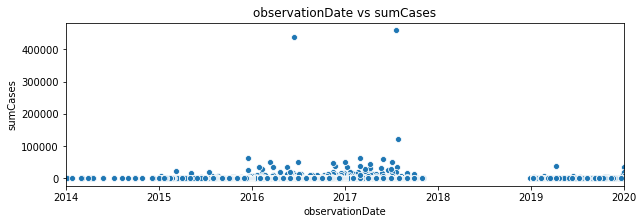

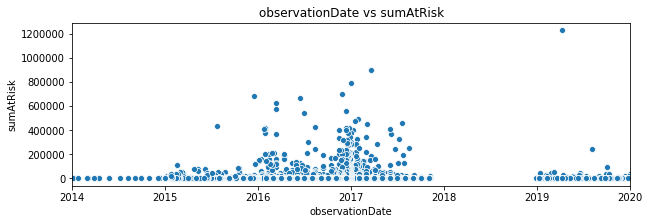

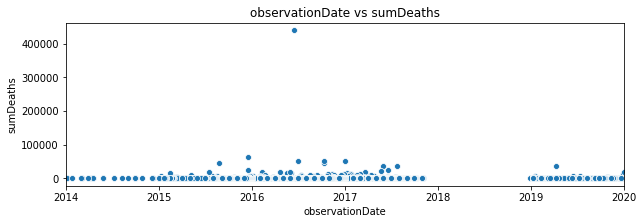

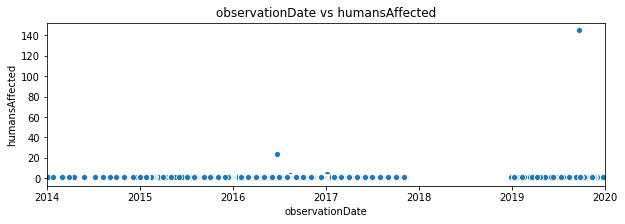

In [45]:
plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['observationDate'], y=outbreaks['sumCases'])
scatterplot.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2020-01-01'))
plt.title('observationDate vs sumCases')
plt.show()

plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['observationDate'], y=outbreaks['sumAtRisk'])
scatterplot.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2020-01-01'))
plt.title('observationDate vs sumAtRisk')
plt.show()

plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['observationDate'], y=outbreaks['sumDeaths'])
scatterplot.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2020-01-01'))
plt.title('observationDate vs sumDeaths')
plt.show()

plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['observationDate'], y=outbreaks['humansAffected'])
scatterplot.set_xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2020-01-01'))
plt.title('observationDate vs humansAffected')
plt.show()

## Discrepancy Between Observation and Reporting Dates

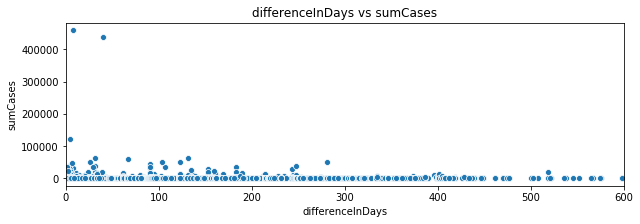

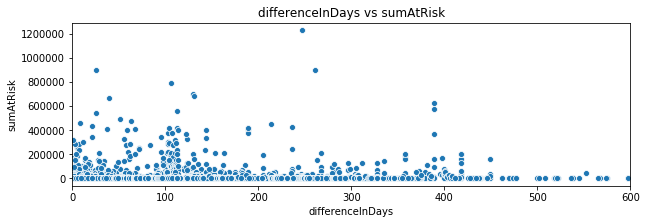

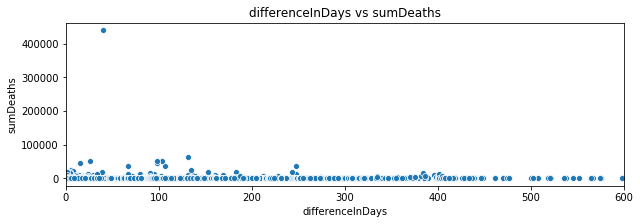

In [22]:
plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['differenceInDays'], y=outbreaks['sumCases'])
plt.title('differenceInDays vs sumCases')
scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['differenceInDays'], y=outbreaks['sumAtRisk'])
plt.title('differenceInDays vs sumAtRisk')
scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['differenceInDays'], y=outbreaks['sumDeaths'])
plt.title('differenceInDays vs sumDeaths')
scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
scatterplot = sns.scatterplot(x=outbreaks['differenceInDays'], y=outbreaks['humansAffected'])
plt.title('differenceInDays vs humansAffected')
scatterplot.set_xlim(0, 600)
plt.show()

## Regions

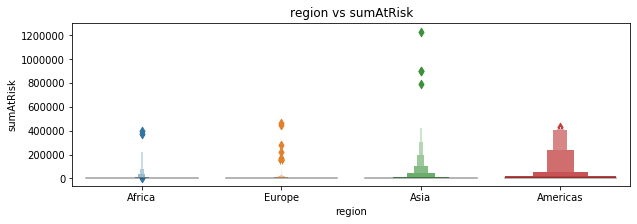

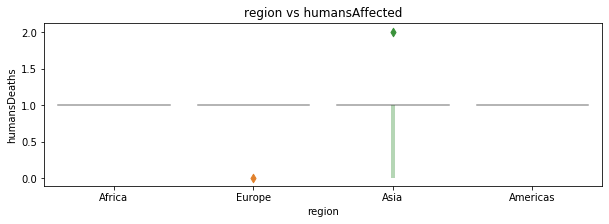

In [23]:
plt.figure(figsize=(10,3))
box = boxenplot = sns.boxenplot(x=outbreaks['region'], y=outbreaks['sumCases'])
plt.title('region vs sumCases')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
boxenplot = sns.boxenplot(x=outbreaks['region'], y=outbreaks['sumAtRisk'])
plt.title('region vs sumAtRisk')
# boxenplot.set_ylim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['region'], y=outbreaks['sumDeaths'])
plt.title('region vs sumDeaths')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['region'], y=outbreaks['humansAffected'])
plt.title('region vs humansAffected')
# box.set_ylim(0, 10)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['region'], y=outbreaks['humansDeaths'])
plt.title('region vs humansAffected')
# box.set_ylim(0, 10)
plt.show()

## Human Deaths

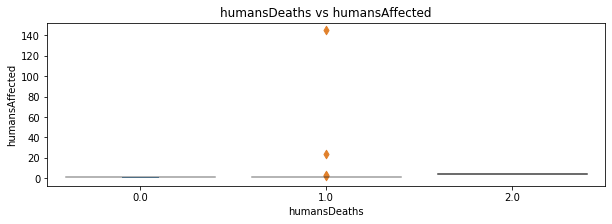

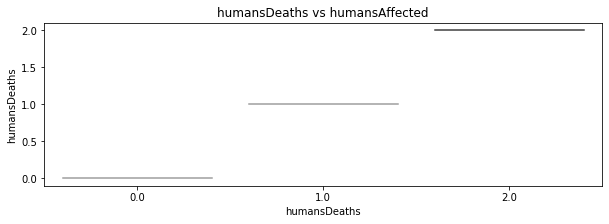

In [24]:
plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['humansDeaths'], y=outbreaks['sumCases'])
plt.title('humansDeaths vs sumCases')
box.set_ylim(0, 15000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['humansDeaths'], y=outbreaks['sumAtRisk'])
plt.title('humansDeaths vs sumAtRisk')
box.set_ylim(0, 60000)
plt.show()

plt.figure(figsize=(10,3))
bpx = sns.boxenplot(x=outbreaks['humansDeaths'], y=outbreaks['sumDeaths'])
plt.title('humansDeaths vs sumDeaths')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['humansDeaths'], y=outbreaks['humansAffected'])
plt.title('humansDeaths vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['humansDeaths'], y=outbreaks['humansDeaths'])
plt.title('humansDeaths vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

In [25]:
# combining features to avoid multicolinearity

outbreaks.corr().round(4)

outbreaks['mex_h7n3'] = outbreaks['Mexico'] * outbreaks['H7N3 HPAI']
outbreaks['saudiarabia_mers'] = outbreaks['Saudi Arabia'] * outbreaks['MERS-CoV ']
outbreaks['IA_birds'] = outbreaks['Influenza - Avian'] * outbreaks['birds']
outbreaks['bra_glanders'] = outbreaks['Brazil'] * outbreaks['Glanders']
outbreaks['chile_h7n6'] = outbreaks['Chile'] * outbreaks['H7N6 LPAI']
outbreaks['china_h7n9'] = outbreaks['China'] * outbreaks['H7N9 LPAI']
outbreaks['IE_h3n 8'] = outbreaks['Influenza - Equine'] * outbreaks['H3N8']

# Mexico : H7N3 HPAI
#Saudi Arabia : MERS-CoV

# Influenza - Avian : birds

# Brazil : Glanders

# Chile : H7N6 LPAI

# China : H7N9 LPAI

# Influenza - Equine : H3N8

In [59]:
features_to_test = outbreaks[['sumAtRisk', 'sumCases', 'sumDeaths', 'sumDestroyed', 'sumSlaughtered', 'humansAge',
                             'humansAffected', 'humansDeaths', 'differenceInDays']]
for feat in features_to_test:
    jb_stats = stats.jarque_bera(outbreaks[feat])
    norm_stats = stats.normaltest(outbreaks[feat])
    
    print("Testing for normality on {}:".format(feat))
    print('Jarque-Bera test statistics for', feat, 'is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
    print('Normality test statistics for', feat, 'is {0} and p value is {1}\n'.format(norm_stats[0], norm_stats[1]))


Testing for normality on sumAtRisk:
Jarque-Bera test statistics for sumAtRisk is 162221542.82716304 and p value is 0.0
Normality test statistics for sumAtRisk is 45136.73563816606 and p value is 0.0

Testing for normality on sumCases:
Jarque-Bera test statistics for sumCases is 17213749607.118153 and p value is 0.0
Normality test statistics for sumCases is 73164.63184142127 and p value is 0.0

Testing for normality on sumDeaths:
Jarque-Bera test statistics for sumDeaths is 102365819774.37195 and p value is 0.0
Normality test statistics for sumDeaths is 85117.90827481964 and p value is 0.0

Testing for normality on sumDestroyed:
Jarque-Bera test statistics for sumDestroyed is 433103400.7387094 and p value is 0.0
Normality test statistics for sumDestroyed is 50350.9975549946 and p value is 0.0

Testing for normality on sumSlaughtered:
Jarque-Bera test statistics for sumSlaughtered is 12365653790.384748 and p value is 0.0
Normality test statistics for sumSlaughtered is 71954.77364323729 a

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



 Outlier Visualization for sumAtRisk feature. 







'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really wa



No boxcox transformation for sumAtRisk because not all data is positive.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



 Outlier Visualization for sumCases feature. 







'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.




No boxcox transformation for sumCases because not all data is positive.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



 Outlier Visualization for sumDeaths feature. 







'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.




No boxcox transformation for sumDeaths because not all data is positive.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



 Outlier Visualization for sumDestroyed feature. 







'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.




No boxcox transformation for sumDestroyed because not all data is positive.

 Outlier Visualization for sumSlaughtered feature. 



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches







No boxcox transformation for sumSlaughtered because not all data is positive.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.



 Outlier Visualization for humansAge feature. 







'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.




No boxcox transformation for humansAge because not all data is positive.

 Outlier Visualization for humansAffected feature. 



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


No boxcox transformation for humansAffected because not all data is positive.

 Outlier Visualization for humansDeaths feature. 



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


No boxcox transformation for humansDeaths because not all data is positive.

 Outlier Visualization for differenceInDays feature. 



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

<Figure size 432x288 with 0 Axes>

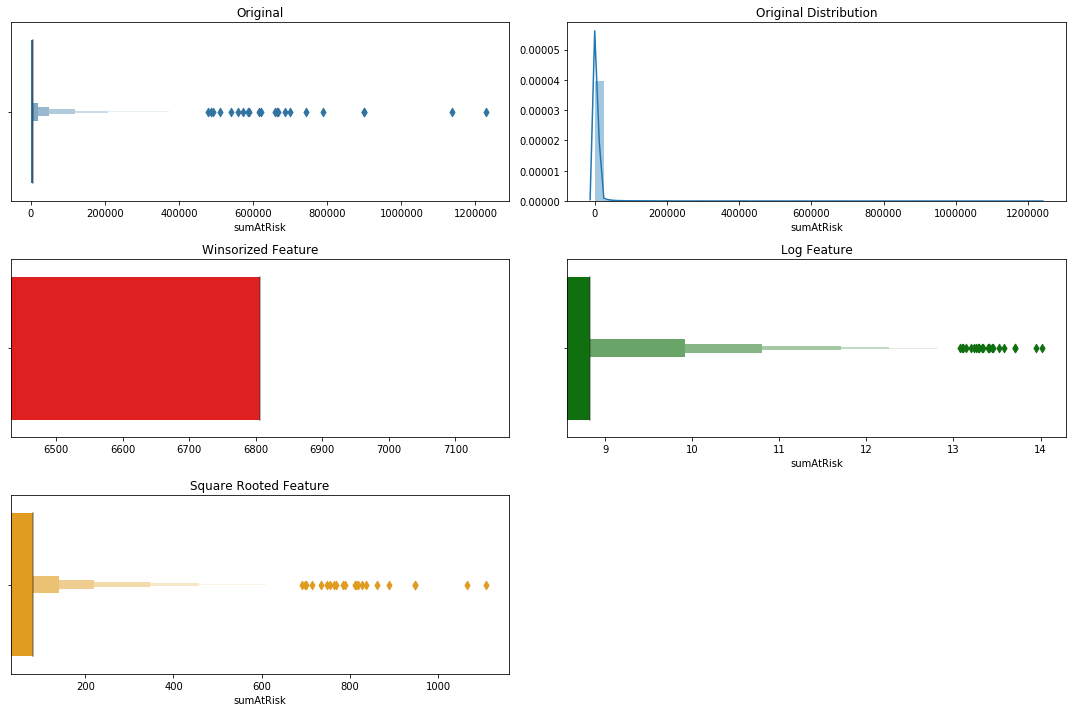

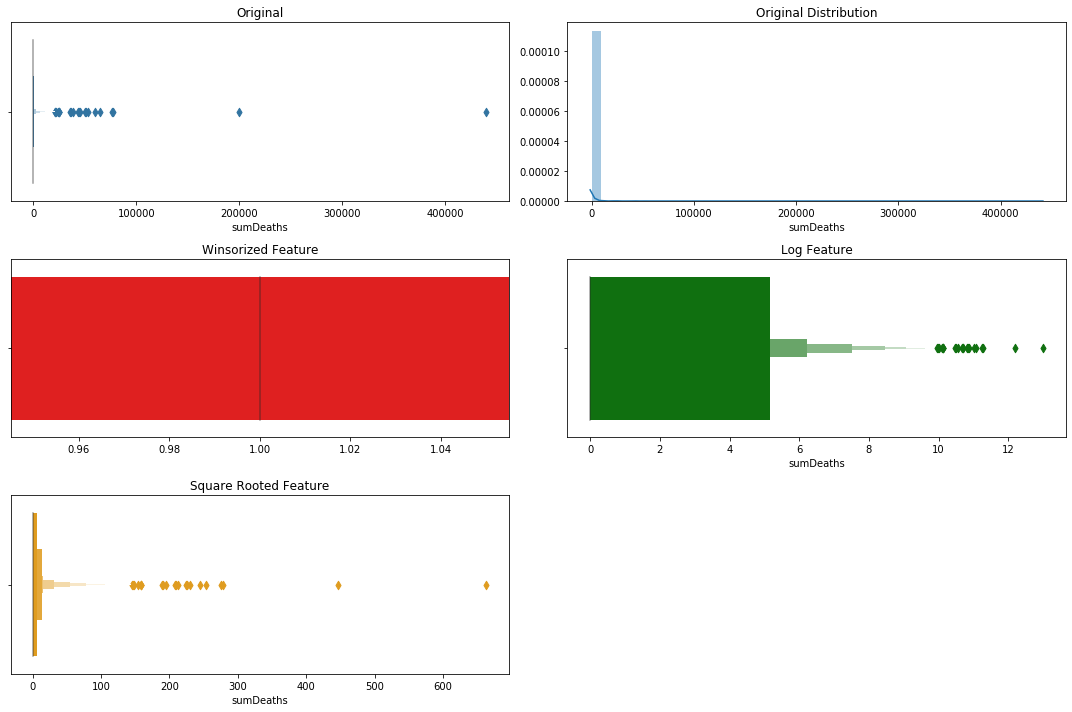

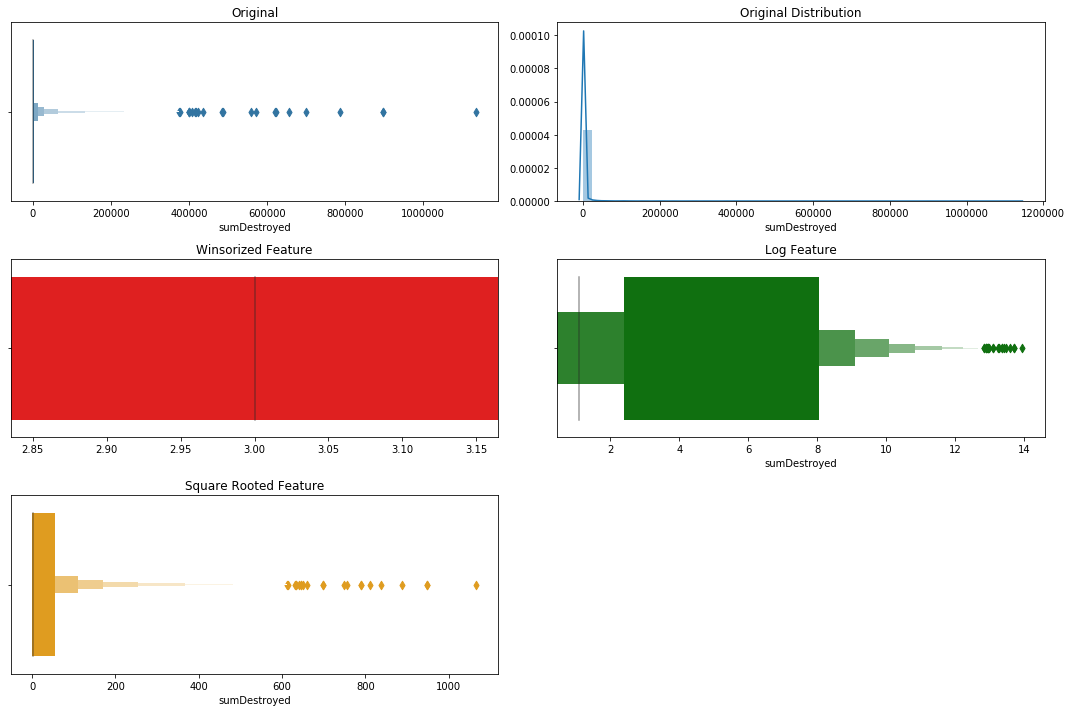

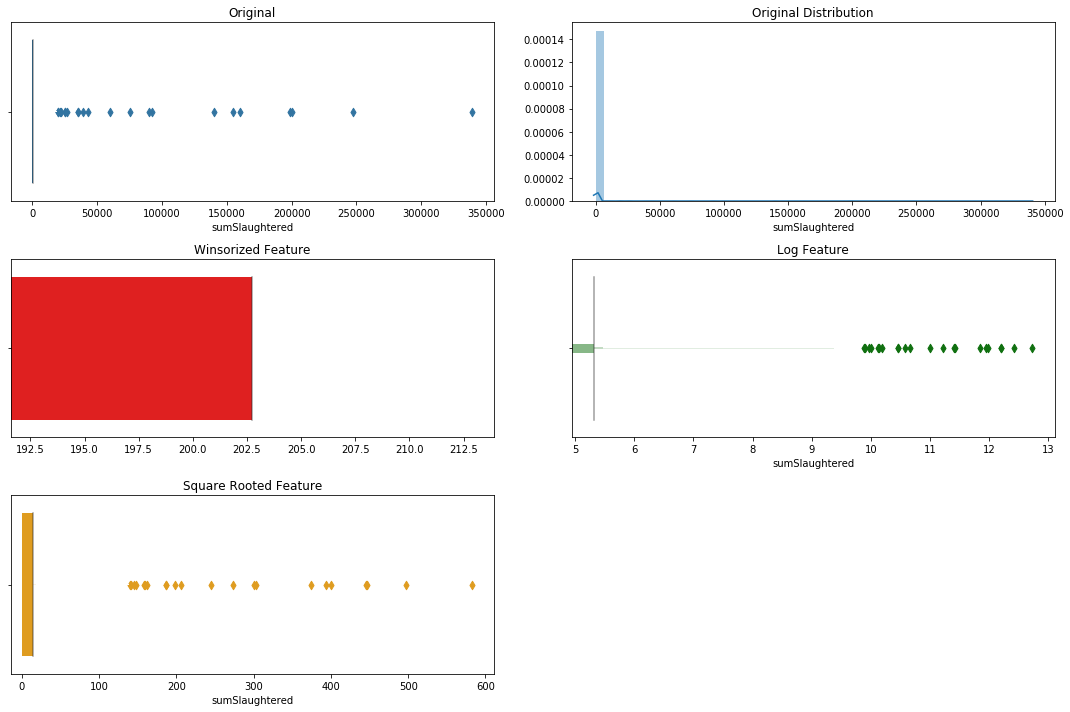

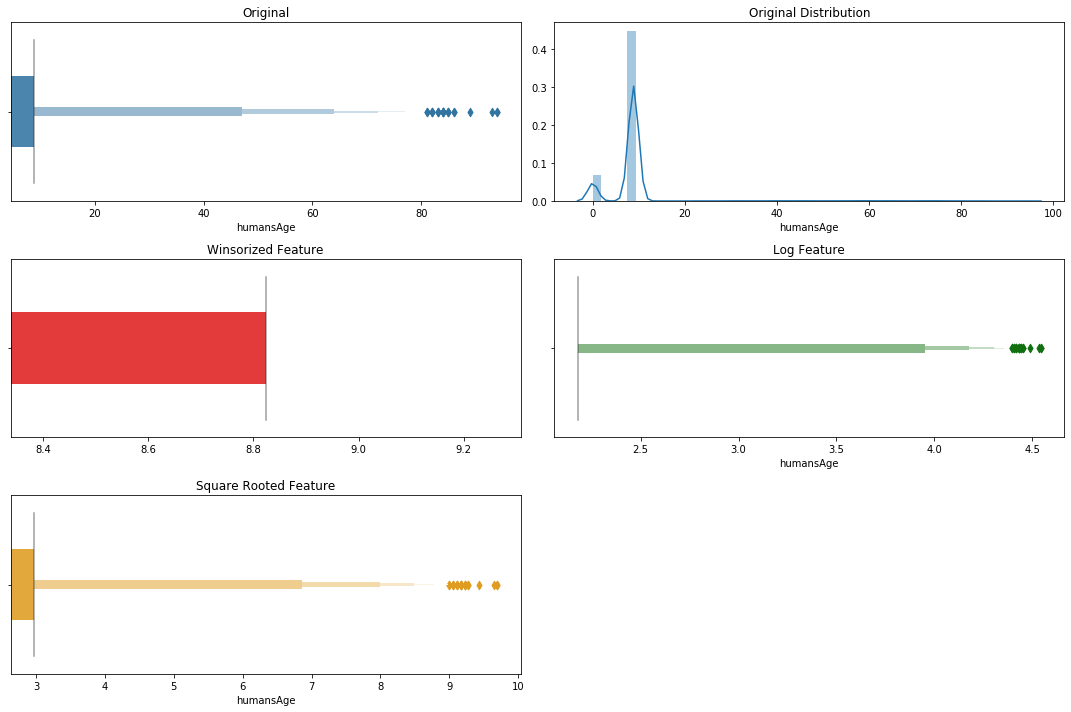

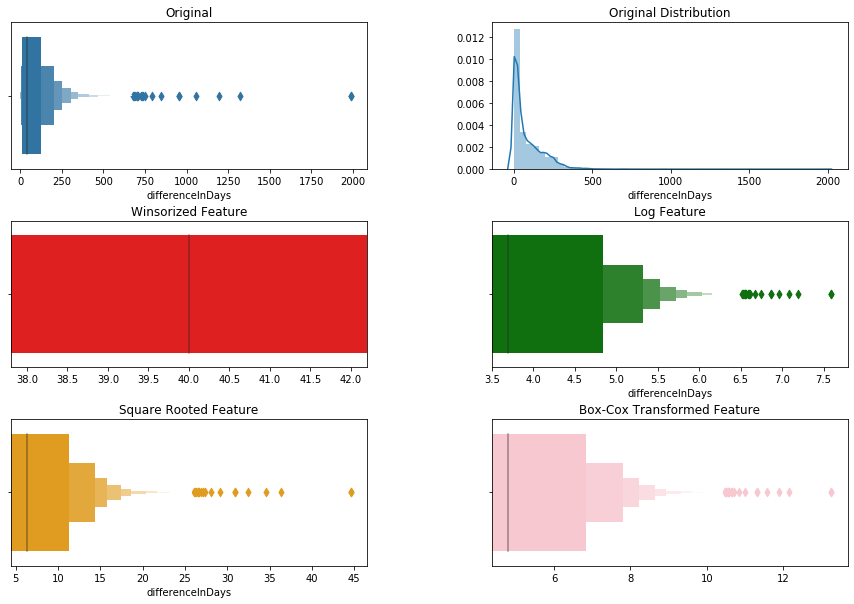

In [60]:
# Specify a list with features we want to test for normality. 
# Visuals for outliers and normality

for feat in features_to_test:
    winsorized_feature = winsorize(outbreaks[feat], (0, 0.10))
    sqrt_feature = np.sqrt(outbreaks[feat])
    
    plt.tight_layout()
    print('\n Outlier Visualization for', feat, 'feature. \n')
    plt.figure(figsize = (15,10))
    plt.subplot(3, 2, 1)
    sns.boxenplot(x=feat, data=outbreaks)
    plt.title('Original')
    print('\n')
    plt.subplot(3, 2, 2)
    sns.distplot(outbreaks[feat])
    plt.title('Original Distribution')
    print('\n')
    plt.subplot(3, 2, 3)
    winsorized_feature = winsorize(outbreaks[feat], (0, 0.10))
    sns.boxenplot(winsorized_feature, color='red')
    plt.title('Winsorized Feature')
    try:
        log_feature = np.log(outbreaks[feat])
        plt.subplot(3, 2, 4)
        log_feature = np.log(outbreaks[feat])
        sns.boxenplot(log_feature, color='green')
        plt.title('Log Feature')
    except ValueError: 
        print('No log transformation for', feat, 'because not all data is positive.')
    print('\n')
    plt.subplot(3, 2, 5)
    sqrt_feature = np.sqrt(outbreaks[feat])
    sns.boxenplot(sqrt_feature, color='orange')
    plt.title('Square Rooted Feature')
    try:
        bc_feature,_ = stats.boxcox(outbreaks[feat])
        plt.subplot(3, 2, 6)
        sns.boxenplot(bc_feature, color='pink')
        plt.title('Box-Cox Transformed Feature')
        plt.subplots_adjust(hspace=0.35, wspace=0.35)
        plt.show()
    except ValueError: 
        print('No boxcox transformation for', feat, 'because not all data is positive.')

## Normalizing Numeric Features


In [22]:
outbreaks['norm_differenceInDays'] = normalize(np.array(np.log(outbreaks['differenceInDays'])).reshape(1,-1)).reshape(-1,1)
outbreaks['norm_sumAtRisk'] = normalize(np.array(np.sqrt(outbreaks['sumAtRisk'])).reshape(-1, 1))
outbreaks['norm_sumCases'] = normalize(np.array(np.sqrt(outbreaks['sumCases'])).reshape(1,-1).reshape(-1,1))
outbreaks['norm_sumDeaths'] = normalize(np.array(np.sqrt(outbreaks['sumDeaths'])).reshape(1,-1).reshape(-1,1))
outbreaks['norm_sumDestroyed'] = normalize(np.array(np.log(outbreaks['sumDestroyed'] + 1)).reshape(1,-1)).reshape(-1,1)
outbreaks['norm_sumSlaughtered'] = normalize(np.array(np.log(outbreaks['sumSlaughtered'] + 1)).reshape(1,-1)).reshape(-1,1)
outbreaks['norm_humansAge'] = normalize(np.array(np.sqrt(outbreaks['humansAge'])).reshape(1,-1)).reshape(-1,1)
outbreaks['norm_humansAffected'] = normalize(np.array(np.sqrt(outbreaks['humansAffected'])).reshape(1,-1)).reshape(-1,1)
outbreaks['norm_humansDeaths'] = normalize(np.array(np.sqrt(outbreaks['humansDeaths'])).reshape(1,-1)).reshape(-1,1)

norm_features_to_test = ['norm_differenceInDays', 'norm_sumAtRisk', 'norm_sumCases', 'norm_sumDestroyed', 
                         'norm_sumSlaughtered', 'norm_humansAge', 'norm_humansAffected', 'norm_humansDeaths']

# Now run each and one of the featues in above list. Locate the features in your data and calculate the statistics. 
for feat in norm_features_to_test:
    jb_stats = stats.jarque_bera(outbreaks[feat])
    norm_stats = stats.normaltest(outbreaks[feat])
    
    print("Testing for normality on {}:".format(feat))
    print('Jarque-Bera test statistics for', feat, 'is {0} and p value is {1}'.format(jb_stats[0], jb_stats[1]))
    print('Normality test statistics for', feat, 'is {0} and p value is {1}\n'.format(norm_stats[0], norm_stats[1]))

Testing for normality on norm_differenceInDays:
Jarque-Bera test statistics for norm_differenceInDays is 1103.0389524044347 and p value is 0.0
Normality test statistics for norm_differenceInDays is 2269.8952571084415 and p value is 0.0

Testing for normality on norm_sumAtRisk:
Jarque-Bera test statistics for norm_sumAtRisk is 9119944.870151982 and p value is 0.0
Normality test statistics for norm_sumAtRisk is 33488.140149014886 and p value is 0.0

Testing for normality on norm_sumCases:
Jarque-Bera test statistics for norm_sumCases is 601009.6274799339 and p value is 0.0
Normality test statistics for norm_sumCases is 21217.594968003577 and p value is 0.0

Testing for normality on norm_sumDestroyed:
Jarque-Bera test statistics for norm_sumDestroyed is 2880.836729061548 and p value is 0.0
Normality test statistics for norm_sumDestroyed is 106610.27932020994 and p value is 0.0

Testing for normality on norm_sumSlaughtered:
Jarque-Bera test statistics for norm_sumSlaughtered is 3291.200427

In [23]:
corr_mat = outbreaks.corr().loc[:, ['norm_humansDeaths']].abs().sort_values(by='norm_humansDeaths', ascending=False)
corr_mat[:55]

norm_humansDeaths
norm_humansDeaths                    1.000000
humansDeaths                         0.993156
norm_humansAffected                  0.220165
H5N5 LPAI                            0.203291
H6N2 LPAI                            0.203291
H5N8 HPAI, H5N2 HPAI                 0.203291
H7N1 LPAI                            0.143597
Portugal                             0.117123
Kyrgyzstan                           0.117123
A                                    0.116428
Gambia                               0.101324
Bhutan                               0.090531
MERS-CoV                             0.059692
Saudi Arabia                         0.057376
Senegal                              0.053587
humansAge                            0.046817
Nepal                                0.041405
National authorities                 0.037768
Europe                               0.037355
Asia                                 0.036192
H5 LPAI                              0.034762
Uganda                               0.034193
OIE                                  0.032790
mammals                              0.032674
United States of America             0.030011
African swine fever                  0.025951
Centroid Admin1                      0.023340
norm_sumDestroyed                    0.022450
latitude                             0.021479
norm_sumSlaughtered                  0.020687
wild                                 0.020474
Rift Valley fever                    0.020236
humansAffected                       0.020104
Anthrax                              0.018547
Foot and mouth disease               0.017645
Taiwan (Province of China)           0.017161
Exact                                0.016125
Poland                               0.013290
Bluetongue                           0.012913
H5N8 HPAI                            0.010968
Newcastle disease                    0.010800
FAO Field Officer                    0.010440
Influenza - Avian                    0.010182
8                                    0.009864
longitude                            0.009822
Romania                              0.009820
China                                0.009600
Lumpy skin disease                   0.008888
Unknown                              0.008828
Malaysia                             0.008670
Rabies                               0.008668
H5N6 HPAI                            0.008247
UknownSerotypes                      0.008062
Americas                             0.007883
H5N2 HPAI                            0.007858

In [63]:
corr_mat = outbreaks.corr().loc[:, ['norm_sumCases']].abs().sort_values(by='norm_sumCases', ascending=False)
corr_mat[:70]

norm_sumCases
norm_sumCases                    1.000000
norm_sumAtRisk                   0.517328
H5N8 HPAI                        0.318052
birds                            0.317544
Influenza - Avian                0.298231
mammals                          0.285861
norm_sumDeaths                   0.284464
norm_sumSlaughtered              0.201407
Hungary                          0.199365
France                           0.196680
UknownSerotypes                  0.189642
African swine fever              0.151511
H5N1 LPAI                        0.142836
Republic of Korea                0.138703
unspecified                      0.138436
wild                             0.132137
reportYear                       0.120485
observationYear                  0.118734
Id                               0.118433
domestic                         0.108483
Taiwan (Province of China)       0.083243
Poland                           0.078111
Newcastle disease                0.077235
Bluetongue                       0.074455
H5N9 LPAI                        0.071839
H5N2 LPAI                        0.067225
H5N3 LPAI                        0.067166
Israel                           0.066002
H5N6 HPAI                        0.062795
Romania                          0.057721
Africa                           0.056230
8                                0.056195
H5N2 HPAI                        0.055571
Asia                             0.053975
Lumpy skin disease               0.050292
H5 LPAI                          0.044701
OIE                              0.044509
Foot and mouth disease           0.043928
4                                0.042937
Centroid Admin2                  0.037662
Latvia                           0.037137
Russian Federation               0.037015
National authorities             0.036806
H5N3 LPAI, H5N2 LPAI             0.035447
norm_sumDestroyed                0.034250
Saudi Arabia                     0.034227
sumAtRisk                        0.033675
O                                0.033155
MERS-CoV                         0.033048
Albania                          0.032478
Serbia                           0.031500
Centroid Admin1                  0.030050
Bulgaria                         0.028453
observationDay                   0.028372
Unknown                          0.026996
Belgium                          0.026463
United States of America         0.025692
Rabies                           0.025107
Ukraine                          0.024694
Lithuania                        0.024694
observationMonth                 0.024650
Malaysia                         0.024555
Italy                            0.024450
H5N1 HPAI                        0.023838
Egypt                            0.023232
Algeria                          0.022066
longitude                        0.021929
Germany                          0.021873
reportMonth                      0.020227
South Africa                     0.020219

# Visualizations with Dimensionality Reduction

## PCA with All Features Exluding Duplicates

In [24]:
# PCA with all variables, including norm_humansDeaths
X_all = outbreaks.drop(columns=['disease', 'serotypes', 'speciesDescription', 'sumAtRisk', 'sumCases', 'sumDeaths', 
                            'sumDestroyed','sumSlaughtered', 'humansAge', 'humansAffected', 'humansDeaths', 
                            'differenceInDays', 'source','region', 'country', 'localityQuality', 'status', 
                            'observationDate', 'reportingDate'])


pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
print(pca.explained_variance_ratio_)

pca_80 = PCA(n_components=0.80)
pca_components_80 = pca_80.fit_transform(X_all)
print(pca_80.explained_variance_ratio_)


[9.99989220e-01 8.55895553e-06]
[0.99998922]


Cluster Graph with PCA 


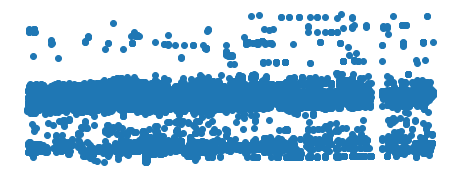

In [65]:
print('Cluster Graph with PCA ')
plt.figure(figsize=(8,3))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

First two PCA components:  [0.74697175 0.08469629]
PCA components for 80% of variance:  [0.74697175 0.08469629]
Cluster Graph with PCA 


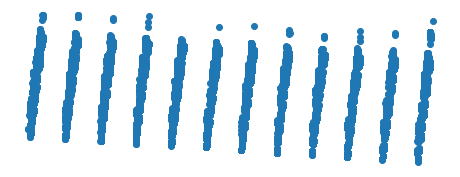

In [25]:
# PCA for fifty features with greatest absolute correlation with norm_humanDeaths

X_50hd = outbreaks[['MERS-CoV ', 'Saudi Arabia', 'H5N8 HPAI', 'H5N2 HPAI',  'Portugal',
                      'WHO', 'Centroid Admin1', 'Asia',  'OIE', 'Other', 'National authorities',
                      'Europe', 'domestic', 'mammals', 'Jordan', 'Exact', 'Centroid Locality', 
                      'observationYear', 'Bluetongue', 'birds', 'H7N9 LPAI',
                      'African swine fever', 'France', 'China', 'H5N8 HPAI', 'wild', '8',  
                      'observationMonth', 'Lumpy skin disease', 'Taiwan (Province of China)', 'Malaysia', 'Rabies',
                      'Africa', 'unspecified', '4', 'FAO Field Officer',  'H5N1 HPAI', 'Albania',
                      'Latvia', 'Serbia', 'Estonia', 'Russian Federation', 'Republic of Korea',
                     'norm_sumAtRisk', 'norm_sumCases', 'norm_sumDeaths', 
                      'norm_sumDestroyed','norm_sumSlaughtered', 'norm_humansAge',
                   'norm_humansAffected', 'norm_differenceInDays', 'norm_humansDeaths']]


pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)
print('First two PCA components: ', pca.explained_variance_ratio_)

pca_80 = PCA(n_components=0.80)
pca_components_80 = pca_80.fit_transform(X_50hd)
print('PCA components for 80% of variance: ', pca_80.explained_variance_ratio_)


print('Cluster Graph with PCA ')
plt.figure(figsize=(8,3))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [26]:
# PCA for features with greater than 0.01 absolute correlation with potential target

X_01sc = outbreaks[['norm_sumCases', 'norm_sumAtRisk', 'H5N8 HPAI', 'IA_birds', 'mammals',
                    'norm_sumDeaths', 'Hungary', 'France', 'UknownSerotypes', 'norm_sumSlaughtered',
                    'unspecified', 'H5N1 LPAI', 'wild', 'African swine fever', 'Newcastle disease',
                    'Israel', 'domestic', 'Bluetongue', 'H5N2 HPAI', 'H5N9 HPAI', 'Republic of Korea', 
                    'H5N3 LPAI', 'OIE', 'H7N8 LPAI', '8', 'National authorities', 
                    'Lumpy skin disease', 'Taiwan (Province of China)', 'H5N9 LPAI', 'Africa',
                    '4', 'United States of America', 'Exact', 'Centroid Admin2', 'Latvia',
                    'Albania', 'Serbia', 'Estonia', 'Centroid Admin1', 'Russian Federation',
                    'Saudi Arabia', 'MERS-CoV ', 'Poland', 'H5N1 HPAI', 'H5N6 HPAI',
                    'Lithuania', 'Bulgaria', 'Romania', 'Egypt', 'H5N2 LPAI', 'Italy', 
                    'Foot and mouth disease']]


pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_01sc)
print('First two PCA components: ', pca.explained_variance_ratio_)

pca_80 = PCA(n_components=0.80)
pca_components_80 = pca_80.fit_transform(X_01sc)
print('PCA components for 80% of variance: ', pca_80.explained_variance_ratio_)


print('Cluster Graph with PCA ')
plt.figure(figsize=(8,3))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

KeyError: "['IA_birds', 'H7N8 LPAI'] not in index"

## TSNE

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 14020 samples in 0.338s...
[t-SNE] Computed neighbors for 14020 samples in 1.282s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14020
[t-SNE] Computed conditional probabilities for sample 2000 / 14020
[t-SNE] Computed conditional probabilities for sample 3000 / 14020
[t-SNE] Computed conditional probabilities for sample 4000 / 14020
[t-SNE] Computed conditional probabilities for sample 5000 / 14020
[t-SNE] Computed conditional probabilities for sample 6000 / 14020
[t-SNE] Computed conditional probabilities for sample 7000 / 14020
[t-SNE] Computed conditional probabilities for sample 8000 / 14020
[t-SNE] Computed conditional probabilities for sample 9000 / 14020
[t-SNE] Computed conditional probabilities for sample 10000 / 14020
[t-SNE] Computed conditional probabilities for sample 11000 / 14020
[t-SNE] Computed conditional probabilities for sample 12000 / 14020
[t-SNE] Computed conditional probabilities for sam

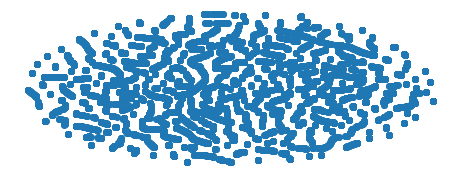

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 14020 samples in 0.349s...
[t-SNE] Computed neighbors for 14020 samples in 1.945s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14020
[t-SNE] Computed conditional probabilities for sample 2000 / 14020
[t-SNE] Computed conditional probabilities for sample 3000 / 14020
[t-SNE] Computed conditional probabilities for sample 4000 / 14020
[t-SNE] Computed conditional probabilities for sample 5000 / 14020
[t-SNE] Computed conditional probabilities for sample 6000 / 14020
[t-SNE] Computed conditional probabilities for sample 7000 / 14020
[t-SNE] Computed conditional probabilities for sample 8000 / 14020
[t-SNE] Computed conditional probabilities for sample 9000 / 14020
[t-SNE] Computed conditional probabilities for sample 10000 / 14020
[t-SNE] Computed conditional probabilities for sample 11000 / 14020
[t-SNE] Computed conditional probabilities for sample 12000 / 14020
[t-SNE] Computed conditional probabilities for sam

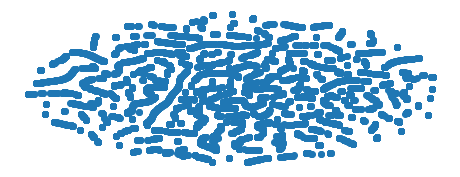

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14020 samples in 0.427s...
[t-SNE] Computed neighbors for 14020 samples in 1.918s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14020
[t-SNE] Computed conditional probabilities for sample 2000 / 14020
[t-SNE] Computed conditional probabilities for sample 3000 / 14020
[t-SNE] Computed conditional probabilities for sample 4000 / 14020
[t-SNE] Computed conditional probabilities for sample 5000 / 14020
[t-SNE] Computed conditional probabilities for sample 6000 / 14020
[t-SNE] Computed conditional probabilities for sample 7000 / 14020
[t-SNE] Computed conditional probabilities for sample 8000 / 14020
[t-SNE] Computed conditional probabilities for sample 9000 / 14020
[t-SNE] Computed conditional probabilities for sample 10000 / 14020
[t-SNE] Computed conditional probabilities for sample 11000 / 14020
[t-SNE] Computed conditional probabilities for sample 12000 / 14020
[t-SNE] Computed conditional probabilities for sam

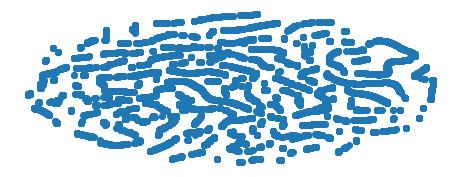

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14020 samples in 0.259s...
[t-SNE] Computed neighbors for 14020 samples in 2.183s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14020
[t-SNE] Computed conditional probabilities for sample 2000 / 14020
[t-SNE] Computed conditional probabilities for sample 3000 / 14020
[t-SNE] Computed conditional probabilities for sample 4000 / 14020
[t-SNE] Computed conditional probabilities for sample 5000 / 14020
[t-SNE] Computed conditional probabilities for sample 6000 / 14020
[t-SNE] Computed conditional probabilities for sample 7000 / 14020
[t-SNE] Computed conditional probabilities for sample 8000 / 14020
[t-SNE] Computed conditional probabilities for sample 9000 / 14020
[t-SNE] Computed conditional probabilities for sample 10000 / 14020
[t-SNE] Computed conditional probabilities for sample 11000 / 14020
[t-SNE] Computed conditional probabilities for sample 12000 / 14020
[t-SNE] Computed conditional probabilities for sa

In [43]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(X_all)
    print('Cluster Graph with t-SNE with Perplexity ', perplexity)
    plt.figure(figsize=(8,3))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 14020 samples in 0.170s...
[t-SNE] Computed neighbors for 14020 samples in 3.170s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14020
[t-SNE] Computed conditional probabilities for sample 2000 / 14020
[t-SNE] Computed conditional probabilities for sample 3000 / 14020
[t-SNE] Computed conditional probabilities for sample 4000 / 14020
[t-SNE] Computed conditional probabilities for sample 5000 / 14020
[t-SNE] Computed conditional probabilities for sample 6000 / 14020
[t-SNE] Computed conditional probabilities for sample 7000 / 14020
[t-SNE] Computed conditional probabilities for sample 8000 / 14020
[t-SNE] Computed conditional probabilities for sample 9000 / 14020
[t-SNE] Computed conditional probabilities for sample 10000 / 14020
[t-SNE] Computed conditional probabilities for sample 11000 / 14020
[t-SNE] Computed conditional probabilities for sample 12000 / 14020
[t-SNE] Computed conditional probabilities for sam

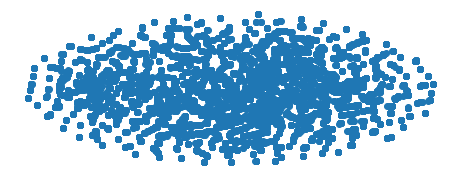

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 14020 samples in 0.169s...
[t-SNE] Computed neighbors for 14020 samples in 4.009s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14020
[t-SNE] Computed conditional probabilities for sample 2000 / 14020
[t-SNE] Computed conditional probabilities for sample 3000 / 14020
[t-SNE] Computed conditional probabilities for sample 4000 / 14020
[t-SNE] Computed conditional probabilities for sample 5000 / 14020
[t-SNE] Computed conditional probabilities for sample 6000 / 14020
[t-SNE] Computed conditional probabilities for sample 7000 / 14020
[t-SNE] Computed conditional probabilities for sample 8000 / 14020
[t-SNE] Computed conditional probabilities for sample 9000 / 14020
[t-SNE] Computed conditional probabilities for sample 10000 / 14020
[t-SNE] Computed conditional probabilities for sample 11000 / 14020
[t-SNE] Computed conditional probabilities for sample 12000 / 14020
[t-SNE] Computed conditional probabilities for sam

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14020 samples in 0.148s...
[t-SNE] Computed neighbors for 14020 samples in 4.142s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14020
[t-SNE] Computed conditional probabilities for sample 2000 / 14020
[t-SNE] Computed conditional probabilities for sample 3000 / 14020
[t-SNE] Computed conditional probabilities for sample 4000 / 14020
[t-SNE] Computed conditional probabilities for sample 5000 / 14020
[t-SNE] Computed conditional probabilities for sample 6000 / 14020
[t-SNE] Computed conditional probabilities for sample 7000 / 14020
[t-SNE] Computed conditional probabilities for sample 8000 / 14020
[t-SNE] Computed conditional probabilities for sample 9000 / 14020
[t-SNE] Computed conditional probabilities for sample 10000 / 14020
[t-SNE] Computed conditional probabilities for sample 11000 / 14020
[t-SNE] Computed conditional probabilities for sample 12000 / 14020
[t-SNE] Computed conditional probabilities for sam

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 14020 samples in 0.181s...
[t-SNE] Computed neighbors for 14020 samples in 5.347s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14020
[t-SNE] Computed conditional probabilities for sample 2000 / 14020
[t-SNE] Computed conditional probabilities for sample 3000 / 14020
[t-SNE] Computed conditional probabilities for sample 4000 / 14020
[t-SNE] Computed conditional probabilities for sample 5000 / 14020
[t-SNE] Computed conditional probabilities for sample 6000 / 14020
[t-SNE] Computed conditional probabilities for sample 7000 / 14020
[t-SNE] Computed conditional probabilities for sample 8000 / 14020
[t-SNE] Computed conditional probabilities for sample 9000 / 14020
[t-SNE] Computed conditional probabilities for sample 10000 / 14020
[t-SNE] Computed conditional probabilities for sample 11000 / 14020
[t-SNE] Computed conditional probabilities for sample 12000 / 14020
[t-SNE] Computed conditional probabilities for sa

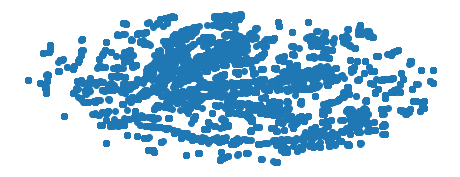

In [44]:
for perplexity in [10, 20, 30, 40]:
    tsne = TSNE(n_components=2, verbose=1, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(X_50hd)
    print('Cluster Graph with t-SNE with Perplexity ', perplexity)
    plt.figure(figsize=(8,3))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()

## UMAP with All Features

In [34]:
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.75,
                      metric='correlation').fit_transform(X_all)
print('UMAP for X_all with 250 neighbors and 0.75 minimum distance.')
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
print('\n')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.p

KeyboardInterrupt: 

UMAP with all features. 



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with 50 neighbors and  0.1 minimum distance.


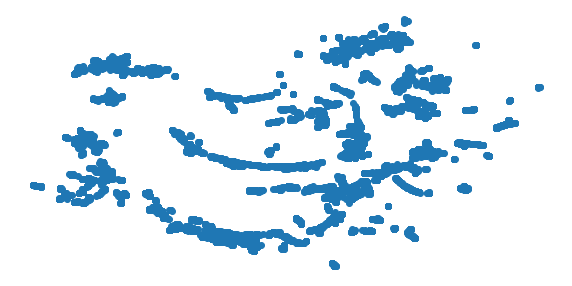

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with 100 neighbors and  0.1 minimum distance.


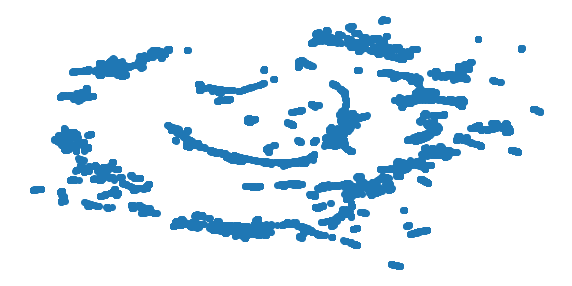

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with 250 neighbors and  0.1 minimum distance.


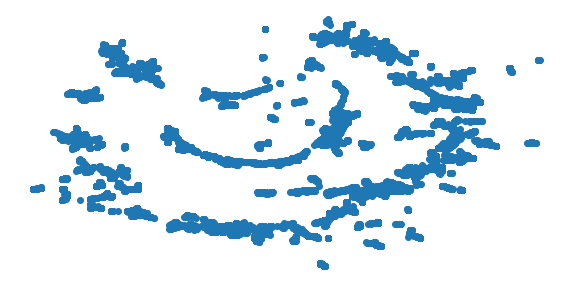

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with 50 neighbors and  0.5 minimum distance.


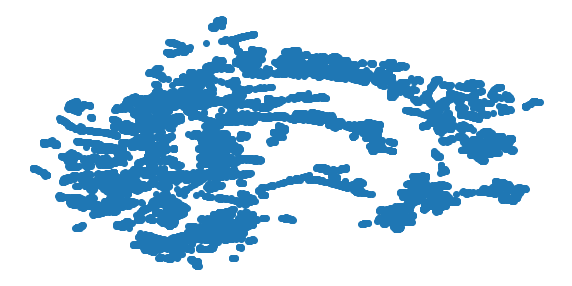

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with 100 neighbors and  0.5 minimum distance.


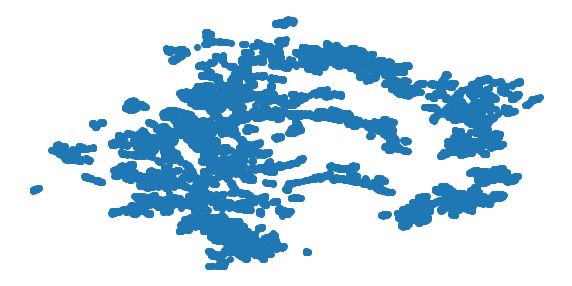

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with 250 neighbors and  0.5 minimum distance.


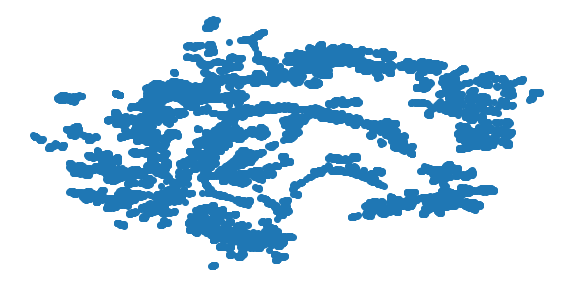

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with 50 neighbors and  0.75 minimum distance.


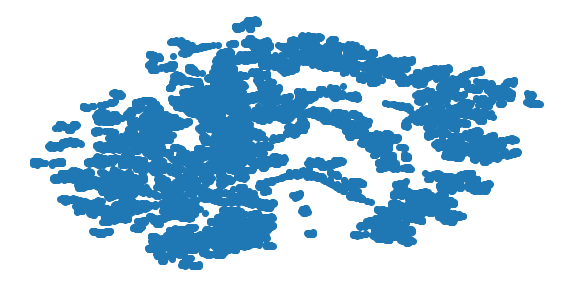

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with 100 neighbors and  0.75 minimum distance.


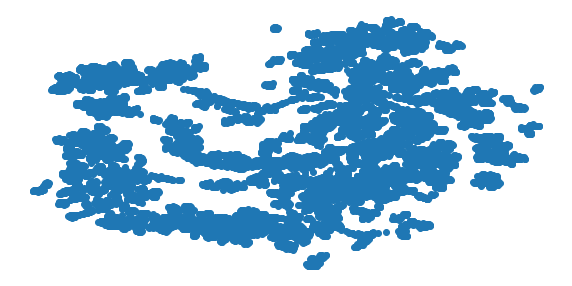

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


UMAP for X_all with 250 neighbors and  0.75 minimum distance.


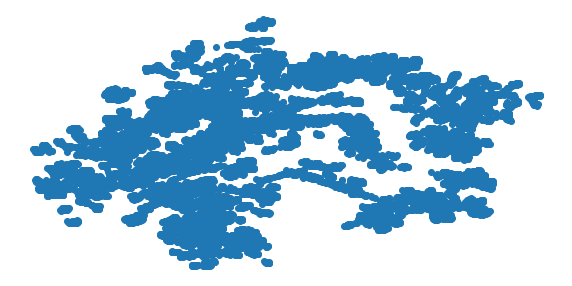

In [70]:
# UMAP with all features
print('UMAP with all features. \n')
for min_dist in [0.1, 0.5, 0.75]:
    for neighbors in [50, 100, 250]:
        umap_results = umap.UMAP(n_neighbors=250,
                        min_dist=min_dist,
                      metric='correlation').fit_transform(X_all)
        print('UMAP for X_all with', neighbors, 'neighbors and ', min_dist, 'minimum distance.')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')

## UMAP with Features Highly Correlated with humansDeaths

UMAP with features highly correlated with norm_humansDeaths. 



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 18 separate connected components using meta-embedding (experimental)
  n_components


UMAP for X_01hd with  100 neighbors and  0.01 minimum distance.


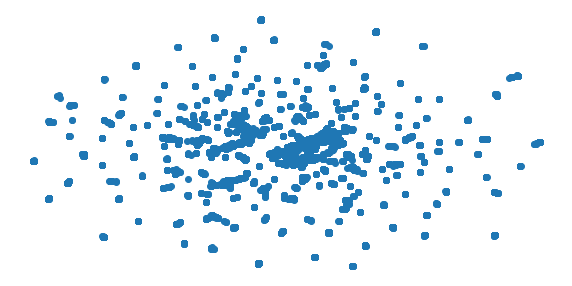

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 19 separate connected components using meta-embedding (experimental)
  n_components


UMAP for X_01hd with  100 neighbors and  0.5 minimum distance.


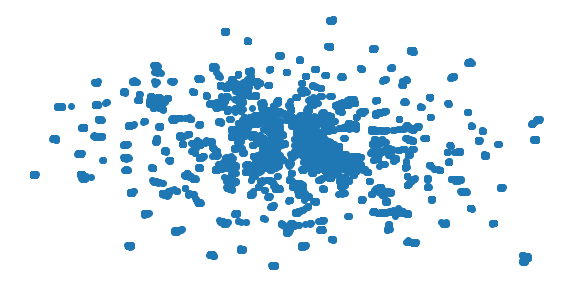

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 18 separate connected components using meta-embedding (experimental)
  n_components


UMAP for X_01hd with  100 neighbors and  1 minimum distance.


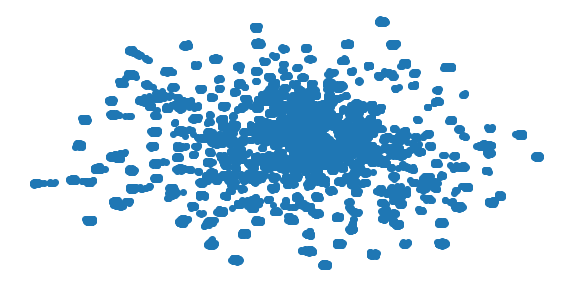

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components


UMAP for X_01hd with  250 neighbors and  0.01 minimum distance.


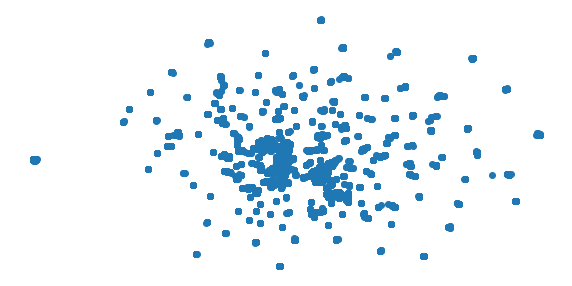

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


UMAP for X_01hd with  250 neighbors and  0.5 minimum distance.


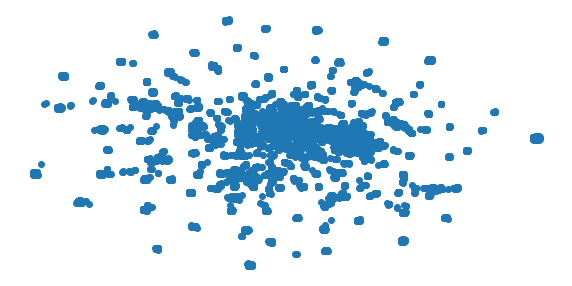

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 6 separate connected components using meta-embedding (experimental)
  n_components


UMAP for X_01hd with  250 neighbors and  1 minimum distance.


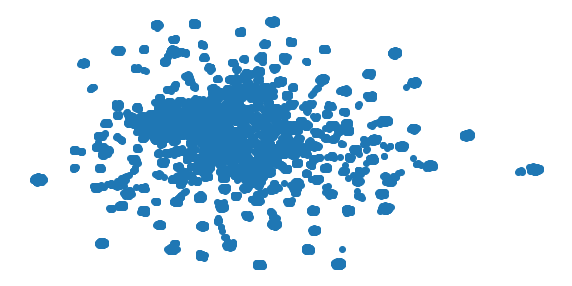

In [106]:
print('UMAP with features highly correlated with norm_humansDeaths. \n')
for n_neighbors in [100, 250]:
    for min_dist in [ 0.01, 0.5, 1]:
        umap_results = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='correlation').fit_transform(X_50hd)
        print('UMAP for X_01hd with ', n_neighbors, 'neighbors and ', min_dist, 'minimum distance.')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')
        


## LLE 

LLE with  10 neighbors and two components.


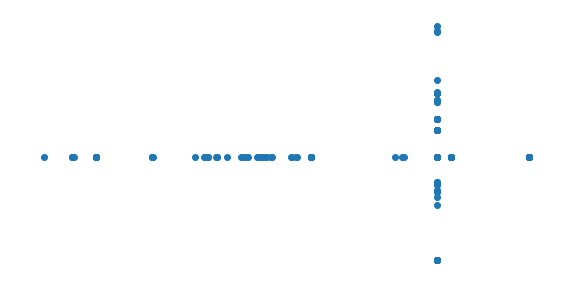

In [ ]:
# LLE with all features
for n_neighbors in [10, 25, 50]:
    lle_results = LocallyLinearEmbedding(n_components=2, 
                    n_neighbors=n_neighbors,
                    eigen_solver='dense').fit_transform(X_all)
    print('LLE with ', n_neighbors, 'neighbors and two components.')
    plt.figure(figsize=(10,5))
    plt.scatter(lle_results[:, 0], lle_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    print('\n')
    


LLE with  10 neighbors and two components.


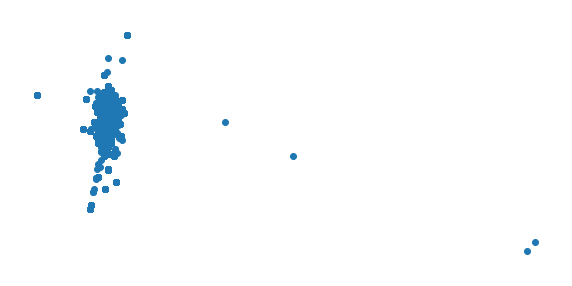



LLE with  25 neighbors and two components.


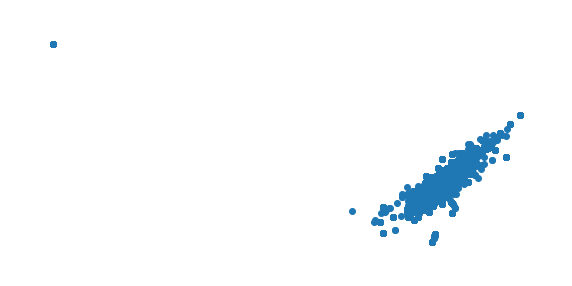



LLE with  50 neighbors and two components.


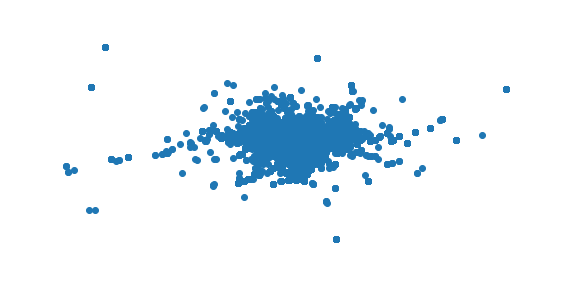

In [71]:
# LLE with all features highly correlated with humansDeaths
for n_neighbors in [10, 25, 50]:
    lle_results = LocallyLinearEmbedding(n_components=2, 
                    n_neighbors=n_neighbors,
                    eigen_solver='dense').fit_transform(X_50hd)
    print('LLE with ', n_neighbors, 'neighbors and two components.')
    plt.figure(figsize=(10,5))
    plt.scatter(lle_results[:, 0], lle_results[:, 1])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    print('\n')

For your third capstone, you’ll complete an unsupervised learning project. You can choose your own research question or choose from one below.

Go out and find a dataset of interest. It could be one that helps you work on one of our recommended research questions, or any other dataset that addresses an unsupervised learning question of your own.

Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

Things to keep in mind: how do clustering and modeling compare? What are the advantages of each? Why would you want to use one over the other?

Be prepared to talk about:

- Your end-user and the value your project provides to them.
- Quantifiable results based on the research you’ve conducted.
- The visuals you chose and what they represent for your research.
- Next steps you'd take to expand on your work.
- A specified research question your model addresses.
- How you chose your model specification and what alternatives you compared it to.
- The practical uses of your model for an audience of interest.
- Any weak points or shortcomings of your model.


# Clustering

- K-Means
- Agglomerative
- DBSCAN
- GMM
- OPTICS

## K-Means with PCA Components for all features

112 ms ± 6.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
181 ms ± 514 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
226 ms ± 1.71 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
227 ms ± 1.65 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
284 ms ± 3.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
310 ms ± 940 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
405 ms ± 2.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
443 ms ± 4.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
371 ms ± 7.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
418 ms ± 4.66 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
386 ms ± 1.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


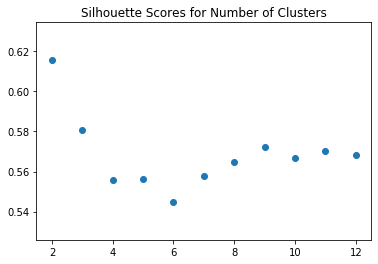

Best Silhouette score is 0.6157334248802298 with 2 clusters. 
Best Davies Bouldin score:  0.47293233448685984
135 ms ± 21.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


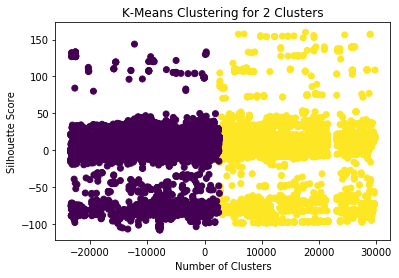

In [73]:
# K-means with PCA with all variables, including humansDeaths
X_all = outbreaks.drop(columns=['disease', 'serotypes', 'speciesDescription', 'sumAtRisk', 'sumCases', 'sumDeaths', 
                            'sumDestroyed','sumSlaughtered', 'humansAge', 'humansAffected', 'humansDeaths', 
                            'differenceInDays', 'source', 'region', 'country', 'localityQuality', 'status', 
                            'observationDate', 'reportingDate'])


pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
silhouettes_kpca = []
silhouettes_kpca_dict = {} # silhoutte scores are keys, clusters are values
dbs_kpca = []

# looping through cluster numbers to find the best cluster
for cluster in clusters:
    
    labels = KMeans(n_clusters=cluster, random_state=123).fit_predict(pca_components)
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
    %timeit kmeans_cluster.fit(pca_components)
    y_pred = kmeans_cluster.predict(pca_components)
    silhouette = metrics.silhouette_score(pca_components, labels, metric='euclidean', sample_size=5000)
    silhouettes_kpca.append(silhouette)
    silhouettes_kpca_dict[silhouette] = cluster
    db = metrics.davies_bouldin_score(pca_components, labels)
    dbs_kpca.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_kpca_dict.values()), list(silhouettes_kpca_dict.keys()))
plt.show()


print('Best Silhouette score is {} with {} clusters. '.format(max(silhouettes_kpca_dict.keys()), silhouettes_kpca_dict[max(silhouettes_kpca_dict.keys())]))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
print('Best Davies Bouldin score: ', min(dbs_kpca))

# plotting the clusters with the best silhouette score
best_cluster = silhouettes_kpca_dict[max(silhouettes_kpca_dict.keys())]
labels = KMeans(n_clusters=best_cluster, random_state=123).fit_predict(pca_components)
kmeans_cluster = KMeans(n_clusters=best_cluster, random_state=123)
%timeit kmeans_cluster.fit(pca_components)
y_pred = kmeans_cluster.predict(pca_components)

plt.title('K-Means Clustering for {} Clusters'.format(silhouettes_kpca_dict[max(silhouettes_kpca_dict.keys())]))
plt.scatter(pca_components[:,0], pca_components[:,1], c=y_pred)
plt.show()

In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)

k_means_clusters = KMeans(n_clusters=2, random_state=123).fit_predict(pca_components)

unique, counts = np.unique(k_means_clusters, return_counts=True)
print(dict(zip(unique, counts)))
outbreaks['k_means_clusters_all_pca'] = k_means_clusters
outbreaks.head()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['k_means_clusters_all_pca'], y=outbreaks['sumCases'])
plt.title('k_means_clusters_all_pca vs sumCases')
box.set_ylim(0, 15000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['k_means_clusters_all_pca'], y=outbreaks['sumAtRisk'])
plt.title('k_means_clusters_all_pca vs sumAtRisk')
box.set_ylim(0, 60000)
plt.show()

plt.figure(figsize=(10,3))
bpx = sns.boxenplot(x=outbreaks['k_means_clusters_all_pca'], y=outbreaks['sumDeaths'])
plt.title('k_means_clusters_all_pca vs sumDeaths')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['k_means_clusters_all_pca'], y=outbreaks['humansAffected'])
plt.title('k_means_clusters vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['k_means_clusters_all_pca'], y=outbreaks['humansDeaths'])
plt.title('k_means_clusters_all_pca vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

## K-Means using PCA for features with high correlations with humansDeaths

There appears to be no difference between clusters in terms of float values.

93.2 ms ± 508 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
120 ms ± 513 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
193 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
222 ms ± 3.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
265 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
265 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
353 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
346 ms ± 684 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
339 ms ± 4.47 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
384 ms ± 3.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
408 ms ± 895 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


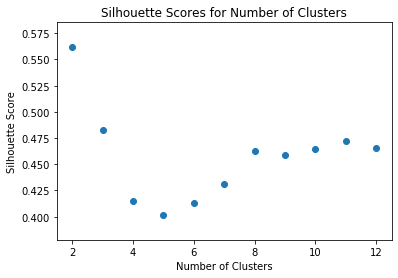

Best Silhouette score is 0.5621866202187425 with 2 clusters. 
Best Davies Bouldin score:  0.6299406234490834
93.4 ms ± 394 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


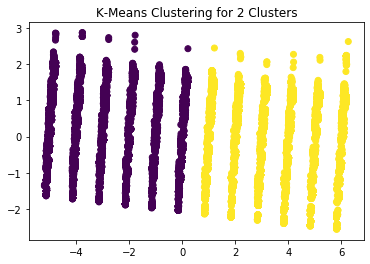

In [75]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
silhouettes_kpca = []
silhouettes_kpca_dict = {} # silhoutte scores are keys, clusters are values
dbs_kpca = []

# looping through cluster numbers to find the best cluster
for cluster in clusters:
    
    labels = KMeans(n_clusters=cluster, random_state=123).fit_predict(pca_components)
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
    %timeit kmeans_cluster.fit(pca_components)
    y_pred = kmeans_cluster.predict(pca_components)
    silhouette = metrics.silhouette_score(pca_components, labels, metric='euclidean', sample_size=5000)
    silhouettes_kpca.append(silhouette)
    silhouettes_kpca_dict[silhouette] = cluster
    db = metrics.davies_bouldin_score(pca_components, labels)
    dbs_kpca.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_kpca_dict.values()), list(silhouettes_kpca_dict.keys()))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


print('Best Silhouette score is {} with {} clusters. '.format(max(silhouettes_kpca_dict.keys()), silhouettes_kpca_dict[max(silhouettes_kpca_dict.keys())]))
print('Best Davies Bouldin score: ', min(dbs_kpca))

# plotting the clusters with the best silhouette score
best_cluster = silhouettes_kpca_dict[max(silhouettes_kpca_dict.keys())]
labels = KMeans(n_clusters=best_cluster, random_state=123).fit_predict(pca_components)
kmeans_cluster = KMeans(n_clusters=best_cluster, random_state=123)
%timeit kmeans_cluster.fit(pca_components)
y_pred = kmeans_cluster.predict(pca_components)

plt.title('K-Means Clustering for {} Clusters'.format(silhouettes_kpca_dict[max(silhouettes_kpca_dict.keys())]))
plt.scatter(pca_components[:,0], pca_components[:,1], c=y_pred)
plt.show()

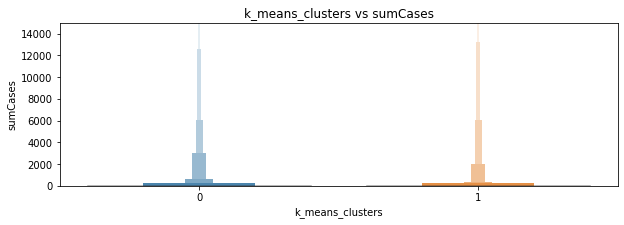

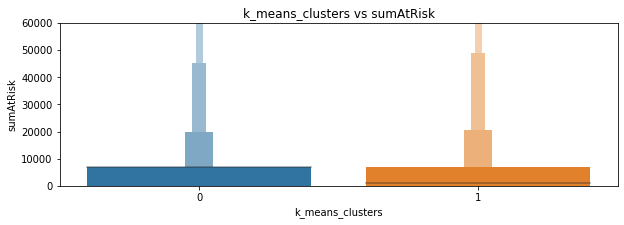

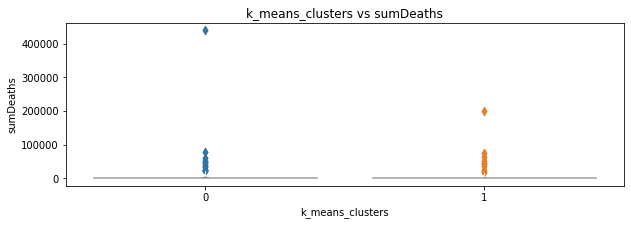

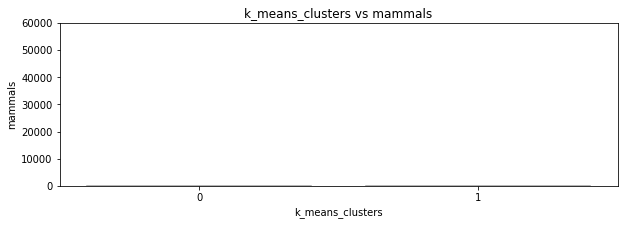

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

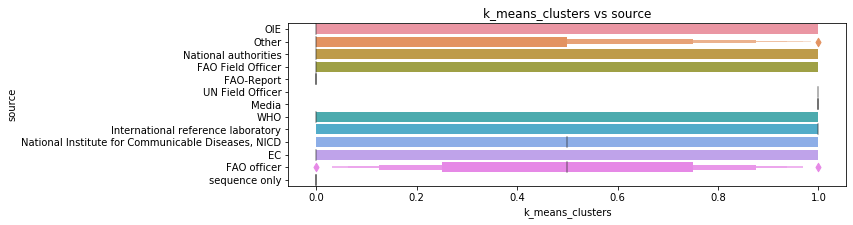

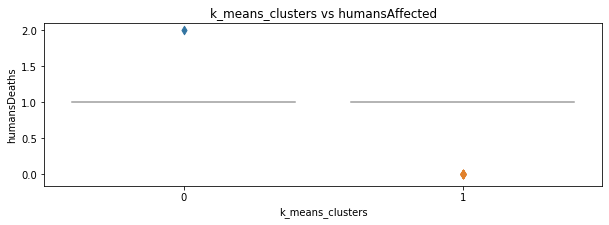

In [29]:
# plotting the clusters with significant variables
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)

k_means_clusters = KMeans(n_clusters=2, random_state=123).fit_predict(pca_components)

unique, counts = np.unique(k_means_clusters, return_counts=True)
print(dict(zip(unique, counts)))
outbreaks['k_means_clusters_50hd_pca'] = k_means_clusters
outbreaks.head()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['k_means_clusters_50hd_pca'], y=outbreaks['sumCases'])
plt.title('k_means_clusters vs sumCases')
box.set_ylim(0, 15000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['k_means_clusters_50hd_pca'], y=outbreaks['sumAtRisk'])
plt.title('k_means_clusters vs sumAtRisk')
box.set_ylim(0, 60000)
plt.show()

plt.figure(figsize=(10,3))
bpx = sns.boxenplot(x=outbreaks['k_means_clusters_50hd_pca'], y=outbreaks['sumDeaths'])
plt.title('k_means_clusters vs sumDeaths')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['k_means_clusters_50hd_pca'], y=outbreaks['humansAffected'])
plt.title('k_means_clusters vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['k_means_clusters_50hd_pca'], y=outbreaks['humansDeaths'])
plt.title('k_means_clusters vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()


## K-Means using UMAP for all features

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


220 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
214 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
244 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
585 ms ± 5.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
545 ms ± 2.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
399 ms ± 4.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
534 ms ± 77.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
626 ms ± 3.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
710 ms ± 59.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
753 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
747 ms ± 4.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


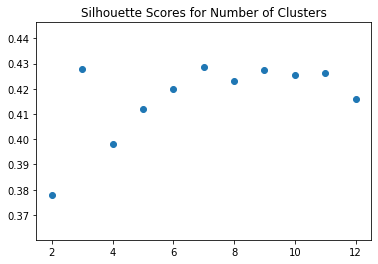

Best Silhouette score is 0.42862266302108765 with 7 clusters. 
Best Davies Bouldin score:  0.7288545735473911
396 ms ± 3.35 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


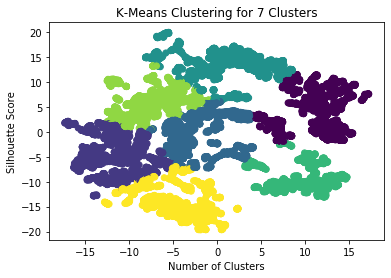

In [76]:
# K-means with UMAP with all variables, including humansDeaths
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_all)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
silhouettes_kumap = []
silhouettes_kumap_dict = {} # silhoutte scores are keys, clusters are values
dbs_kumap = []

# looping through cluster numbers to find the best cluster
for cluster in clusters:
    labels = KMeans(n_clusters=cluster, random_state=123).fit_predict(umap_results)
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
    %timeit kmeans_cluster.fit(umap_results)
    y_pred = kmeans_cluster.predict(umap_results)
    silhouette = metrics.silhouette_score(umap_results, labels, metric='euclidean', sample_size=5000)
    silhouettes_kumap.append(silhouette)
    silhouettes_kumap_dict[silhouette] = cluster
    db = metrics.davies_bouldin_score(umap_results, labels)
    dbs_kumap.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_kumap_dict.values()), list(silhouettes_kumap_dict.keys()))
plt.show()


print('Best Silhouette score is {} with {} clusters. '.format(max(silhouettes_kumap_dict.keys()), silhouettes_kumap_dict[max(silhouettes_kumap_dict.keys())]))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
print('Best Davies Bouldin score: ', min(dbs_kumap))

# plotting the clusters with the best silhouette score
best_cluster = silhouettes_kumap_dict[max(silhouettes_kumap_dict.keys())]
labels = KMeans(n_clusters=best_cluster, random_state=123).fit_predict(umap_results)
kmeans_cluster = KMeans(n_clusters=best_cluster, random_state=123)
%timeit kmeans_cluster.fit(umap_results)
y_pred = kmeans_cluster.predict(umap_results)

plt.title('K-Means Clustering for {} Clusters'.format(silhouettes_kumap_dict[max(silhouettes_kumap_dict.keys())]))
plt.scatter(umap_results[:,0], umap_results[:,1], c=y_pred)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.p

{0: 10975, 1: 10943}


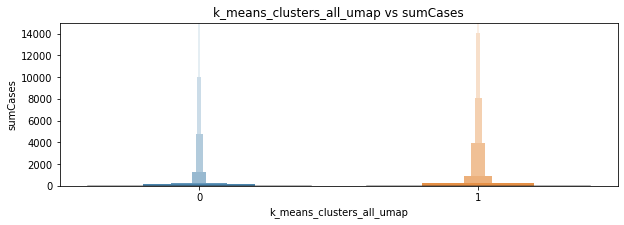

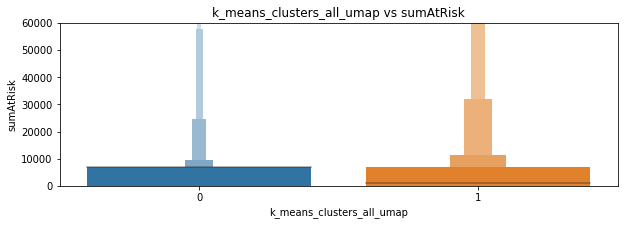

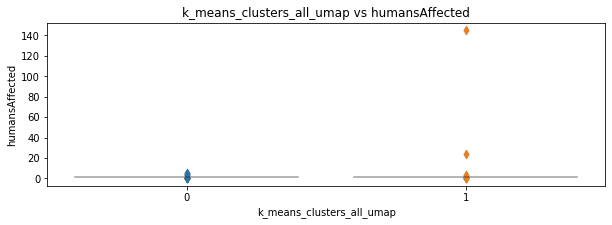

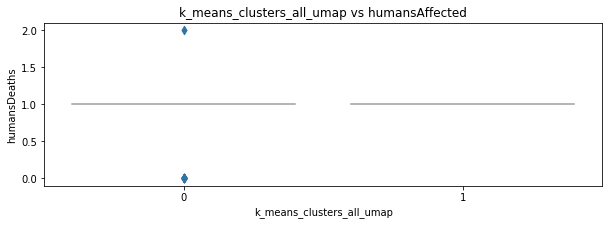

In [31]:
# plotting the clusters with significant variables

umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_all)

k_means_clusters = KMeans(n_clusters=7, random_state=123).fit_predict(umap_results)

unique, counts = np.unique(k_means_clusters, return_counts=True)
print(dict(zip(unique, counts)))
outbreaks['k_means_clusters_all_umap'] = k_means_clusters
outbreaks.head()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['k_means_clusters_all_umap'], y=outbreaks['sumCases'])
plt.title('k_means_clusters_all_umap vs sumCases')
box.set_ylim(0, 15000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['k_means_clusters_all_umap'], y=outbreaks['sumAtRisk'])
plt.title('k_means_clusters_all_umap vs sumAtRisk')
box.set_ylim(0, 60000)
plt.show()

plt.figure(figsize=(10,3))
bpx = sns.boxenplot(x=outbreaks['k_means_clusters_all_umap'], y=outbreaks['sumDeaths'])
plt.title('k_means_clusters_all_umap vs sumDeaths')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['k_means_clusters_all_umap'], y=outbreaks['humansAffected'])
plt.title('k_means_clusters_all_umap vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['k_means_clusters_all_umap'], y=outbreaks['humansDeaths'])
plt.title('k_means_clusters_all_umap vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

## K-Means using UMAP for features with high correlations with humansDeaths

With the highest silhouette score at 0.37, not graphing clusters.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 15 separate connected components using meta-embedding (experimental)
  n_components


202 ms ± 3.74 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
242 ms ± 7.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
285 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
312 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
508 ms ± 6.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
516 ms ± 2.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
509 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
548 ms ± 2.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
636 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
699 ms ± 15.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
726 ms ± 27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


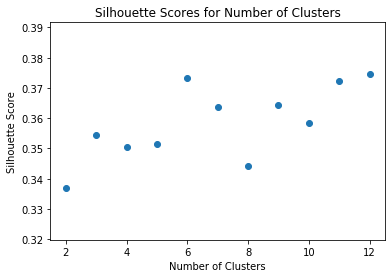

Best Silhouette score is 0.3746205270290375 with 12 clusters. 
Best Davies Bouldin score:  0.7740372416695438
701 ms ± 1.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


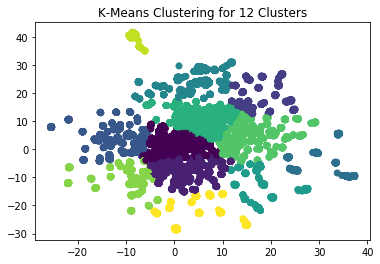

In [81]:
# K-means with UMAP with humansDeaths features
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_50hd)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
silhouettes_kumap = []
silhouettes_kumap_dict = {} # silhoutte scores are keys, clusters are values
dbs_kumap = []

# looping through cluster numbers to find the best cluster
for cluster in clusters:
    labels = KMeans(n_clusters=cluster, random_state=123).fit_predict(umap_results)
    kmeans_cluster = KMeans(n_clusters=cluster, random_state=123)
    %timeit kmeans_cluster.fit(umap_results)
    y_pred = kmeans_cluster.predict(umap_results)
    silhouette = metrics.silhouette_score(umap_results, labels, metric='euclidean', sample_size=5000)
    silhouettes_kumap.append(silhouette)
    silhouettes_kumap_dict[silhouette] = cluster
    db = metrics.davies_bouldin_score(umap_results, labels)
    dbs_kumap.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_kumap_dict.values()), list(silhouettes_kumap_dict.keys()))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


print('Best Silhouette score is {} with {} clusters. '.format(max(silhouettes_kumap_dict.keys()), silhouettes_kumap_dict[max(silhouettes_kumap_dict.keys())]))
print('Best Davies Bouldin score: ', min(dbs_kumap))

# plotting the clusters with the best silhouette score
best_cluster = silhouettes_kumap_dict[max(silhouettes_kumap_dict.keys())]
labels = KMeans(n_clusters=best_cluster, random_state=123).fit_predict(umap_results)
kmeans_cluster = KMeans(n_clusters=best_cluster, random_state=123)
%timeit kmeans_cluster.fit(umap_results)
y_pred = kmeans_cluster.predict(umap_results)

plt.title('K-Means Clustering for {} Clusters'.format(silhouettes_kumap_dict[max(silhouettes_kumap_dict.keys())]))
plt.scatter(umap_results[:,0], umap_results[:,1], c=y_pred)
plt.show()

## K-Means with Locally Linear Embedding for all features

In [82]:
# Get a list of keys from dictionary which has the given value

def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys

54.9 ms ± 352 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
77 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
82.9 ms ± 517 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
103 ms ± 486 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
111 ms ± 473 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
129 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
148 ms ± 8.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
160 ms ± 780 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
192 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
277 ms ± 34.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
216 ms ± 15.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


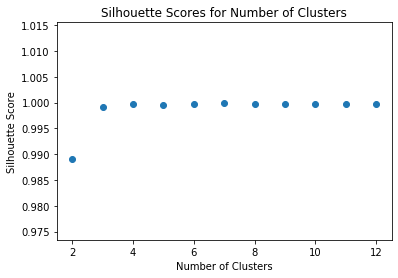

Best Silhouette score is 0.9996427635668103 with 12 clusters. 
Best Davies Bouldin score:  0.014194956148022768


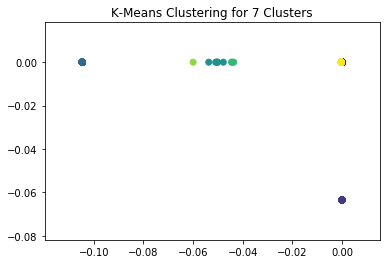

In [83]:
## K-means with LLE for all features

lle_results = LocallyLinearEmbedding(n_components=2, 
                    n_neighbors=25,
                    eigen_solver='dense').fit_transform(X_all)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
silhouettes_klle = []
silhouettes_klle_dict = {}
dbs_klle = []

for cluster in clusters: 
    k_means = KMeans(n_clusters=cluster, random_state=123)
    labels = KMeans(n_clusters= cluster, random_state=123).fit_predict(lle_results)
    %timeit k_means.fit(lle_results)
    y_pred = k_means.predict(lle_results)
    silhouette = metrics.silhouette_score(lle_results, labels, metric='euclidean')
    silhouettes_klle.append(silhouette)
    silhouettes_klle_dict[cluster] = silhouette
    db = metrics.davies_bouldin_score(lle_results, labels)
    dbs_klle.append(db)

    
# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_klle_dict.keys()), list(silhouettes_klle_dict.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

print('Best Silhouette score is {} with {} clusters. '.format(silhouettes_klle_dict[max(silhouettes_klle_dict.keys())], max(silhouettes_klle_dict.keys())))
print('Best Davies Bouldin score: ', min(dbs_klle))

# plotting the clusters with the best silhouette score
best_cluster = getKeysByValue(silhouettes_klle_dict, max(silhouettes_klle))
# best_cluster = silhouettes_klle_dict[max(silhouettes_klle_dict.values())]
labels = KMeans(n_clusters=max(best_cluster), random_state=123).fit_predict(lle_results)
kmeans_cluster = KMeans(n_clusters=max(best_cluster), random_state=123)
kmeans_cluster.fit(lle_results)
y_pred = kmeans_cluster.predict(lle_results)

plt.title('K-Means Clustering for {} Clusters'.format(max(best_cluster)))
plt.scatter(lle_results[:,0], lle_results[:,1], c=labels)
plt.show()


In [ ]:
clusters = [2, 4, 6, 8]
silhouettes_klle = []
lle_results = LocallyLinearEmbedding(n_components=2, 
                    n_neighbors=100,
                    eigen_solver='dense').fit_transform(X_50hd)
for cluster in clusters: 
    k_means = KMeans(n_clusters=cluster, random_state=123)
    labels = KMeans(n_clusters= cluster, random_state=123).fit_predict(lle_results)
    %timeit k_means.fit(lle_results)
    y_pred = k_means.predict(lle_results)
    silhouette = metrics.silhouette_score(lle_results, labels, metric='euclidean')
    print('The Silhoutte score with', cluster, 'clusters: {}'.format(silhouette))
    silhouettes_klle.append(silhouette)
    # Plot the solution.
    plt.scatter(lle_results[:,0], lle_results[:,1], c=y_pred)
    plt.show()
    print('\n')
    
print('The greatest silhouette score is {}.'.format(max(silhouettes_klle)))

In [97]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)

k_means_clusters = KMeans(n_clusters=2, random_state=123).fit_predict(pca_components)

unique, counts = np.unique(k_means_clusters, return_counts=True)
print(dict(zip(unique, counts)))
outbreaks['k_means_clusters'] = k_means_clusters
outbreaks.head()



{0: 12240, 1: 9678}


Id source  latitude  longitude    region             country  \
0  264093    OIE  18.24055 -70.282265  Americas  Dominican Republic   
3  264042    OIE  45.16140  25.392900    Europe             Romania   
4  264041    OIE  44.97410  25.464800    Europe             Romania   
5  264040    OIE  45.19450  26.975600    Europe             Romania   
6  264039    OIE  47.19080  22.512200    Europe             Romania   

  localityQuality observationDate reportingDate     status  \
0           Exact      2019-09-17    2019-12-19  Confirmed   
3           Exact      2019-12-20    2019-12-23  Confirmed   
4           Exact      2019-12-19    2019-12-23  Confirmed   
5           Exact      2019-12-12    2019-12-23  Confirmed   
6           Exact      2019-12-20    2019-12-23  Confirmed   

               disease        serotypes    speciesDescription     sumAtRisk  \
0    Newcastle disease  UknownSerotypes  [domestic,, chicken]  13191.000000   
3  African swine fever  UknownSerotypes   [wild,, wild, boar]   6806.056084   
4  African swine fever  UknownSerotypes   [wild,, wild, boar]     18.000000   
5  African swine fever  UknownSerotypes   [wild,, wild, boar]      7.000000   
6  African swine fever  UknownSerotypes   [wild,, wild, boar]   6806.056084   

   sumCases  sumDeaths  sumDestroyed  sumSlaughtered  humansAge  \
0   13191.0     6809.0   6382.000000      202.743361   8.823313   
3       2.0        0.0      2.000000      202.743361   8.823313   
4      18.0        1.0     17.000000      202.743361   8.823313   
5       7.0        1.0      6.000000      202.743361   8.823313   
6       1.0        1.0   3095.466068      202.743361   8.823313   

   humansAffected  humansDeaths  differenceInDays  observationYear  \
0             1.0           1.0              93.0             2019   
3             1.0           1.0               3.0             2019   
4             1.0           1.0               4.0             2019   
5             1.0           1.0              11.0             2019   
6             1.0           1.0               3.0             2019   

   observationMonth  observationDay  reportYear  reportMonth  reportDay  \
0                 9              17        2019           12         19   
3                12              20        2019           12         23   
4                12              19        2019           12         23   
5                12              12        2019           12         23   
6                12              20        2019           12         23   

   observationFirstHalfMonth  observationSecondHalfMonth  EC  FAO ECTAD RAF  \
0                          0                           1   0              0   
3                          0                           1   0              0   
4                          0                           1   0              0   
5                          1                           0   0              0   
6                          0                           1   0              0   

   FAO Field Officer  FAO officer  FAO-Report  \
0                  0            0           0   
3                  0            0           0   
4                  0            0           0   
5                  0            0           0   
6                  0            0           0   

   International reference laboratory  Media  \
0                                   0      0   
3                                   0      0   
4                                   0      0   
5                                   0      0   
6                                   0      0   

   National Institute for Communicable Diseases, NICD  National authorities  \
0                                                  0                      0   
3                                                  0                      0   
4                                                  0                      0   
5                                                  0                      0   
6  

## Agglomerative Clustering for all features with PCA Components

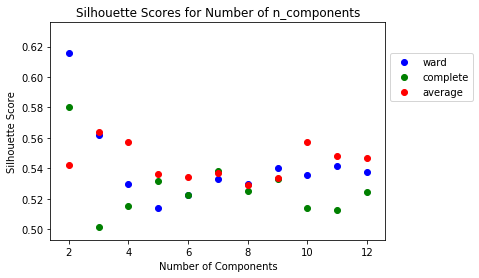

Best Silhouette score with ward linkage is 0.6155784130453247 with 2 clusters. 
Best Silhouette score with complete linkage is 0.5799465454009841 with 2 clusters. 
Best Silhouette score with average linkage is 0.5637384314980255 with 3 clusters. 
Best Davies Bouldin score:  0.43085706634414167


In [32]:
# With PCA components from all features
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


silhouettes_aggpca_complete = {} # silhoutte scores are keys, clusters are values
silhouettes_aggpca_average = {} # silhoutte scores are keys, clusters are values
dbs_aggpca = []
linkage_types = ['ward', 'complete', 'average']


# looping through cluster numbers to find the best cluster
silhouettes_aggpca_ward = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_aggpca_ward[silhouette] = cluster
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_aggpca.append(db)
        
silhouettes_aggpca_complete = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_aggpca_complete[silhouette] = cluster
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_aggpca.append(db)
        
silhouettes_aggpca_average = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_aggpca_average[silhouette] = cluster
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_aggpca.append(db)

# plotting the silhouette scores  
fig, ax = plt.subplots()
plt.scatter(list(silhouettes_aggpca_ward.values()), list(silhouettes_aggpca_ward.keys()), color='blue', label='ward')
plt.scatter(list(silhouettes_aggpca_complete.values()), list(silhouettes_aggpca_complete.keys()), color='green', label='complete')
plt.scatter(list(silhouettes_aggpca_average.values()), list(silhouettes_aggpca_average.keys()), color='red', label='average')
plt.title('Silhouette Scores for Number of n_components') 
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.show()
plt.show()


print('Best Silhouette score with ward linkage is {} with {} clusters. '.format(max(silhouettes_aggpca_ward.keys()), silhouettes_aggpca_ward[max(silhouettes_aggpca_ward.keys())]))
print('Best Silhouette score with complete linkage is {} with {} clusters. '.format(max(silhouettes_aggpca_complete.keys()), silhouettes_aggpca_complete[max(silhouettes_aggpca_complete.keys())]))
print('Best Silhouette score with average linkage is {} with {} clusters. '.format(max(silhouettes_aggpca_average.keys()), silhouettes_aggpca_average[max(silhouettes_aggpca_average.keys())]))
print('Best Davies Bouldin score: ', min(dbs_aggpca))

In [108]:
# plotting the clusters with the best silhouette score

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)
cluster_labels = agg_cluster.fit_predict(pca_components)

plt.title('Agglomerative Clustering for Two Clusters with Complete Linkage')
plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(pca_components, cluster_labels))

Silhouette Score:  0.6155784130453247
Davies Bouldin Index:  0.5263192361481285


In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)
cluster_labels = agg_cluster.fit_predict(pca_components)

unique, counts = np.unique(k_means_clusters, return_counts=True)
print(dict(zip(unique, counts)))
outbreaks['agg_clusters_all_pca'] = k_means_clusters
outbreaks.head()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['agg_clusters_all_pca'], y=outbreaks['sumCases'])
plt.title('agg_clusters_all_pca vs sumCases')
box.set_ylim(0, 15000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['agg_clusters_all_pca'], y=outbreaks['sumAtRisk'])
plt.title('agg_clusters_all_pca vs sumAtRisk')
box.set_ylim(0, 60000)
plt.show()

plt.figure(figsize=(10,3))
bpx = sns.boxenplot(x=outbreaks['agg_clusters_all_pca'], y=outbreaks['sumDeaths'])
plt.title('agg_clusters_all_pca vs sumDeaths')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['agg_clusters_all_pca'], y=outbreaks['humansAffected'])
plt.title('agg_clusters vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['agg_clusters_all_pca'], y=outbreaks['humansDeaths'])
plt.title('agg_clusters_all_pca vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

## Agglomerative Clustering for humansDeaths features with PCA Components

In [ ]:
# With PCA components from features with greater than 0.01 correlation
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


silhouettes_aggpca_complete = {} # silhoutte scores are keys, clusters are values
silhouettes_aggpca_average = {} # silhoutte scores are keys, clusters are values
dbs_aggpca = []
linkage_types = ['ward', 'complete', 'average']


# looping through cluster numbers to find the best cluster
silhouettes_aggpca_ward = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_aggpca_ward[silhouette] = cluster
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_aggpca.append(db)
        
silhouettes_aggpca_complete = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_aggpca_complete[silhouette] = cluster
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_aggpca.append(db)
        
silhouettes_aggpca_average = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_aggpca_average[silhouette] = cluster
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_aggpca.append(db)


# plotting the silhouette scores 
fig, ax = plt.subplots()
plt.scatter(list(silhouettes_aggpca_ward.values()), list(silhouettes_aggpca_ward.keys()), color='blue', label='ward')
plt.scatter(list(silhouettes_aggpca_complete.values()), list(silhouettes_aggpca_complete.keys()), color='green', label='complete')
plt.scatter(list(silhouettes_aggpca_average.values()), list(silhouettes_aggpca_average.keys()), color='red', label='average')
plt.title('Silhouette Scores for Number of n_components') 
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.show()
plt.show()


print('Best Silhouette score with ward linkage is {} with {} clusters. '.format(max(silhouettes_aggpca_ward.keys()), silhouettes_aggpca_ward[max(silhouettes_aggpca_ward.keys())]))
print('Best Silhouette score with complete linkage is {} with {} clusters. '.format(max(silhouettes_aggpca_complete.keys()), silhouettes_aggpca_complete[max(silhouettes_aggpca_complete.keys())]))
print('Best Silhouette score with average linkage is {} with {} clusters. '.format(max(silhouettes_aggpca_average.keys()), silhouettes_aggpca_average[max(silhouettes_aggpca_average.keys())]))
print('Best Davies Bouldin score: ', min(dbs_aggpca))

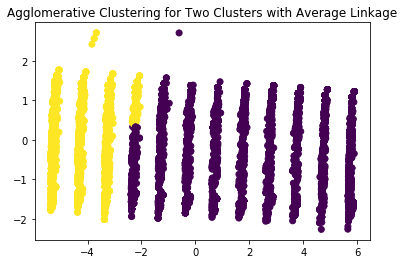

Silhouette Score:  0.5418600906878721
Davies Bouldin Index:  0.563876445884935


In [108]:
# plotting the clusters with the best silhouette score with average linkage

agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=2)
cluster_labels = agg_cluster.fit_predict(pca_components)

plt.title('Agglomerative Clustering for Two Clusters with Average Linkage')
plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(pca_components, cluster_labels))

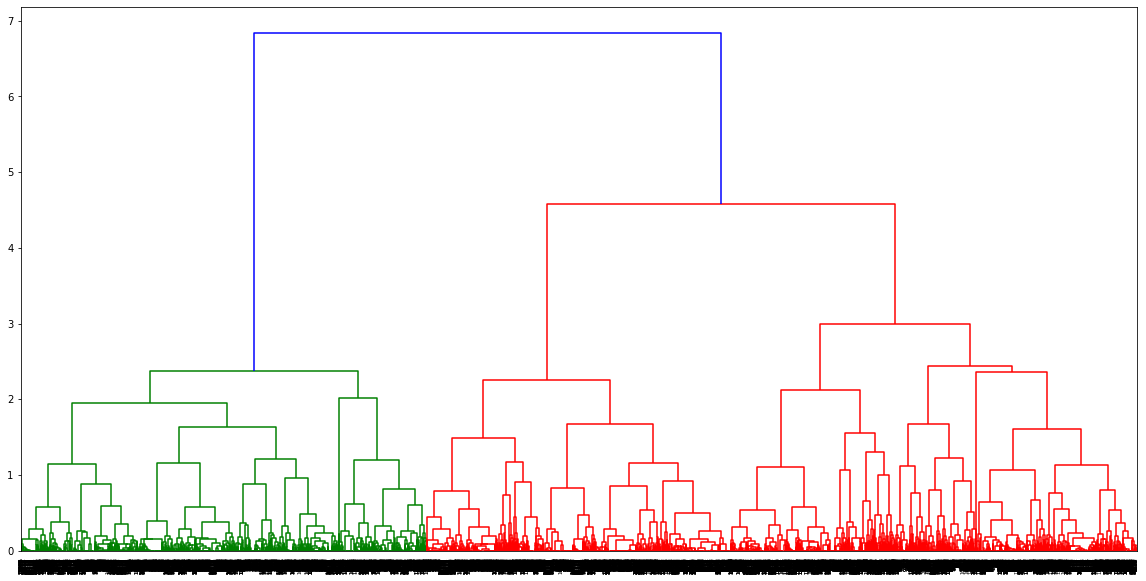

In [109]:
agg_cluster = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
clusters = agg_cluster.fit_predict(pca_components)

plt.figure(figsize=(20,10))
dendrogram(lnkg(pca_components, method='average'))
plt.show()

In [111]:
# outbreaks.isnull()
# null_columns = outbreaks.columns[outbreaks.isnull().any()]

# outbreaks[null_columns].isnull().sum()

# outbreaks[outbreaks['agg_pca_clusters'] == 3]

In [112]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)

agg_clusters = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)
agg_custer = agg_clusters.fit_predict(pca_components)
unique, counts = np.unique(agg_cluster.labels_, return_counts=True)
print(dict(zip(unique, counts)))
outbreaks['agg_pca_clusters'] = agg_cluster.labels_
outbreaks.head()

{0: 6704, 1: 5998}


Id source   latitude  longitude  region             country  \
0  230399    OIE -27.900000  30.800000  Africa        South Africa   
1  230381    OIE  54.837037  73.354155  Europe  Russian Federation   
3  230396    OIE -26.000000  28.300000  Africa        South Africa   
4  230371    OIE  49.237900  17.700200  Europe      Czech Republic   
5  230370    OIE  49.237300  17.700800  Europe      Czech Republic   

  localityQuality observationDate reportingDate     status  \
0           Exact      2017-08-17    2017-08-22  Confirmed   
1           Exact      2017-08-16    2017-08-18  Confirmed   
3           Exact      2017-08-15    2017-08-22  Confirmed   
4           Exact      2017-08-15    2017-08-17  Confirmed   
5           Exact      2017-08-15    2017-08-17  Confirmed   

               disease        serotypes              speciesDescription  \
0    Influenza - Avian        H5N8 HPAI  [domestic,, unspecified, bird]   
1  African swine fever  UknownSerotypes              [domestic,, swine]   
3    Influenza - Avian        H5N8 HPAI      [wild,, unspecified, bird]   
4  African swine fever  UknownSerotypes             [wild,, wild, boar]   
5  African swine fever  UknownSerotypes             [wild,, wild, boar]   

       sumAtRisk  sumCases  sumDeaths  sumDestroyed  sumSlaughtered  \
0  248000.000000      12.0       12.0  50000.000000        0.000000   
1     122.000000       6.0        1.0      0.000000        0.000000   
3    7500.691709       1.0        1.0      0.000000        0.000000   
4    7500.691709       1.0        1.0   3765.857978      100.211443   
5    7500.691709       1.0        1.0   3765.857978      100.211443   

   humansAge  humansAffected  humansDeaths  differenceInDays  observationYear  \
0   0.000000             1.0           1.0               5.0             2017   
1  17.701311             1.0           1.0               2.0             2017   
3   0.000000             1.0           1.0               7.0             2017   
4  17.701311             1.0           1.0               2.0             2017   
5  17.701311             1.0           1.0               2.0             2017   

   observationMonth  observationDay  observationFirstHalfMonth  \
0                 8              17                          0   
1                 8              16                          0   
3                 8              15                          1   
4                 8              15                          1   
5                 8              15                          1   

   observationSecondHalfMonth  EC  FAO Field Officer  FAO officer  FAO-Report  \
0                           1   0                  0            0           0   
1                           1   0                  0            0           0   
3                           0   0                  0            0           0   
4                           0   0                  0            0           0   
5                           0   0                  0            0           0   

   International reference laboratory  \
0                                   0   
1                                   0   
3                                   0   
4                                   0   
5                                   0   

   National Institute for Communicable Diseases, NICD  National authorities  \
0                                                  0                      0   
1                                                  0                      0   
3                                                  0                      0   
4                                                  0                      0   
5                                                  0                      0   

   OIE  Other  Publications  WHO  sequence only  Africa  Americas  Asia  \
0    1      0             0    0              0       1         0     0   
1    1      0             0    0              0       0         0     0   
3    1      0    

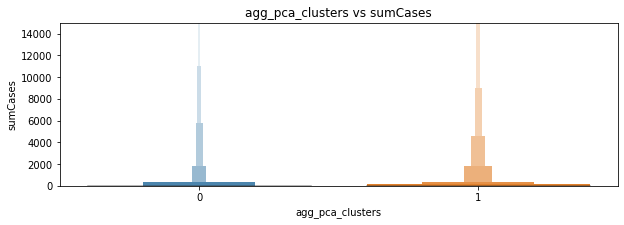

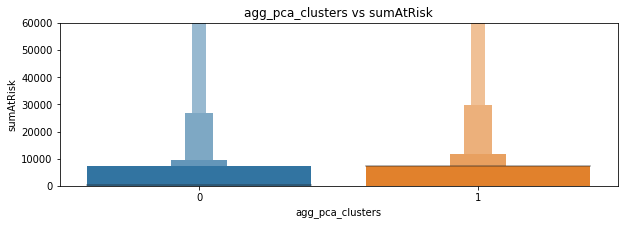

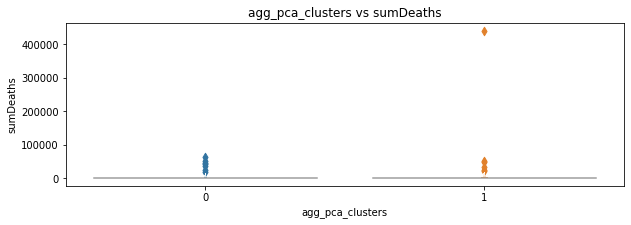

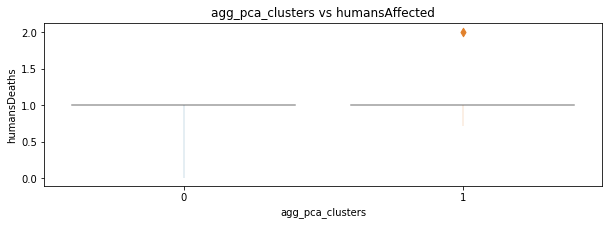

In [113]:
plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['agg_pca_clusters'], y=outbreaks['sumCases'])
plt.title('agg_pca_clusters vs sumCases')
box.set_ylim(0, 15000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['agg_pca_clusters'], y=outbreaks['sumAtRisk'])
plt.title('agg_pca_clusters vs sumAtRisk')
box.set_ylim(0, 60000)
plt.show()

plt.figure(figsize=(10,3))
bpx = sns.boxenplot(x=outbreaks['agg_pca_clusters'], y=outbreaks['sumDeaths'])
plt.title('agg_pca_clusters vs sumDeaths')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['agg_pca_clusters'], y=outbreaks['humansAffected'])
plt.title('agg_pca_clusters vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['agg_pca_clusters'], y=outbreaks['humansDeaths'])
plt.title('agg_pca_clusters vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

## Agglomerative Clustering for All Features with UMAP Components

With the highest silhouette score at 0.43, we've seen better.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


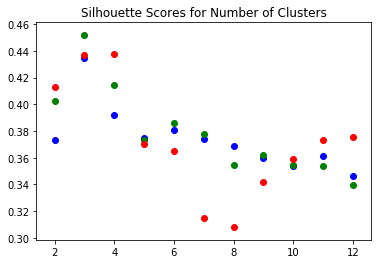

Best Silhouette score with ward linkage is 0.4346044361591339 with 3 clusters. 
Best Silhouette score with complete linkage is 0.452152818441391 with 3 clusters. 
Best Silhouette score with average linkage is 0.4375905692577362 with 4 clusters. 
Best Davies Bouldin score:  0.7126952141499197


In [114]:
# With PCA components from all features
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.75,
                      metric='correlation').fit_transform(X_all)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


silhouettes_aggumap_complete = {} # silhoutte scores are keys, clusters are values
silhouettes_aggumap_average = {} # silhoutte scores are keys, clusters are values
dbs_aggumap = []
linkage_types = ['ward', 'complete', 'average']


# looping through cluster numbers to find the best cluster
silhouettes_aggumap_ward = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_aggumap_ward[silhouette] = cluster
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_aggumap.append(db)
        
silhouettes_aggumap_complete = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_aggumap_complete[silhouette] = cluster
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_aggumap.append(db)
        
silhouettes_aggumap_average = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_aggumap_average[silhouette] = cluster
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_aggumap.append(db)

# plotting the silhouette scores  
plt.scatter(list(silhouettes_aggumap_ward.values()), list(silhouettes_aggumap_ward.keys()), color='blue', label='ward')
plt.scatter(list(silhouettes_aggumap_complete.values()), list(silhouettes_aggumap_complete.keys()), color='green', label='complete')
plt.scatter(list(silhouettes_aggumap_average.values()), list(silhouettes_aggumap_average.keys()), color='red', label='average')
plt.title('Silhouette Scores for Number of Clusters') 
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.show()
plt.show()


print('Best Silhouette score with ward linkage is {} with {} clusters. '.format(max(silhouettes_aggumap_ward.keys()), silhouettes_aggumap_ward[max(silhouettes_aggumap_ward.keys())]))
print('Best Silhouette score with complete linkage is {} with {} clusters. '.format(max(silhouettes_aggumap_complete.keys()), silhouettes_aggumap_complete[max(silhouettes_aggumap_complete.keys())]))
print('Best Silhouette score with average linkage is {} with {} clusters. '.format(max(silhouettes_aggumap_average.keys()), silhouettes_aggumap_average[max(silhouettes_aggumap_average.keys())]))
print('Best Davies Bouldin score: ', min(dbs_aggumap))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


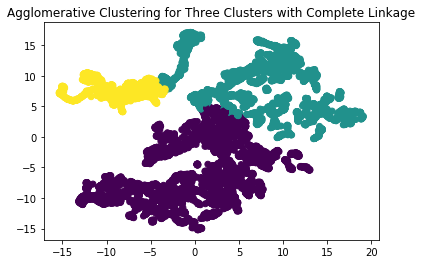

Silhouette Score:  0.40848398
Davies Bouldin Index:  0.7493799995154989
complete linkage with 3 clusters
{0: 6546, 1: 4577, 2: 1579}


AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

In [131]:
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_all)

agg_clusters = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=3)
cluster_labels = agg_clusters.fit_predict(umap_results)

plt.title('Agglomerative Clustering for Three Clusters with Complete Linkage')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

unique, counts = np.unique(agg_clusters.labels_, return_counts=True)
print('complete linkage with 3 clusters')
print(dict(zip(unique, counts)))

unique, counts = np.unique(cluster_labels.labels_, return_counts=True)
print('complete linkage with 3 clusters')
print(dict(zip(unique, counts)))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


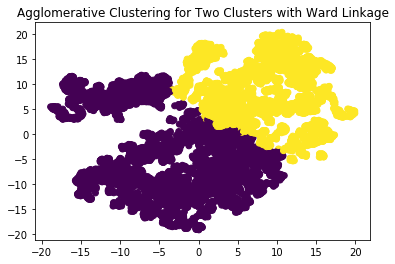

Silhouette Score:  0.3844578
Davies Bouldin Index:  0.9878909083859875
Ward linkage with two clusters
{0: 7786, 1: 4916}


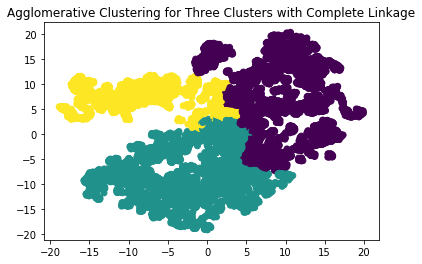

Silhouette Score:  0.38932356
Davies Bouldin Index:  0.8138011885569981
Complete linkage with Two clusters
{0: 4822, 1: 5447, 2: 2433}


Silhouette Score:  0.3631132
Davies Bouldin Index:  0.7985408945366816
Average linkage with three clusters
{0: 7528, 1: 3364, 2: 1810}


In [132]:
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=1,
                      metric='correlation').fit_transform(X_all)

## ward linkage with two clusters
agg_clusters = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=2)
cluster_labels = agg_clusters.fit_predict(umap_results)

plt.title('Agglomerative Clustering for Two Clusters with Ward Linkage')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

unique, counts = np.unique(agg_clusters.labels_, return_counts=True)
print('Ward linkage with two clusters')
print(dict(zip(unique, counts)))


# complete linkage with three clusters
agg_clusters = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=3)
cluster_labels = agg_clusters.fit_predict(umap_results)

plt.title('Agglomerative Clustering for Three Clusters with Complete Linkage')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

unique, counts = np.unique(agg_clusters.labels_, return_counts=True)
print('Complete linkage with two clusters')
print(dict(zip(unique, counts)))


# average linkage with three clusters
agg_clusters = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=3)
cluster_labels = agg_clusters.fit_predict(umap_results)

plt.title('Agglomerative Clustering for Three Clusters with Average Linkage')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

unique, counts = np.unique(agg_clusters.labels_, return_counts=True)
print('Average linkage with three clusters')
print(dict(zip(unique, counts)))

In [ ]:
# umap_results = umap.UMAP(n_neighbors=250,
#                       min_dist=0.5,
#                       metric='correlation').fit_transform(X_all)

# agg_clusters = AgglomerativeClustering(linkage='ward', 
#                                       affinity='euclidean',
#                                       n_clusters=2)
# agg_custer = agg_clusters.fit_predict(umap_results)
# unique, counts = np.unique(agg_cluster.labels_, return_counts=True)
# print(dict(zip(unique, counts)))
# outbreaks['agg_umap_clusters'] = agg_cluster.labels_
# outbreaks[outbreaks['agg_umap_clusters'] == 1]

In [123]:
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_all)

# ward linkage with 3 clusters
agg_clusters = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=3)
agg_cluster = agg_clusters.fit_predict(umap_results)
unique, counts = np.unique(agg_clusters.labels_, return_counts=True)
print('ward linkage with 3 clusters')
print(dict(zip(unique, counts)))


# complete linkage with 3 clusters
agg_clusters = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=3)
agg_cluster = agg_clusters.fit_predict(umap_results)
unique, counts = np.unique(agg_cluster.labels_, return_counts=True)
print('complete linkage with 3 clusters')
print(dict(zip(unique, counts)))

# average linkage with 4 clusters
agg_clusters = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=4)
agg_cluster = agg_clusters.fit_predict(umap_results)
unique, counts = np.unique(agg_cluster.labels_, return_counts=True)
print('average linkage with 4 clusters')
print(dict(zip(unique, counts)))


# outbreaks['agg_umap_clusters'] = agg_cluster.labels_

# outbreaks[outbreaks['agg_umap_clusters'] == 3]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


ward linkage with 3 clusters
{0: 1362, 1: 845, 2: 1949, 3: 1070, 4: 2139, 5: 319, 6: 468, 7: 521, 8: 2407, 9: 1088, 10: 292, 11: 242}
complete linkage with 3 clusters
{0: 1362, 1: 845, 2: 1949, 3: 1070, 4: 2139, 5: 319, 6: 468, 7: 521, 8: 2407, 9: 1088, 10: 292, 11: 242}
average linkage with 4 clusters
{0: 1362, 1: 845, 2: 1949, 3: 1070, 4: 2139, 5: 319, 6: 468, 7: 521, 8: 2407, 9: 1088, 10: 292, 11: 242}


In [136]:
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_all)

agg_clusters = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=3)
unique, counts = np.unique(agg_clusters.labels_, return_counts=True)
print(dict(zip(unique, counts)))

plt.figure(figsize=(20,10))
dendrogram(lnkg(umap_results, method='average'))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


AttributeError: 'AgglomerativeClustering' object has no attribute 'labels_'

## Agglomerative Clustering for humansDeaths Features with UMAP Components

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


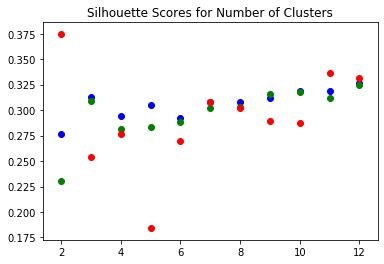

Best Silhouette score with ward linkage is 0.3264751732349396 with 12 clusters. 
Best Silhouette score with complete linkage is 0.32511547207832336 with 12 clusters. 
Best Silhouette score with average linkage is 0.3747371435165405 with 2 clusters. 
Best Davies Bouldin score:  0.4549282371872528


In [30]:
# With UMAP components from features with greater than 0.01 correlation
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_01hd)
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


silhouettes_aggumap_complete = {} # silhoutte scores are keys, clusters are values
silhouettes_aggumap_average = {} # silhoutte scores are keys, clusters are values
dbs_aggumap = []
linkage_types = ['ward', 'complete', 'average']


# looping through cluster numbers to find the best cluster
silhouettes_aggumap_ward = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_aggumap_ward[silhouette] = cluster
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_aggumap.append(db)
        
silhouettes_aggumap_complete = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_aggumap_complete[silhouette] = cluster
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_aggumap.append(db)
        
silhouettes_aggumap_average = {} # silhoutte scores are keys, clusters are values
for cluster in clusters:
        agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=cluster)
        cluster_labels = agg_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_aggumap_average[silhouette] = cluster
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_aggumap.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_aggumap_ward.values()), list(silhouettes_aggumap_ward.keys()), color='blue', label='ward')
plt.scatter(list(silhouettes_aggumap_complete.values()), list(silhouettes_aggumap_complete.keys()), color='green', label='complete')
plt.scatter(list(silhouettes_aggumap_average.values()), list(silhouettes_aggumap_average.keys()), color='red', label='average')
plt.title('Silhouette Scores for Number of Clusters') 
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.show()
plt.show()


print('Best Silhouette score with ward linkage is {} with {} clusters. '.format(max(silhouettes_aggumap_ward.keys()), silhouettes_aggumap_ward[max(silhouettes_aggumap_ward.keys())]))
print('Best Silhouette score with complete linkage is {} with {} clusters. '.format(max(silhouettes_aggumap_complete.keys()), silhouettes_aggumap_complete[max(silhouettes_aggumap_complete.keys())]))
print('Best Silhouette score with average linkage is {} with {} clusters. '.format(max(silhouettes_aggumap_average.keys()), silhouettes_aggumap_average[max(silhouettes_aggumap_average.keys())]))
print('Best Davies Bouldin score: ', min(dbs_aggumap))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


Silhouette Score:  0.3348393
Davies Bouldin Index:  0.8749347191612965


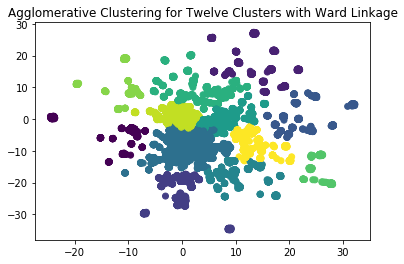

Silhouette Score:  0.35300252
Davies Bouldin Index:  0.8363446959142543


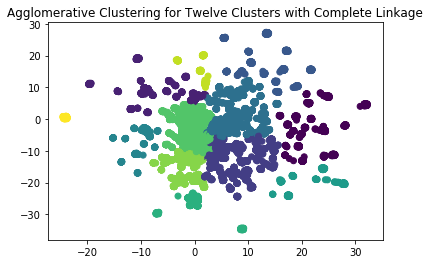

Silhouette Score:  0.30939564
Davies Bouldin Index:  0.8336588154655925


In [121]:
# plotting the clusters with the best silhouette score with average linkage
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_01hd)
agg_cluster = AgglomerativeClustering(linkage='average', 
                                      affinity='euclidean',
                                      n_clusters=2)
cluster_labels = agg_cluster.fit_predict(umap_results)

plt.title('Agglomerative Clustering for Two Clusters with Average Linkage')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))




# twelve clusters with ward linkage
agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=12)
cluster_labels = agg_cluster.fit_predict(umap_results)

plt.title('Agglomerative Clustering for Twelve Clusters with Ward Linkage')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))


# twelve clusters with complete linkage
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='euclidean',
                                      n_clusters=12)
cluster_labels = agg_cluster.fit_predict(umap_results)

plt.title('Agglomerative Clustering for Twelve Clusters with Complete Linkage')
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()

print('Silhouette Score: ', metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean'))
print('Davies Bouldin Index: ', metrics.davies_bouldin_score(umap_results, cluster_labels))

## DBSCAN with PCA Components 

In [191]:
def dbscan_find_clusters(eps, min_samples, X):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    num_labels = len(set(labels))
    num_samples = X.shape[0]
    silhouettes_dbscan = {}
    if num_labels == 1 or num_labels == num_samples:
          silhouette = -1
          silhouettes_dbscan[silhouette] = min_samples
          print('{} min samples and {} eps have no clusters.'.format(min_samples, eps))
    else:
          silhouette = metrics.silhouette_score(X, labels)
          print('{} min samples and {} eps have {} silhouette score.'.format(min_samples, eps, silhouette))
          return {
            'eps': eps,
            'min_samples': min_samples,
            'silhouette_score': silhouette,
            'davies_bouldin': metrics.davies_bouldin_score(X, labels)
            }
          silhouettes_dbscan[silhouette] = min_samples
    plt.title('Silhouette Scores for {} eps'.format(eps))
    plt.scatter(list(silhouettes_dbscan.values()), list(silhouettes_dbscan.keys()), color='blue')
    plt.xlabel('Min Samples')
    plt.ylabel('Silhouette Score') 
        
    
    
# plt.title('Silhouette Scores for Number of Clusters')  
# plt.scatter(list(silhouettes_aggumap_ward.values()), list(silhouettes_aggumap_ward.keys()), color='blue')
# plt.scatter(list(silhouettes_aggumap_complete.values()), list(silhouettes_aggumap_complete.keys()), color='green')
# plt.scatter(list(silhouettes_aggumap_average.values()), list(silhouettes_aggumap_average.keys()), color='red')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')

2 min samples and 0.01 eps have no clusters.
4 min samples and 0.01 eps have no clusters.
6 min samples and 0.01 eps have no clusters.
2 min samples and 0.5 eps have no clusters.
4 min samples and 0.5 eps have no clusters.
6 min samples and 0.5 eps have no clusters.
2 min samples and 0.7 eps have no clusters.
4 min samples and 0.7 eps have no clusters.
6 min samples and 0.7 eps have no clusters.
2 min samples and 1 eps have -0.8002371816972413 silhouette score.
4 min samples and 1 eps have no clusters.
6 min samples and 1 eps have no clusters.


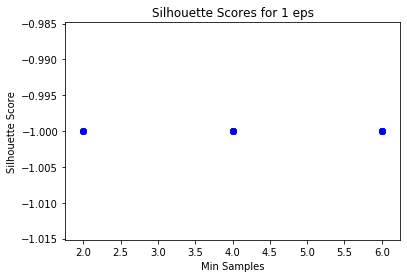

In [192]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)

results = [dbscan_find_clusters(eps, min_samples, pca_components) for eps in [0.01, 0.5, 0.7, 1] for min_samples in [2,4,6]]
                                   

In [193]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)

results = [dbscan_find_clusters(eps, min_samples, pca_components) for eps in [0.01, 0.5, 0.7, 1] for min_samples in [2,3,4,5,6,10,15]]


2 min samples and 0.01 eps have 0.8419682431471053 silhouette score.
3 min samples and 0.01 eps have 0.7442667121777342 silhouette score.
4 min samples and 0.01 eps have 0.661671677849761 silhouette score.
5 min samples and 0.01 eps have 0.5960372397795372 silhouette score.
6 min samples and 0.01 eps have 0.5394336225733128 silhouette score.
10 min samples and 0.01 eps have 0.33444507111603683 silhouette score.
15 min samples and 0.01 eps have 0.14825822476552591 silhouette score.
2 min samples and 0.5 eps have 0.29494346040190983 silhouette score.
3 min samples and 0.5 eps have 0.29494346040190983 silhouette score.
4 min samples and 0.5 eps have 0.29494346040190983 silhouette score.
5 min samples and 0.5 eps have 0.29494346040190983 silhouette score.
6 min samples and 0.5 eps have 0.3028279840423661 silhouette score.
10 min samples and 0.5 eps have 0.3028279840423661 silhouette score.
15 min samples and 0.5 eps have 0.3028279840423661 silhouette score.
2 min samples and 0.7 eps have 0

The silhoutte score of the DBSCAN solution: 0.8419682309937543


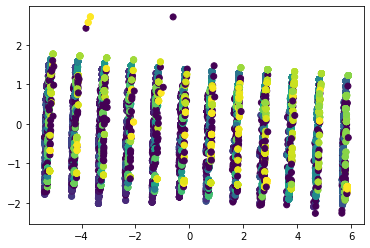

{-1: 909, 0: 2, 1: 3, 2: 2, 3: 2, 4: 6, 5: 10, 6: 3, 7: 2, 8: 2, 9: 5, 10: 9, 11: 2, 12: 3, 13: 6, 14: 7, 15: 10, 16: 5, 17: 3, 18: 21, 19: 101, 20: 2, 21: 17, 22: 9, 23: 2, 24: 5, 25: 4, 26: 7, 27: 11, 28: 2, 29: 66, 30: 9, 31: 4, 32: 6, 33: 7, 34: 12, 35: 2, 36: 2, 37: 3, 38: 26, 39: 2, 40: 4, 41: 3, 42: 3, 43: 7, 44: 2, 45: 8, 46: 26, 47: 6, 48: 6, 49: 55, 50: 11, 51: 73, 52: 4, 53: 41, 54: 14, 55: 8, 56: 5, 57: 3, 58: 3, 59: 5, 60: 2, 61: 24, 62: 20, 63: 58, 64: 6, 65: 13, 66: 10, 67: 14, 68: 6, 69: 3, 70: 6, 71: 10, 72: 3, 73: 3, 74: 4, 75: 2, 76: 2, 77: 6, 78: 8, 79: 6, 80: 7, 81: 3, 82: 3, 83: 3, 84: 10, 85: 7, 86: 12, 87: 3, 88: 6, 89: 21, 90: 9, 91: 2, 92: 23, 93: 6, 94: 2, 95: 5, 96: 4, 97: 2, 98: 10, 99: 2, 100: 22, 101: 2, 102: 18, 103: 5, 104: 7, 105: 5, 106: 33, 107: 7, 108: 2, 109: 14, 110: 5, 111: 12, 112: 6, 113: 3, 114: 3, 115: 3, 116: 49, 117: 5, 118: 6, 119: 5, 120: 6, 121: 11, 122: 4, 123: 2, 124: 4, 125: 2, 126: 3, 127: 3, 128: 2, 129: 2, 130: 2, 131: 2, 132: 2, 1

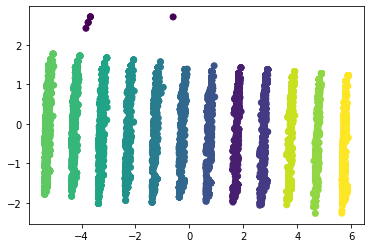

{-1: 6, 0: 942, 1: 794, 2: 921, 3: 848, 4: 767, 5: 734, 6: 1101, 7: 1409, 8: 1719, 9: 1024, 10: 992, 11: 1445}


In [178]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)
dbscan_cluster = DBSCAN(eps=0.01, min_samples=2)
clusters = dbscan_cluster.fit_predict(pca_components)  
print("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(pca_components, clusters, metric='euclidean')))
plt.scatter(pca_components[:,0], pca_components[:,1], c=clusters)
plt.show()

unique, counts = np.unique(dbscan_cluster.labels_, return_counts=True)
print(dict(zip(unique, counts)))

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)
dbscan_cluster = DBSCAN(eps=0.5, min_samples=6)
clusters = dbscan_cluster.fit_predict(pca_components)  
print("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(pca_components, clusters, metric='euclidean')))
plt.scatter(pca_components[:,0], pca_components[:,1], c=clusters)
plt.show()

unique, counts = np.unique(dbscan_cluster.labels_, return_counts=True)
print(dict(zip(unique, counts)))

In [170]:
# pca = PCA(n_components=2)
# pca_components = pca.fit_transform(X_all)
# min_samples = [2, 3, 4, 5, 6]
# dbs_dbscan_pca = []



# # looping through cluster numbers to find the best cluster
# silhouettes_dbscanpca_3 = {} # silhoutte scores are keys, clusters are values
# for min_sample in min_samples:
#         dbscan_cluster = DBSCAN(eps=0.3, min_samples=min_sample)
#         cluster_labels = dbscan_cluster.fit_predict(pca_components)
#         try:
#             silhouette = metrics.silhouette_score(pca_components, clusters, metric='euclidean')
#             silhouettes_dbscanpca_3[silhouette] = min_sample
#             db = metrics.davies_bouldin_score(pca_components, cluster_labels)
#             dbs_dbscan_pca.append(db)
#         except ValueError:
#             print('\n')
#             print('---------------------------------------------------')
#             print('DBSCAN with 0.3 eps and', min_sample, 'min samples was unable to find any clusters.')
#             print('---------------------------------------------------')
#             print('\n')
        
# silhouettes_dbscanpca_5 = {} # silhoutte scores are keys, clusters are values
# for min_sample in min_samples:
#         dbscan_cluster = DBSCAN(eps=0.5, min_samples=min_sample)
#         cluster_labels = dbscan_cluster.fit_predict(pca_components)
#         try:
#             silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
#             silhouettes_dbsanpca_5[silhouette] = min_sample
#             db = metrics.davies_bouldin_score(pca_components, cluster_labels)
#             dbs_dbscan_pca.append(db)
#         except ValueError:
#             print('\n')
#             print('---------------------------------------------------')
#             print('DBSCAN with 0.5 eps and', min_sample, 'min samples was unable to find any clusters.')
#             print('---------------------------------------------------')
#             print('\n')
        
# silhouettes_dbscanpca_7 = {} # silhoutte scores are keys, clusters are values
# for min_sample in min_samples:
#         dbscan_cluster = DBSCAN(eps=0.7, min_samples=min_sample)
#         cluster_labels = dbscan_cluster.fit_predict(pca_components)
#         try: 
#             silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
#             silhouettes_dbscanpca_7[silhouette] = min_sample
#             db = metrics.davies_bouldin_score(pca_components, cluster_labels)
#             dbs_dbscan_pca.append(db)
#         except ValueError:
#             print('\n')
#             print('---------------------------------------------------')
#             print('DBSCAN with 0.7 eps and', min_sample, 'min samples was unable to find any clusters.')
#             print('---------------------------------------------------')
#             print('\n')
            
# silhouettes_dbscanpca_1 = {} # silhoutte scores are keys, clusters are values
# for min_sample in min_samples:
#         dbscan_cluster = DBSCAN(eps=1, min_samples=min_sample)
#         cluster_labels = dbscan_cluster.fit_predict(pca_components)
#         try: 
#             silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
#             silhouettes_dbscanpca_1[silhouette] = min_sample
#             db = metrics.davies_bouldin_score(pca_components, cluster_labels)
#             dbs_dbscan_pca.append(db)
#         except ValueError:
#             print('\n')
#             print('---------------------------------------------------')
#             print('DBSCAN with 1 eps and', min_sample, 'min samples was unable to find any clusters.')
#             print('---------------------------------------------------')
#             print('\n')
            
# silhouettes_dbscanpca_2 = {} # silhoutte scores are keys, clusters are values
# for min_sample in min_samples:
#         dbscan_cluster = DBSCAN(eps=2, min_samples=min_sample)
#         cluster_labels = dbscan_cluster.fit_predict(pca_components)
#         try: 
#             silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
#             silhouettes_dbscanpca_2[silhouette] = min_sample
#             db = metrics.davies_bouldin_score(pca_components, cluster_labels)
#             dbs_dbscan_pca.append(db)
#         except ValueError:
#             print('\n')
#             print('---------------------------------------------------')
#             print('DBSCAN with 2 eps and', min_sample, 'min samples was unable to find any clusters.')
#             print('---------------------------------------------------')
#             print('\n')

# # plotting the silhouette scores
# plt.title('Silhouette Scores for Number of Clusters')  
# plt.scatter(list(silhouettes_dbscanpca_3.values()), list(silhouettes_dbscanpca_3.keys()), color='blue')
# plt.scatter(list(silhouettes_dbscanpca_5.values()), list(silhouettes_dbscanpca_5.keys()), color='green')
# plt.scatter(list(silhouettes_dbscanpca_7.values()), list(silhouettes_dbscanpca_7.keys()), color='red')
# plt.scatter(list(silhouettes_dbscanpca_1.values()), list(silhouettes_dbscanpca_1.keys()), color='pink')
# plt.scatter(list(silhouettes_dbscanpca_2.values()), list(silhouettes_dbscanpca_2.keys()), color='orange')
# plt.show()

# try: 
#     print('Best Silhouette score with eps 0.3 is {} with {} clusters. '.format(max(silhouettes_dbscanpca_3.keys()), silhouettes_dbscanpca_3[max(silhouettes_dbscanpca_3.keys())]))
# except ValueError:
#     print('DBSCAN does not work with 0.3 eps.')
# try:
#     print('Best Silhouette score with eps 0.5 is {} with {} clusters. '.format(max(silhouettes_dbscanpca_5.keys()), silhouettes_dbscanpca_5[max(silhouettes_dbscanpca_5.keys())]))
# except ValueError:
#     print('DBSCAN does not work with 0.5 eps.')
# try:
#     print('Best Silhouette score with eps 0.7 is {} with {} clusters. '.format(max(silhouettes_dbscanpca_7.keys()), silhouettes_dbscanpca_7[max(silhouettes_dbscanpca_7.keys())]))
# except ValueError:
#     print('DBSCAN does not work with 0.7 eps.')
# try:
#     print('Best Silhouette score with eps 1 is {} with {} clusters. '.format(max(silhouettes_dbscanpca_1.keys()), silhouettes_dbscanpca_1[max(silhouettes_dbscanpca_1.keys())]))
# except ValueError:
#     print('DBSCAN does not work with 1 eps.')    
# try:
#     print('Best Silhouette score with eps 2 is {} with {} clusters. '.format(max(silhouettes_dbscanpca_2.keys()), silhouettes_dbscanpca_2[max(silhouettes_dbscanpca_2.keys())]))
# except ValueError:
#     print('DBSCAN does not work with 2 eps.')
# print('Best Davies Bouldin score: ', min(dbs_dbscan_pca))

In [171]:
# # With UMAP components from all features
# umap_results = umap.UMAP(n_neighbors=250,
#                       min_dist=0.5,
#                       metric='correlation').fit_transform(X_all)

# min_samples = [2, 3, 4, 5, 6]
# dbs_dbscan_umap = []



# # looping through cluster numbers to find the best cluster
# silhouettes_dbscanumap_3 = {} # silhoutte scores are keys, clusters are values
# for min_sample in min_samples:
#        dbscan_cluster = DBSCAN(eps=0.3, min_samples=min_sample)
#        cluster_labels = dbscan_cluster.fit_predict(umap_results)
#        try:
#            silhouette = metrics.silhouette_score(umap_results, clusters, metric='euclidean')
#            silhouettes_dbscanumap_3[silhouette] = min_sample
#            db = metrics.davies_bouldin_score(umap_results, cluster_labels)
#            dbs_dbscan_umap.append(db)
#        except ValueError as e:
#            exceptions.append({'dbscanumap_3': e})
#            print('\n')
#            print('---------------------------------------------------')
#            print('DBSCAN with 0.3 eps and', min_sample, 'min samples was unable to find any clusters.')
#            print('---------------------------------------------------')
#            print('\n')
        
# silhouettes_dbscanumap_5 = {} # silhoutte scores are keys, clusters are values
# for min_sample in min_samples:
#         dbscan_cluster = DBSCAN(eps=ep, min_samples=min_sample)
#         cluster_labels = dbscan_cluster.fit_predict(umap_results)
#         try:
#             ("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
#             silhouettes_dbumap.append(metrics.silhouette_score(umap_results, clusters, metric='euclidean'))
#             silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
#             silhouettes_dbscanumap_5[silhouette] = min_sample
#             db = metrics.davies_bouldin_score(umap_results, cluster_labels)
#             dbs_dbscan_umap.append(db)
#         except ValueError:
#             print('\n')
#             print('---------------------------------------------------')
#             print('DBSCAN with 0.5 eps and', min_sample, 'min samples was unable to find any clusters.')
#             print('---------------------------------------------------')
#             print('\n')
        
# silhouettes_dbscanumap_7 = {} # silhoutte scores are keys, clusters are values
# for min_sample in min_samples:
#         dbscan_cluster = DBSCAN(eps=0.7, min_samples=min_sample)
#         cluster_labels = dbscan_cluster.fit_predict(umap_results)
#         try: 
#             silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
#             silhouettes_dbscanumap_7[silhouette] = cluster
#             db = metrics.davies_bouldin_score(umap_results, cluster_labels)
#             dbs_dbscan_umap.append(db)
#         except ValueError:
#             print('\n')
#             print('---------------------------------------------------')
#             print('DBSCAN with 0.7 eps and', min_sample, 'min samples was unable to find any clusters.')
#             print('---------------------------------------------------')
#             print('\n')

# # plotting the silhouette scores
# plt.title('Silhouette Scores for Number of Clusters')  
# plt.scatter(list(silhouettes_dbscanumap_3.values()), list(silhouettes_dbscanumap_3.keys()), color='blue')
# plt.scatter(list(silhouettes_dbscanumap_5.values()), list(silhouettes_dbscanumap_5.keys()), color='green')
# plt.scatter(list(silhouettes_dbscanumap_7.values()), list(silhouettes_dbscanumap_7.keys()), color='red')
# plt.show()

# try: 
#     print('Best Silhouette score with eps 0.3 is {} with {} clusters. '.format(max(silhouettes_dbscanumap_3.keys()), silhouettes_dbscanumap_3[max(silhouettes_dbscanumap_3.keys())]))
# except ValueError:
#     print('DBSCAN does not work with 0.3 eps.')
# try:
#     print('Best Silhouette score with eps 0.5 is {} with {} clusters. '.format(max(silhouettes_dbscanumap_5.keys()), silhouettes_dbscanumap_5[max(silhouettes_dbscanumap_5.keys())]))
# except ValueError:
#     print('DBSCAN does not work with 0.5 eps.')
# try:
#     print('Best Silhouette score with eps 0.7 is {} with {} clusters. '.format(max(silhouettes_dbscanumap_7.keys()), silhouettes_dbscanumap_7[max(silhouettes_dbscanumap_7.keys())]))
# except ValueError:
#     print('DBSCAN does not work with 0.7 eps.')
    
# print('Best Davies Bouldin score: ', min(dbs_dbscan_umap))

In [ ]:
# With UMAP components from all features
umap_results = umap.UMAP(n_neighbors=250,
                     min_dist=0.5,
                     metric='correlation').fit_transform(X_all)
min_samples = [2, 3, 4, 5, 6]
dbs_dbscan_umap = []
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
exceptions = []
# looping through cluster numbers to find the best cluster
silhouettes_dbscanumap_3 = {} # silhoutte scores are keys, clusters are values
for min_sample in min_samples:
       dbscan_cluster = DBSCAN(eps=0.5, min_samples=min_sample)
       cluster_labels = dbscan_cluster.fit_predict(umap_results)
       try:
           silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
           silhouettes_dbscanumap_3[silhouette] = min_sample
           db = metrics.davies_bouldin_score(umap_results, cluster_labels)
           dbs_dbscan_umap.append(db)
       except ValueError as e:
           exceptions.append({'dbscanumap_3': e})
           print('\n')
           print('---------------------------------------------------')
           print('DBSCAN with 0.3 eps and', min_sample, 'min samples was unable to find any clusters.')
           print('---------------------------------------------------')
           print('\n')
       


## DBSCAN With UMAP

In [174]:
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_all)

results = [dbscan_find_clusters(eps, min_samples, umap_results) for eps in [0.01, 0.3, 0.5, 0.7, 1] for min_samples in [2,3,4,5,6,10,12]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


2 min samples and 0.01 eps have -0.8449912071228027 silhouette score.
3 min samples and 0.01 eps have -0.8296670913696289 silhouette score.
4 min samples and 0.01 eps have -0.41294634342193604 silhouette score.
5 min samples and 0.01 eps have 0.09494178742170334 silhouette score.
6 min samples and 0.01 eps have no clusters.
10 min samples and 0.01 eps have no clusters.
12 min samples and 0.01 eps have no clusters.
2 min samples and 0.3 eps have 0.10865484178066254 silhouette score.
3 min samples and 0.3 eps have 0.16946062445640564 silhouette score.
4 min samples and 0.3 eps have 0.18731999397277832 silhouette score.
5 min samples and 0.3 eps have 0.23037022352218628 silhouette score.
6 min samples and 0.3 eps have 0.23196269571781158 silhouette score.
10 min samples and 0.3 eps have 0.3021405041217804 silhouette score.
12 min samples and 0.3 eps have 0.3370727598667145 silhouette score.
2 min samples and 0.5 eps have -0.17215688526630402 silhouette score.
3 min samples and 0.5 eps hav

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


The silhoutte score of the DBSCAN solution: 0.4099346101284027


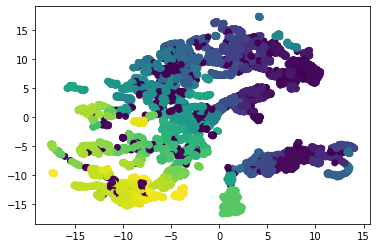

{-1: 577, 0: 67, 1: 57, 2: 89, 3: 384, 4: 566, 5: 33, 6: 21, 7: 104, 8: 67, 9: 28, 10: 58, 11: 28, 12: 63, 13: 64, 14: 62, 15: 52, 16: 46, 17: 26, 18: 137, 19: 54, 20: 50, 21: 36, 22: 160, 23: 15, 24: 73, 25: 25, 26: 106, 27: 50, 28: 47, 29: 20, 30: 15, 31: 36, 32: 21, 33: 31, 34: 33, 35: 92, 36: 157, 37: 69, 38: 55, 39: 133, 40: 26, 41: 44, 42: 301, 43: 16, 44: 32, 45: 63, 46: 122, 47: 27, 48: 56, 49: 26, 50: 165, 51: 84, 52: 175, 53: 32, 54: 14, 55: 42, 56: 23, 57: 71, 58: 102, 59: 104, 60: 67, 61: 29, 62: 73, 63: 45, 64: 30, 65: 28, 66: 19, 67: 85, 68: 26, 69: 34, 70: 22, 71: 57, 72: 39, 73: 28, 74: 35, 75: 39, 76: 143, 77: 45, 78: 14, 79: 54, 80: 43, 81: 14, 82: 36, 83: 26, 84: 46, 85: 57, 86: 117, 87: 15, 88: 54, 89: 59, 90: 47, 91: 186, 92: 41, 93: 27, 94: 17, 95: 22, 96: 71, 97: 84, 98: 26, 99: 93, 100: 71, 101: 74, 102: 57, 103: 61, 104: 231, 105: 34, 106: 43, 107: 94, 108: 59, 109: 31, 110: 32, 111: 34, 112: 91, 113: 37, 114: 59, 115: 38, 116: 13, 117: 20, 118: 10, 119: 106, 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


The silhoutte score of the DBSCAN solution: 0.13934805989265442


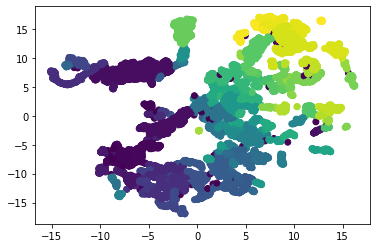

{-1: 54, 0: 67, 1: 273, 2: 399, 3: 2, 4: 1211, 5: 454, 6: 37, 7: 23, 8: 105, 9: 63, 10: 29, 11: 58, 12: 28, 13: 4, 14: 17, 15: 3, 16: 174, 17: 71, 18: 36, 19: 298, 20: 447, 21: 27, 22: 2, 23: 24, 24: 5, 25: 32, 26: 70, 27: 2, 28: 20, 29: 20, 30: 32, 31: 95, 32: 139, 33: 35, 34: 44, 35: 14, 36: 32, 37: 10, 38: 249, 39: 4, 40: 93, 41: 75, 42: 329, 43: 23, 44: 317, 45: 12, 46: 70, 47: 6, 48: 20, 49: 22, 50: 156, 51: 26, 52: 22, 53: 18, 54: 34, 55: 88, 56: 27, 57: 43, 58: 358, 59: 89, 60: 36, 61: 4, 62: 48, 63: 31, 64: 2, 65: 95, 66: 34, 67: 47, 68: 340, 69: 3, 70: 64, 71: 2, 72: 9, 73: 25, 74: 76, 75: 2, 76: 43, 77: 2, 78: 95, 79: 74, 80: 20, 81: 297, 82: 5, 83: 34, 84: 28, 85: 37, 86: 8, 87: 43, 88: 31, 89: 32, 90: 18, 91: 59, 92: 2, 93: 178, 94: 58, 95: 36, 96: 12, 97: 13, 98: 131, 99: 33, 100: 2, 101: 96, 102: 2, 103: 273, 104: 35, 105: 34, 106: 72, 107: 10, 108: 21, 109: 2, 110: 36, 111: 2, 112: 86, 113: 64, 114: 340, 115: 13, 116: 15, 117: 29, 118: 465, 119: 25, 120: 94, 121: 56, 122

In [179]:
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_all)
dbscan_cluster = DBSCAN(eps=0.3, min_samples=12)
clusters = dbscan_cluster.fit_predict(umap_results)  
print("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.show()

unique, counts = np.unique(dbscan_cluster.labels_, return_counts=True)
print(dict(zip(unique, counts)))


umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_all)
dbscan_cluster = DBSCAN(eps=0.3, min_samples=2)
clusters = dbscan_cluster.fit_predict(umap_results)  
print("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
plt.show()

unique, counts = np.unique(dbscan_cluster.labels_, return_counts=True)
print(dict(zip(unique, counts)))


0.1 eps and 2 min samples.
The silhoutte score of the DBSCAN solution: 0.36206376552581787
DB Index:  1.5901821528993068


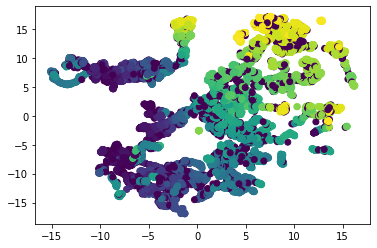



0.1 eps and 3 min samples.
The silhoutte score of the DBSCAN solution: 0.3517048954963684
DB Index:  1.5791810839824123


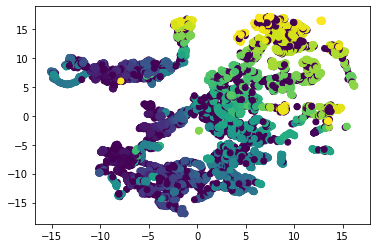



0.1 eps and 4 min samples.
The silhoutte score of the DBSCAN solution: 0.31397485733032227
DB Index:  1.6395983121559192


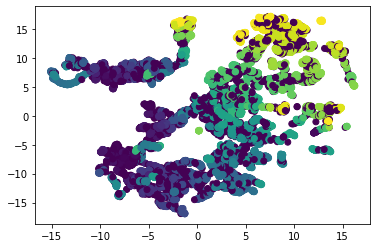



0.5 eps and 2 min samples.
The silhoutte score of the DBSCAN solution: -0.17256055772304535
DB Index:  1.4650065874648444


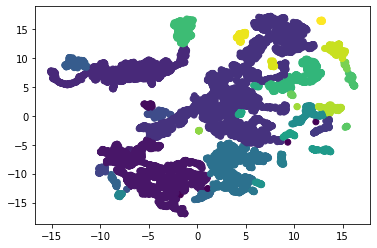



0.5 eps and 3 min samples.
The silhoutte score of the DBSCAN solution: -0.13769128918647766
DB Index:  1.4168717515583016


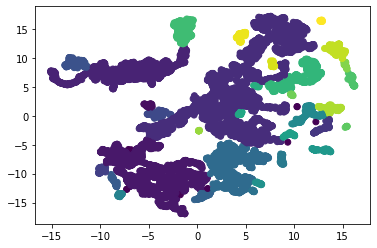



0.5 eps and 4 min samples.
The silhoutte score of the DBSCAN solution: -0.1378525048494339
DB Index:  1.3868804463787505


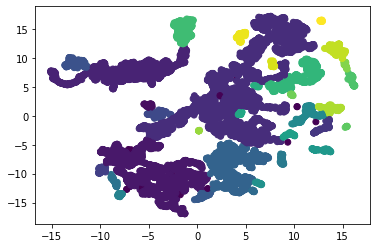



1 eps and 2 min samples.
The silhoutte score of the DBSCAN solution: -0.2690548896789551
DB Index:  1.4679577289247612


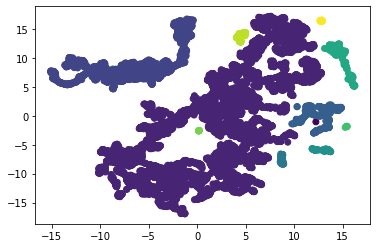



1 eps and 3 min samples.
The silhoutte score of the DBSCAN solution: -0.2690548896789551
DB Index:  1.4679577289247612


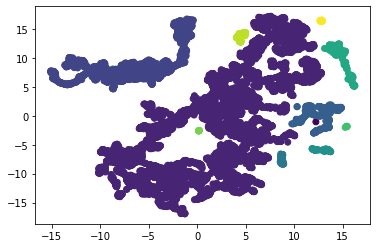



1 eps and 4 min samples.
The silhoutte score of the DBSCAN solution: -0.2690548896789551
DB Index:  1.4679577289247612


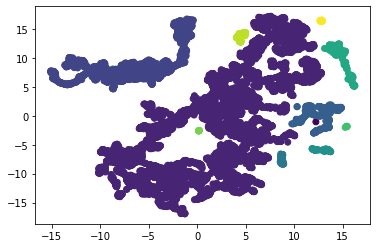



2 eps and 2 min samples.
The silhoutte score of the DBSCAN solution: 0.09452773630619049
DB Index:  1.0031874087025645


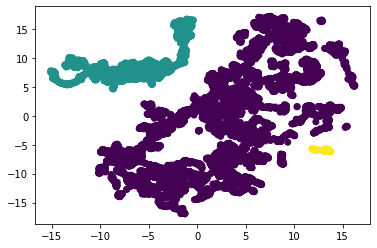



2 eps and 3 min samples.
The silhoutte score of the DBSCAN solution: 0.09452773630619049
DB Index:  1.0031874087025645


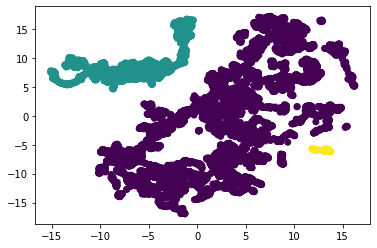



2 eps and 4 min samples.
The silhoutte score of the DBSCAN solution: 0.09452773630619049
DB Index:  1.0031874087025645


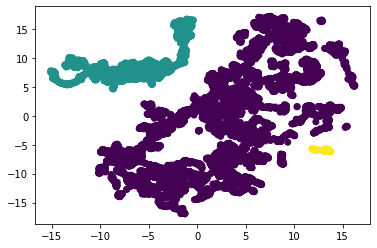



5 eps and 2 min samples.


---------------------------------------------------
DBSCAN with 5 eps and 2 min samples was unable to find any clusters.
---------------------------------------------------


5 eps and 3 min samples.


---------------------------------------------------
DBSCAN with 5 eps and 3 min samples was unable to find any clusters.
---------------------------------------------------


5 eps and 4 min samples.


---------------------------------------------------
DBSCAN with 5 eps and 4 min samples was unable to find any clusters.
---------------------------------------------------


The greatest silhouette score is 0.36206376552581787.


In [181]:
silhouettes_dbumap = []
eps = [0.1, 0.5, 1, 2, 5]
min_samples = [2, 3, 4]
dbs_dbscan_umap = []

for ep in eps:
    

    for min_sample in min_samples:
        print(ep, 'eps and', min_sample, 'min samples.')
        dbscan_cluster = DBSCAN(eps=ep, min_samples=min_sample)
        clusters = dbscan_cluster.fit_predict(umap_results)
        try: 
            print("The silhoutte score of the DBSCAN solution: {}".format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
            silhouettes_dbumap.append(metrics.silhouette_score(umap_results, clusters, metric='euclidean'))
            db = metrics.davies_bouldin_score(umap_results, clusters)
            dbs_dbscan_umap.append(db)
            print('DB Index: ', db)
            plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
            plt.show()
            print('\n')
        except ValueError:
            print('\n')
            print('---------------------------------------------------')
            print('DBSCAN with', ep, 'eps and', min_sample, 'min samples was unable to find any clusters.')
            print('---------------------------------------------------')
            print('\n')
            
            
            
print('The greatest silhouette score is {}.'.format(max(silhouettes_dbumap)))

In [171]:
umap_results = umap.UMAP(n_neighbors=250,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X_all)

dbscan_cluster = DBSCAN(eps=0.1, min_samples=2)
clusters = dbscan_cluster.fit_predict(umap_results).labels_
unique, counts = np.unique(clusters, return_counts=True)
print(dict(zip(unique, counts)))
outbreaks['dbscan_umap_clusters'] = clusters
# outbreaks[outbreaks['dbscan_umap_clusters'] == 3]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

## GMM With PCA Components for All Features

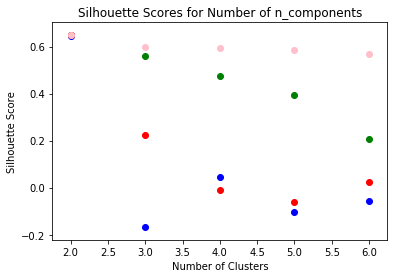

Best Silhouette score with full covariance is 0.6429449948910677 with 2 clusters. 
Best Silhouette score with tied covariance is 0.6476308814471191 with 2 clusters. 
Best Silhouette score with diag covariance is 0.647923021964813 with 2 clusters. 
Best Silhouette score with spherical covariance is 0.6475950331329288 with 2 clusters. 
Best Davies Bouldin score:  0.44526212368059215


In [194]:
# With PCA components from features with greater than 0.01 correlation

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
silhouettes_gmmumap = []
n_components = [2, 3, 4, 5, 6]
dbs_gmmpca = []



# looping through cluster numbers to find the best cluster
silhouettes_gmmpca_full = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='full')
        cluster_labels = gmm_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_gmmpca_full[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_gmmpca.append(db)
        
silhouettes_gmmpca_tied = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='tied')
        cluster_labels = gmm_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_gmmpca_tied[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_gmmpca.append(db)
        
silhouettes_gmmpca_diag = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='diag')
        cluster_labels = gmm_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_gmmpca_diag[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_gmmpca.append(db)
        
silhouettes_gmmpca_spherical = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='spherical')
        cluster_labels = gmm_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_gmmpca_spherical[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_gmmpca.append(db)

        
# plotting the silhouette scores
 
fig, ax = plt.subplots()
ax.scatter(list(silhouettes_gmmpca_full.values()), list(silhouettes_gmmpca_full.keys()), color='blue', label='full')
ax.scatter(list(silhouettes_gmmpca_tied.values()), list(silhouettes_gmmpca_tied.keys()), color='green', label='tied')
ax.scatter(list(silhouettes_gmmpca_diag.values()), list(silhouettes_gmmpca_diag.keys()), color='red', label='diag')
ax.scatter(list(silhouettes_gmmpca_spherical.values()), list(silhouettes_gmmpca_spherical.keys()), color='pink', label='spherical')
plt.title('Silhouette Scores for Number of n_components') 
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
plt.show()


print('Best Silhouette score with full covariance is {} with {} number of components. '.format(max(silhouettes_gmmpca_full.keys()), silhouettes_gmmpca_full[max(silhouettes_gmmpca_full.keys())]))
print('Best Silhouette score with tied covariance is {} with {} number of components. '.format(max(silhouettes_gmmpca_tied.keys()), silhouettes_gmmpca_tied[max(silhouettes_gmmpca_tied.keys())]))
print('Best Silhouette score with diag covariance is {} with {} number of components. '.format(max(silhouettes_gmmpca_diag.keys()), silhouettes_gmmpca_diag[max(silhouettes_gmmpca_diag.keys())]))
print('Best Silhouette score with spherical covariance is {} with {} number of components. '.format(max(silhouettes_gmmpca_spherical.keys()), silhouettes_gmmpca_spherical[max(silhouettes_gmmpca_spherical.keys())]))
print('Best Davies Bouldin score: ', min(dbs_gmmpca))

GMM with full covariance type and two components.
The silhoutte score of the GMM solution: 0.6429449948910676


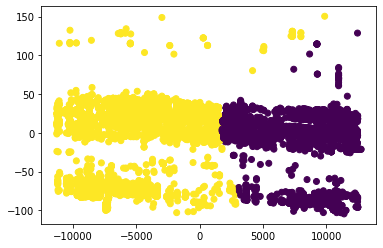



GMM with tied covariance type and two components.
The silhoutte score of the GMM solution: 0.6476308814471191


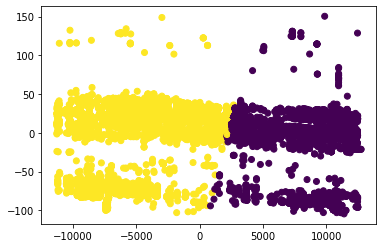



GMM with diag covariance type and two components.
The silhoutte score of the GMM solution: 0.6479230219648129


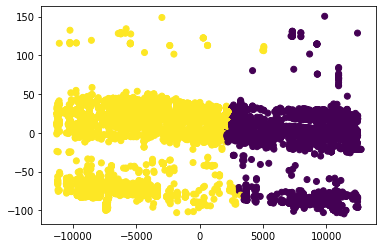



GMM with spherical covariance type and two components.
The silhoutte score of the GMM solution: 0.6475950331329284


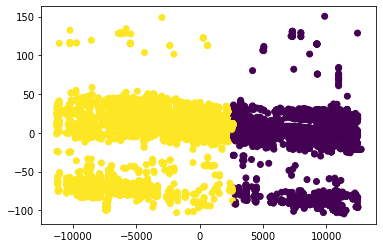

In [74]:
covariance_types = ['full', 'tied', 'diag', 'spherical']

for c_type in covariance_types:
        gmm_cluster = GaussianMixture(n_components=2, random_state=123, 
                                     covariance_type=c_type)
        cluster_labels = gmm_cluster.fit_predict(pca_components)
        print('GMM with', c_type, 'covariance type and two components.')
        print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')))
        plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
        plt.show()
        print('\n')

In [213]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)

gmm_cluster = GaussianMixture(n_components=2, random_state=123, 
                                     covariance_type='diag')
cluster_labels = gmm_cluster.fit_predict(pca_components)
unique, counts = np.unique(cluster_labels, return_counts=True)
print(dict(zip(unique, counts)))
outbreaks['gmm_all_ pca_clusters'] = cluster_labels
outbreaks.head()

{0: 4574, 1: 8128}


Id source   latitude  longitude  region             country  \
0  230399    OIE -27.900000  30.800000  Africa        South Africa   
1  230381    OIE  54.837037  73.354155  Europe  Russian Federation   
3  230396    OIE -26.000000  28.300000  Africa        South Africa   
4  230371    OIE  49.237900  17.700200  Europe      Czech Republic   
5  230370    OIE  49.237300  17.700800  Europe      Czech Republic   

  localityQuality observationDate reportingDate     status  \
0           Exact      2017-08-17    2017-08-22  Confirmed   
1           Exact      2017-08-16    2017-08-18  Confirmed   
3           Exact      2017-08-15    2017-08-22  Confirmed   
4           Exact      2017-08-15    2017-08-17  Confirmed   
5           Exact      2017-08-15    2017-08-17  Confirmed   

               disease        serotypes              speciesDescription  \
0    Influenza - Avian        H5N8 HPAI  [domestic,, unspecified, bird]   
1  African swine fever  UknownSerotypes              [domestic,, swine]   
3    Influenza - Avian        H5N8 HPAI      [wild,, unspecified, bird]   
4  African swine fever  UknownSerotypes             [wild,, wild, boar]   
5  African swine fever  UknownSerotypes             [wild,, wild, boar]   

       sumAtRisk  sumCases  sumDeaths  sumDestroyed  sumSlaughtered  \
0  248000.000000      12.0       12.0  50000.000000        0.000000   
1     122.000000       6.0        1.0      0.000000        0.000000   
3    7500.691709       1.0        1.0      0.000000        0.000000   
4    7500.691709       1.0        1.0   3765.857978      100.211443   
5    7500.691709       1.0        1.0   3765.857978      100.211443   

   humansAge  humansAffected  humansDeaths  differenceInDays  observationYear  \
0   0.000000             1.0           1.0               5.0             2017   
1  17.701311             1.0           1.0               2.0             2017   
3   0.000000             1.0           1.0               7.0             2017   
4  17.701311             1.0           1.0               2.0             2017   
5  17.701311             1.0           1.0               2.0             2017   

   observationMonth  observationDay  observationFirstHalfMonth  \
0                 8              17                          0   
1                 8              16                          0   
3                 8              15                          1   
4                 8              15                          1   
5                 8              15                          1   

   observationSecondHalfMonth  EC  FAO Field Officer  FAO officer  FAO-Report  \
0                           1   0                  0            0           0   
1                           1   0                  0            0           0   
3                           0   0                  0            0           0   
4                           0   0                  0            0           0   
5                           0   0                  0            0           0   

   International reference laboratory  \
0                                   0   
1                                   0   
3                                   0   
4                                   0   
5                                   0   

   National Institute for Communicable Diseases, NICD  National authorities  \
0                                                  0                      0   
1                                                  0                      0   
3                                                  0                      0   
4                                                  0                      0   
5                                                  0                      0   

   OIE  Other  Publications  WHO  sequence only  Africa  Americas  Asia  \
0    1      0             0    0              0       1         0     0   
1    1      0             0    0              0       0         0     0   
3    1      0    

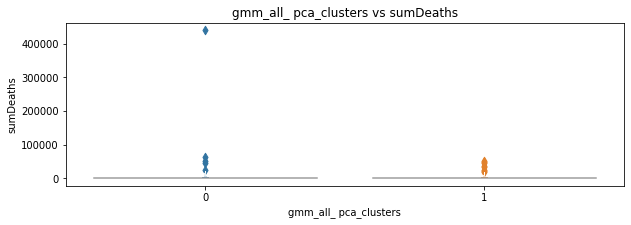

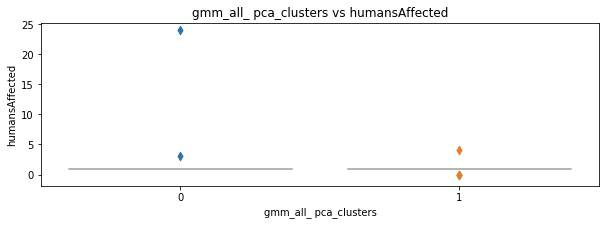

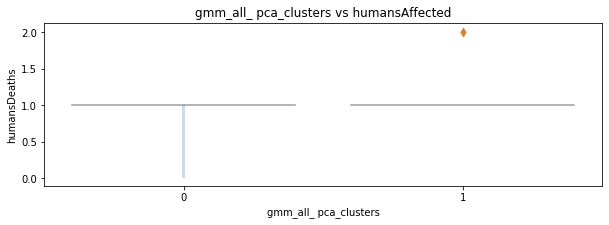

In [214]:
plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['gmm_all_ pca_clusters'], y=outbreaks['sumCases'])
plt.title('gmm_all_ pca_clusters vs sumCases')
box.set_ylim(0, 15000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['gmm_all_ pca_clusters'], y=outbreaks['sumAtRisk'])
plt.title('gmm_all_ pca_clusters vs sumAtRisk')
box.set_ylim(0, 60000)
plt.show()

plt.figure(figsize=(10,3))
bpx = sns.boxenplot(x=outbreaks['gmm_all_ pca_clusters'], y=outbreaks['sumDeaths'])
plt.title('gmm_all_ pca_clusters vs sumDeaths')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['gmm_all_ pca_clusters'], y=outbreaks['humansAffected'])
plt.title('gmm_all_ pca_clusters vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['gmm_all_ pca_clusters'], y=outbreaks['humansDeaths'])
plt.title('gmm_all_ pca_clusters vs humansDeaths')
# scatterplot.set_xlim(0, 600)
plt.show()

## GMM With PCA Components for humansDeaths Features

In [69]:
# With PCA components from features with greater than 0.01 correlation

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)
n_components = [2, 3, 4, 5, 6]
dbs_gmmpca = []



# looping through cluster numbers to find the best cluster
silhouettes_gmmpca_full = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='full')
        cluster_labels = gmm_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_gmmpca_full[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_gmmpca.append(db)
        
silhouettes_gmmpca_tied = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='tied')
        cluster_labels = gmm_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_gmmpca_tied[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_gmmpca.append(db)
        
silhouettes_gmmpca_diag = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='diag')
        cluster_labels = gmm_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_gmmpca_diag[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_gmmpca.append(db)
        
silhouettes_gmmpca_spherical = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='spherical')
        cluster_labels = gmm_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_gmmpca_spherical[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_gmmpca.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of n_components')  
plt.scatter(list(silhouettes_gmmpca_full.values()), list(silhouettes_gmmpca_full.keys()), color='blue')
plt.scatter(list(silhouettes_gmmpca_tied.values()), list(silhouettes_gmmpca_tied.keys()), color='green')
plt.scatter(list(silhouettes_gmmpca_diag.values()), list(silhouettes_gmmpca_diag.keys()), color='red')
plt.scatter(list(silhouettes_gmmpca_spherical.values()), list(silhouettes_gmmpca_spherical.keys()), color='pink')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


print('Best Silhouette score with full covariance is {} with {} clusters. '.format(max(silhouettes_gmmpca_full.keys()), silhouettes_gmmpca_full[max(silhouettes_gmmpca_full.keys())]))
print('Best Silhouette score with tied covariance is {} with {} clusters. '.format(max(silhouettes_gmmpca_tied.keys()), silhouettes_gmmpca_tied[max(silhouettes_gmmpca_tied.keys())]))
print('Best Silhouette score with diag covariance is {} with {} clusters. '.format(max(silhouettes_gmmpca_diag.keys()), silhouettes_gmmpca_diag[max(silhouettes_gmmpca_diag.keys())]))
print('Best Silhouette score with spherical covariance is {} with {} clusters. '.format(max(silhouettes_gmmpca_spherical.keys()), silhouettes_gmmpca_spherical[max(silhouettes_gmmpca_spherical.keys())]))
print('Best Davies Bouldin score: ', min(dbs_gmmpca))

Best Silhouette score with full covariance is 0.596216542414001 with 2 clusters. 
Best Silhouette score with tied covariance is 0.6005880716533035 with 2 clusters. 
Best Silhouette score with diag covariance is 0.5961483016434672 with 2 clusters. 
Best Silhouette score with spherical covariance is 0.602169049247458 with 2 clusters. 
Best Davies Bouldin score:  0.552241318768199


GMM with full covariance type and two components.
The silhoutte score of the GMM solution: 0.5955575062011501
Davies Boulding Score:  0.5554107997570322


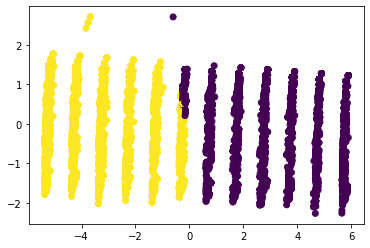



GMM with tied covariance type and two components.
The silhoutte score of the GMM solution: 0.600035022432418
Davies Boulding Score:  0.5537650067474998


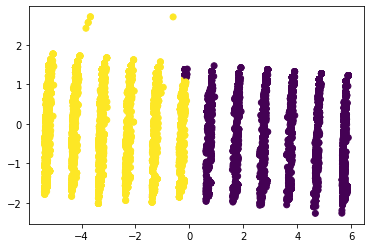



GMM with diag covariance type and two components.
The silhoutte score of the GMM solution: 0.5955133451305592
Davies Boulding Score:  0.5557135498024107


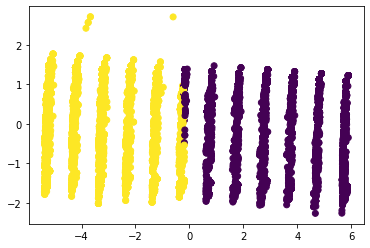



GMM with spherical covariance type and two components.
The silhoutte score of the GMM solution: 0.6006471048533321
Davies Boulding Score:  0.553368682459636


In [207]:
covariance_types = ['full', 'tied', 'diag', 'spherical']

for c_type in covariance_types:
        gmm_cluster = GaussianMixture(n_components=2, random_state=123, 
                                     covariance_type=c_type)
        cluster_labels = gmm_cluster.fit_predict(pca_components)
        print('GMM with', c_type, 'covariance type and two components.')
        print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')))
        print('Davies Boulding Score: ', metrics.davies_bouldin_score(pca_components, cluster_labels))
        plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
        plt.show()
        print('\n')
        
        

{0: 12240, 1: 9678}


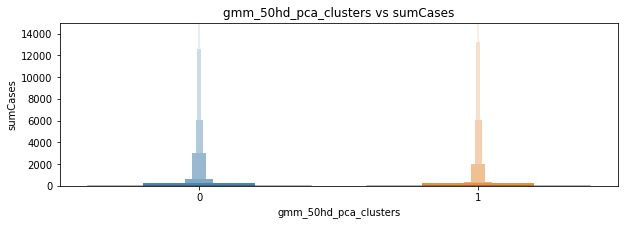

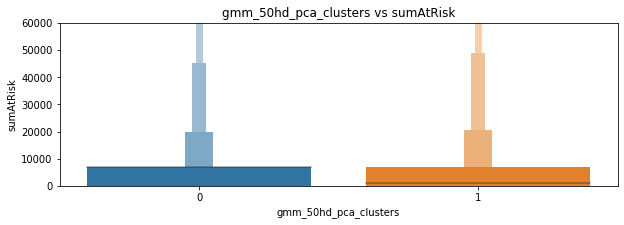

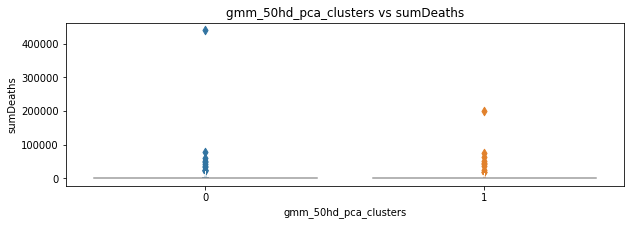

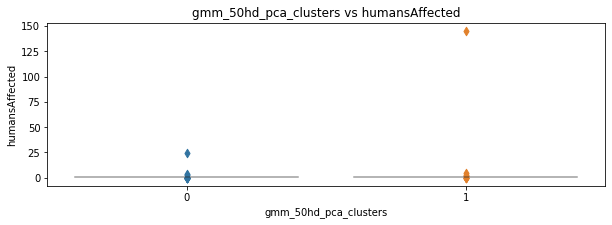

In [33]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)

gmm_cluster = GaussianMixture(n_components=2, random_state=123, 
                                     covariance_type='diag')
cluster_labels = gmm_cluster.fit_predict(pca_components)
unique, counts = np.unique(cluster_labels, return_counts=True)
print(dict(zip(unique, counts)))
outbreaks['gmm_50hd_pca_clusters'] = cluster_labels

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['gmm_50hd_pca_clusters'], y=outbreaks['sumCases'])
plt.title('gmm_50hd_pca_clusters vs sumCases')
box.set_ylim(0, 15000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['gmm_50hd_pca_clusters'], y=outbreaks['sumAtRisk'])
plt.title('gmm_50hd_pca_clusters vs sumAtRisk')
box.set_ylim(0, 60000)
plt.show()

plt.figure(figsize=(10,3))
bpx = sns.boxenplot(x=outbreaks['gmm_50hd_pca_clusters'], y=outbreaks['sumDeaths'])
plt.title('gmm_50hd_pca_clusters vs sumDeaths')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['gmm_50hd_pca_clusters'], y=outbreaks['humansAffected'])
plt.title('gmm_50hd_pca_clusters vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['gmm_50hd_pca_clusters'], y=outbreaks['humansDeaths'])
plt.title('gmm_50hd_pca_clusters vs humansDeaths')
# scatterplot.set_xlim(0, 600)
plt.show()

## GMM with UMAP Components for All Features

In [76]:
# With UMAP components from all features
umap_results = umap.UMAP(n_neighbors=250,
                     min_dist=0.5,
                     metric='correlation').fit_transform(X_all)
n_components = [2, 3, 4, 5, 6]
dbs_gmm_umap = []

# looping through cluster numbers to find the best cluster
silhouettes_gmm_umap_full = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='full')
        cluster_labels = gmm_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_gmm_umap_full[silhouette] = n
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_gmm_umap.append(db)
        
silhouettes_gmm_umap_tied = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='tied')
        cluster_labels = gmm_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_gmm_umap_tied[silhouette] = n
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_gmm_umap.append(db)
        
silhouettes_gmm_umap_diag = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='diag')
        cluster_labels = gmm_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_gmm_umap_diag[silhouette] = n
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_gmm_umap.append(db)
        
silhouettes_gmm_umap_spherical = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='spherical')
        cluster_labels = gmm_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_gmm_umap_spherical[silhouette] = n
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_gmm_umap.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of n_components')  
plt.scatter(list(silhouettes_gmm_umap_full.values()), list(silhouettes_gmm_umap_full.keys()), color='blue')
plt.scatter(list(silhouettes_gmm_umap_tied.values()), list(silhouettes_gmm_umap_tied.keys()), color='green')
plt.scatter(list(silhouettes_gmm_umap_diag.values()), list(silhouettes_gmm_umap_diag.keys()), color='red')
plt.scatter(list(silhouettes_gmm_umap_spherical.values()), list(silhouettes_gmm_umap_spherical.keys()), color='pink')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


print('Best Silhouette score with full covariance is {} with {} clusters. '.format(max(silhouettes_gmm_umap_full.keys()), silhouettes_gmm_umap_full[max(silhouettes_gmm_umap_full.keys())]))
print('Best Silhouette score with tied covariance is {} with {} clusters. '.format(max(silhouettes_gmm_umap_tied.keys()), silhouettes_gmm_umap_tied[max(silhouettes_gmm_umap_tied.keys())]))
print('Best Silhouette score with diag covariance is {} with {} clusters. '.format(max(silhouettes_gmm_umap_diag.keys()), silhouettes_gmm_umap_diag[max(silhouettes_gmm_umap_diag.keys())]))
print('Best Silhouette score with spherical covariance is {} with {} clusters. '.format(max(silhouettes_gmm_umap_spherical.keys()), silhouettes_gmm_umap_spherical[max(silhouettes_gmm_umap_spherical.keys())]))
print('Best Davies Bouldin score: ', min(dbs_gmm_umap))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


Best Silhouette score with full covariance is 0.46797803044319153 with 3 clusters. 
Best Silhouette score with tied covariance is 0.44427502155303955 with 3 clusters. 
Best Silhouette score with diag covariance is 0.4466395676136017 with 3 clusters. 
Best Silhouette score with spherical covariance is 0.44621336460113525 with 3 clusters. 
Best Davies Bouldin score:  0.46722687191420664


In [82]:
umap_results = umap.UMAP(n_neighbors=250,
                     min_dist=0.5,
                     metric='correlation').fit_transform(X_all)

gmm_cluster = GaussianMixture(n_components=3, random_state=123, 
                                     covariance_type='full')
cluster_labels = gmm_cluster.fit_predict(umap_results)
print('GMM with full covariance type and three components.')
print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')))
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()
print('\n')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


GMM with full covariance type and three components.
The silhoutte score of the GMM solution: 0.45538419485092163


## GMM With UMAP Components for humansDeaths Features

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


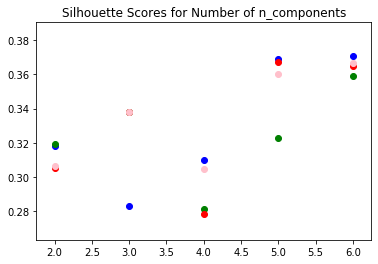

Best Silhouette score with full covariance is 0.37078675627708435 with 6 clusters. 
Best Silhouette score with tied covariance is 0.3592093586921692 with 6 clusters. 
Best Silhouette score with diag covariance is 0.36734911799430847 with 5 clusters. 
Best Silhouette score with spherical covariance is 0.36651408672332764 with 6 clusters. 
Best Davies Bouldin score:  0.7720107208106041


In [79]:
# With UMAP components from all features
umap_results = umap.UMAP(n_neighbors=250,
                     min_dist=0.5,
                     metric='correlation').fit_transform(X_50hd)
n_components = [2, 3, 4, 5, 6]
dbs_gmm_umap = []

# looping through cluster numbers to find the best cluster
silhouettes_gmm_umap_full = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='full')
        cluster_labels = gmm_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_gmm_umap_full[silhouette] = n
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_gmm_umap.append(db)
        
silhouettes_gmm_umap_tied = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='tied')
        cluster_labels = gmm_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_gmm_umap_tied[silhouette] = n
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_gmm_umap.append(db)
        
silhouettes_gmm_umap_diag = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='diag')
        cluster_labels = gmm_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_gmm_umap_diag[silhouette] = n
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_gmm_umap.append(db)
        
silhouettes_gmm_umap_spherical = {} # silhoutte scores are keys, n_components are values
for n in n_components:
        gmm_cluster = GaussianMixture(n_components=n, random_state=123, 
                                     covariance_type='spherical')
        cluster_labels = gmm_cluster.fit_predict(umap_results)
        silhouette = metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')
        silhouettes_gmm_umap_spherical[silhouette] = n
        db = metrics.davies_bouldin_score(umap_results, cluster_labels)
        dbs_gmm_umap.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of n_components')  
plt.scatter(list(silhouettes_gmm_umap_full.values()), list(silhouettes_gmm_umap_full.keys()), color='blue')
plt.scatter(list(silhouettes_gmm_umap_tied.values()), list(silhouettes_gmm_umap_tied.keys()), color='green')
plt.scatter(list(silhouettes_gmm_umap_diag.values()), list(silhouettes_gmm_umap_diag.keys()), color='red')
plt.scatter(list(silhouettes_gmm_umap_spherical.values()), list(silhouettes_gmm_umap_spherical.keys()), color='pink')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


print('Best Silhouette score with full covariance is {} with {} clusters. '.format(max(silhouettes_gmm_umap_full.keys()), silhouettes_gmm_umap_full[max(silhouettes_gmm_umap_full.keys())]))
print('Best Silhouette score with tied covariance is {} with {} clusters. '.format(max(silhouettes_gmm_umap_tied.keys()), silhouettes_gmm_umap_tied[max(silhouettes_gmm_umap_tied.keys())]))
print('Best Silhouette score with diag covariance is {} with {} clusters. '.format(max(silhouettes_gmm_umap_diag.keys()), silhouettes_gmm_umap_diag[max(silhouettes_gmm_umap_diag.keys())]))
print('Best Silhouette score with spherical covariance is {} with {} clusters. '.format(max(silhouettes_gmm_umap_spherical.keys()), silhouettes_gmm_umap_spherical[max(silhouettes_gmm_umap_spherical.keys())]))
print('Best Davies Bouldin score: ', min(dbs_gmm_umap))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 7 separate connected components using meta-embedding (experimental)
  n_components


GMM with full covariance type and three components.
The silhoutte score of the GMM solution: 0.32544541358947754


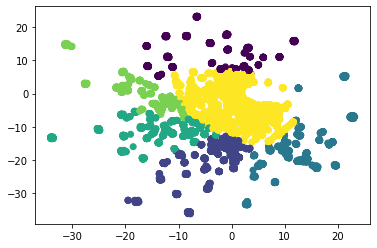

In [84]:
umap_results = umap.UMAP(n_neighbors=250,
                     min_dist=0.5,
                     metric='correlation').fit_transform(X_50hd)

gmm_cluster = GaussianMixture(n_components=6, random_state=123, 
                                     covariance_type='full')
cluster_labels = gmm_cluster.fit_predict(umap_results)
print('GMM with full covariance type and three components.')
print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(umap_results, cluster_labels, metric='euclidean')))
plt.scatter(umap_results[:,0], umap_results[:,1], c=cluster_labels)
plt.show()
print('\n')

GMM with full covariance type and 2 components.
The silhoutte score of the GMM solution: 0.4024505913257599


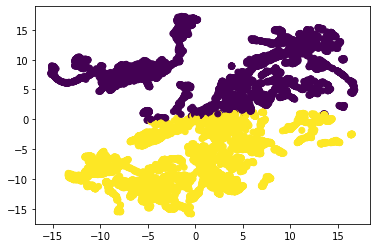



GMM with full covariance type and 3 components.
The silhoutte score of the GMM solution: 0.46771878004074097


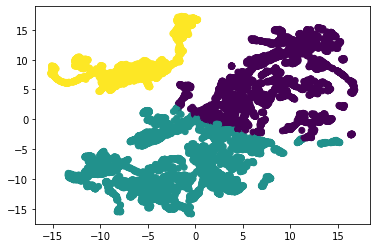



GMM with full covariance type and 4 components.
The silhoutte score of the GMM solution: 0.42993175983428955




GMM with tied covariance type and 2 components.
The silhoutte score of the GMM solution: 0.39471200108528137




GMM with tied covariance type and 3 components.
The silhoutte score of the GMM solution: 0.47373032569885254


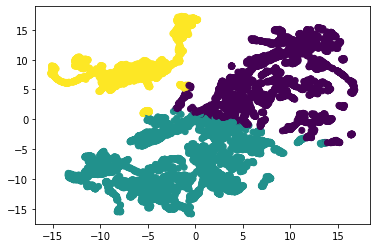



GMM with tied covariance type and 4 components.
The silhoutte score of the GMM solution: 0.43821293115615845




GMM with diag covariance type and 2 components.
The silhoutte score of the GMM solution: 0.40359869599342346


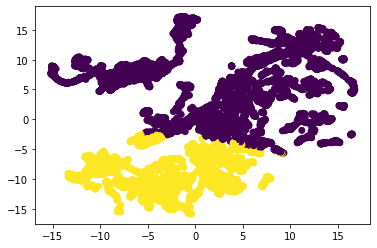



GMM with diag covariance type and 3 components.
The silhoutte score of the GMM solution: 0.4769498407840729


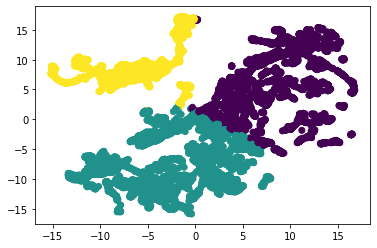



GMM with diag covariance type and 4 components.
The silhoutte score of the GMM solution: 0.4345618188381195




GMM with spherical covariance type and 2 components.
The silhoutte score of the GMM solution: 0.39486831426620483




GMM with spherical covariance type and 3 components.
The silhoutte score of the GMM solution: 0.4708309471607208




GMM with spherical covariance type and 4 components.
The silhoutte score of the GMM solution: 0.44742849469184875




The greatest silhouette score is 0.4769498407840729.


In [38]:
silhouettes_gmmumap = []
covariance_types = ['full', 'tied', 'diag', 'spherical']

for c_type in covariance_types:
        gmm_cluster = GaussianMixture(n_components=2, random_state=123, 
                                     covariance_type=c_type)
        clusters = gmm_cluster.fit_predict(umap_results)
        print('GMM with', c_type, 'covariance type and', n, 'components.')
        print("The silhoutte score of the GMM solution: {}".format(metrics.silhouette_score(umap_results, clusters, metric='euclidean')))
        silhouettesgmm_umap.append(metrics.silhouette_score(umap_results, clusters, metric='euclidean'))
        plt.scatter(umap_results[:,0], umap_results[:,1], c=clusters)
        plt.show()
        print('\n')
        
print('The greatest silhouette score is {}.'.format(max(silhouettes_gmmumap)))

In [37]:
print(silhouettes)

[0.2389757046596071, 0.13861990765488535, 0.11399873887651056, -0.0775588669722165, 0.05261414081572756, 0.15915041900950497, 0.14095555842770388, -0.09253517519182018, 0.04742101082042384, 0.14254185729837013, 0.08722610707068036, -0.07423207162294544, 0.06308091713722512, 0.11371808641504058, 0.09000811603219577, -0.0837221801524133]


In [ ]:
bar graph of each feature with the average in each cluster
group by cluster

In [75]:
gmm_cluster = GaussianMixture(n_components=2, random_state=123, covariance_type='tied')
gmm_clusters = gmm_cluster.fit_predict(pca_components)
unique, counts = np.unique(clusters, return_counts=True)
print(dict(zip(unique, counts)))
outbreaks['gmm_cluster'] = gmm_clusters
outbreaks.head()


{0: 10327, 1: 2375}


Id source   latitude  longitude  region             country  \
0  230399    OIE -27.900000  30.800000  Africa        South Africa   
1  230381    OIE  54.837037  73.354155  Europe  Russian Federation   
3  230396    OIE -26.000000  28.300000  Africa        South Africa   
4  230371    OIE  49.237900  17.700200  Europe      Czech Republic   
5  230370    OIE  49.237300  17.700800  Europe      Czech Republic   

  localityQuality observationDate reportingDate     status  \
0           Exact      2017-08-17    2017-08-22  Confirmed   
1           Exact      2017-08-16    2017-08-18  Confirmed   
3           Exact      2017-08-15    2017-08-22  Confirmed   
4           Exact      2017-08-15    2017-08-17  Confirmed   
5           Exact      2017-08-15    2017-08-17  Confirmed   

               disease  serotypes              speciesDescription  \
0    Influenza - Avian  H5N8 HPAI  [domestic,, unspecified, bird]   
1  African swine fever     Uknown              [domestic,, swine]   
3    Influenza - Avian  H5N8 HPAI      [wild,, unspecified, bird]   
4  African swine fever     Uknown             [wild,, wild, boar]   
5  African swine fever     Uknown             [wild,, wild, boar]   

       sumAtRisk  sumCases  sumDeaths  sumDestroyed  sumSlaughtered  \
0  248000.000000      12.0       12.0  50000.000000        0.000000   
1     122.000000       6.0        1.0      0.000000        0.000000   
3    7500.691709       1.0        1.0      0.000000        0.000000   
4    7500.691709       1.0        1.0   3765.857978      100.211443   
5    7500.691709       1.0        1.0   3765.857978      100.211443   

   humansAge  humansAffected  humansDeaths  differenceInDays  observationYear  \
0   0.000000             1.0           1.0               5.0             2017   
1  17.701311             1.0           1.0               2.0             2017   
3   0.000000             1.0           1.0               7.0             2017   
4  17.701311             1.0           1.0               2.0             2017   
5  17.701311             1.0           1.0               2.0             2017   

   observationMonth  observationDay  observationFirstHalfMonth  \
0                 8              17                          0   
1                 8              16                          0   
3                 8              15                          1   
4                 8              15                          1   
5                 8              15                          1   

   observationSecondHalfMonth  EC  FAO Field Officer  FAO officer  FAO-Report  \
0                           1   0                  0            0           0   
1                           1   0                  0            0           0   
3                           0   0                  0            0           0   
4                           0   0                  0            0           0   
5                           0   0                  0            0           0   

   International reference laboratory  \
0                                   0   
1                                   0   
3                                   0   
4                                   0   
5                                   0   

   National Institute for Communicable Diseases, NICD  National authorities  \
0                                                  0                      0   
1                                                  0                      0   
3                                                  0                      0   
4                                                  0                      0   
5                                                  0                      0   

   OIE  Other  Publications  WHO  sequence only  Africa  Americas  Asia  \
0    1      0             0    0              0       1         0     0   
1    1      0             0    0              0       0         0     0   
3    1      0             0    0              0      

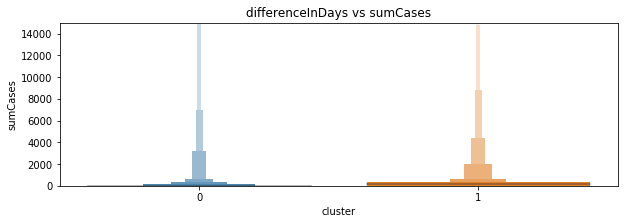

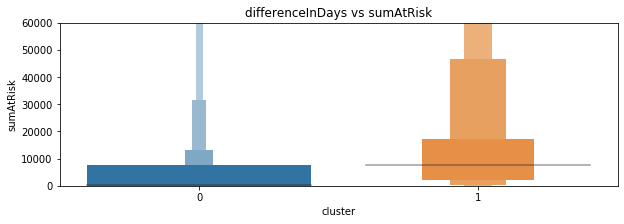

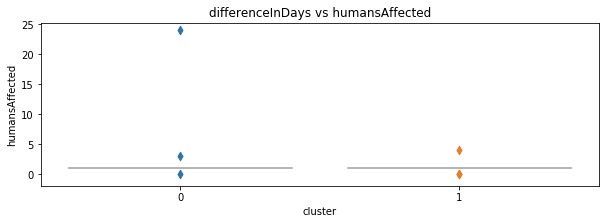

In [76]:
plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['cluster'], y=outbreaks['sumCases'])
plt.title('differenceInDays vs sumCases')
box.set_ylim(0, 15000)
plt.show()

plt.figure(figsize=(10,3))
box = sns.boxenplot(x=outbreaks['cluster'], y=outbreaks['sumAtRisk'])
plt.title('differenceInDays vs sumAtRisk')
box.set_ylim(0, 60000)
plt.show()

plt.figure(figsize=(10,3))
bpx = sns.boxenplot(x=outbreaks['cluster'], y=outbreaks['sumDeaths'])
plt.title('differenceInDays vs sumDeaths')
box.set_ylim(0, 10000)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['cluster'], y=outbreaks['humansAffected'])
plt.title('differenceInDays vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

plt.figure(figsize=(10,3))
sns.boxenplot(x=outbreaks['cluster'], y=outbreaks['humansDeaths'])
plt.title('differenceInDays vs humansAffected')
# scatterplot.set_xlim(0, 600)
plt.show()

 ## OPTICS with PCA Components for All Features

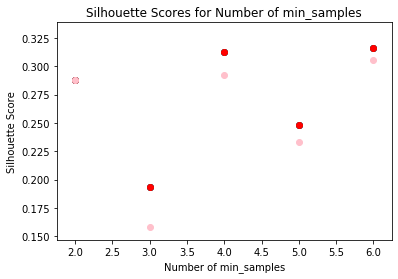

Best Silhouette score with auto algorithm is 0.31606587023443944 with 6 clusters. 
Best Silhouette score with ball_tree algorithm is 0.31606587023443944 with 6 clusters. 
Best Silhouette score with kd_tree algorithm is 0.31606587023443944 with 6 clusters. 
Best Silhouette score with brute algorithm is 0.30509923634284 with 6 clusters. 
Best Davies Bouldin score:  2.8681132794269875


In [197]:
# With PCA components from features with greater than 0.01 correlation

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)
silhouettes_optics_pca = []
min_samples = [2, 3, 4, 5, 6]
dbs_optics_pca = []

# looping through cluster numbers to find the best cluster
silhouettes_optics_pca_auto = {} # silhoutte scores are keys, n_components are values
for n in min_samples:
        optics_cluster = OPTICS(min_samples=n, algorithm='auto')
        cluster_labels = optics_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_optics_pca_auto[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_optics_pca.append(db)
        
silhouettes_optics_pca_ball_tree = {} # silhoutte scores are keys, n_components are values
for n in min_samples:
        optics_cluster = OPTICS(min_samples=n, algorithm='ball_tree')
        cluster_labels = optics_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_optics_pca_ball_tree[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_optics_pca.append(db)
        
silhouettes_optics_pca_kd_tree = {} # silhoutte scores are keys, n_components are values
for n in min_samples:
        optics_cluster = OPTICS(min_samples=n, algorithm='kd_tree')
        cluster_labels = optics_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_optics_pca_kd_tree[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_optics_pca.append(db)
        
silhouettes_optics_pca_brute = {} # silhoutte scores are keys, n_components are values
for n in min_samples:
        optics_cluster = OPTICS(min_samples=n, algorithm='brute')
        cluster_labels = optics_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_optics_pca_brute[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_optics_pca.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of min_samples')  
plt.scatter(list(silhouettes_optics_pca_auto.values()), list(silhouettes_optics_pca_auto.keys()), color='blue')
plt.scatter(list(silhouettes_optics_pca_ball_tree.values()), list(silhouettes_optics_pca_ball_tree.keys()), color='green')
plt.scatter(list(silhouettes_optics_pca_kd_tree.values()), list(silhouettes_optics_pca_kd_tree.keys()), color='red')
plt.scatter(list(silhouettes_optics_pca_brute.values()), list(silhouettes_optics_pca_brute.keys()), color='pink')
plt.xlabel('Number of min_samples')
plt.ylabel('Silhouette Score')
plt.show()


print('Best Silhouette score with auto algorithm is {} with {} min_samples. '.format(max(silhouettes_optics_pca_auto.keys()), silhouettes_optics_pca_auto[max(silhouettes_optics_pca_auto.keys())]))
print('Best Silhouette score with ball_tree algorithm is {} with {} min_samples. '.format(max(silhouettes_optics_pca_ball_tree.keys()), silhouettes_optics_pca_ball_tree[max(silhouettes_optics_pca_ball_tree.keys())]))
print('Best Silhouette score with kd_tree algorithm is {} with {} min_samples. '.format(max(silhouettes_optics_pca_kd_tree.keys()), silhouettes_optics_pca_kd_tree[max(silhouettes_optics_pca_kd_tree.keys())]))
print('Best Silhouette score with brute algorithm is {} with {} min_samples. '.format(max(silhouettes_optics_pca_brute.keys()), silhouettes_optics_pca_brute[max(silhouettes_optics_pca_brute.keys())]))
print('Best Davies Bouldin score: ', min(dbs_optics_pca))

OPTICS with auto algorithm and six components.
The silhoutte score of the OPTICS solution: 0.3157713757733178


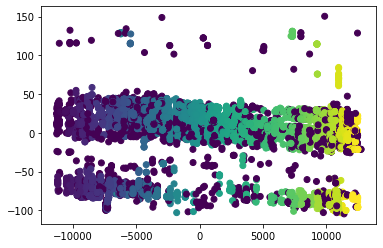



OPTICS with ball_tree algorithm and six components.
The silhoutte score of the OPTICS solution: 0.3157713757733178


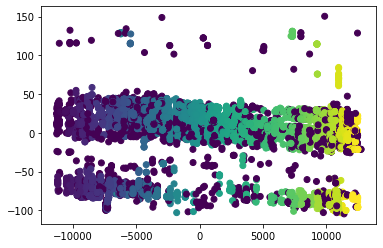



OPTICS with kd_tree algorithm and six components.
The silhoutte score of the OPTICS solution: 0.3157713757733178


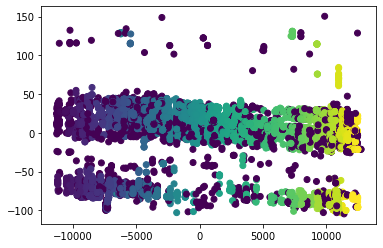



OPTICS with brute algorithm and six components.
The silhoutte score of the OPTICS solution: 0.30461257430356653


In [201]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_all)

algorithm_types = ['auto', 'ball_tree', 'kd_tree', 'brute']

for a_type in algorithm_types:
        optics_cluster = OPTICS(min_samples=6, 
                                     algorithm=a_type)
        cluster_labels = optics_cluster.fit_predict(pca_components)
        print('OPTICS with', a_type, 'algorithm and six components.')
        print("The silhoutte score of the OPTICS solution: {}".format(metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')))
        plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
        plt.show()
        print('\n')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/_optic

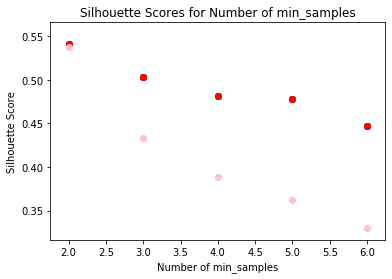

Best Silhouette score with auto algorithm is 0.5407870862634941 with 2 clusters. 
Best Silhouette score with ball_tree algorithm is 0.5407870862634941 with 2 clusters. 
Best Silhouette score with kd_tree algorithm is 0.5407870862634941 with 2 clusters. 
Best Silhouette score with brute algorithm is 0.5379235580090478 with 2 clusters. 
Best Davies Bouldin score:  1.3847680684152064


In [198]:
# With PCA components from features with greater than 0.01 correlation

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)
silhouettes_optics_pca = []
min_samples = [2, 3, 4, 5, 6]
dbs_optics_pca = []

# looping through cluster numbers to find the best cluster
silhouettes_optics_pca_auto = {} # silhoutte scores are keys, n_components are values
for n in min_samples:
        optics_cluster = OPTICS(min_samples=n, algorithm='auto')
        cluster_labels = optics_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_optics_pca_auto[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_optics_pca.append(db)
        
silhouettes_optics_pca_ball_tree = {} # silhoutte scores are keys, n_components are values
for n in min_samples:
        optics_cluster = OPTICS(min_samples=n, algorithm='ball_tree')
        cluster_labels = optics_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_optics_pca_ball_tree[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_optics_pca.append(db)
        
silhouettes_optics_pca_kd_tree = {} # silhoutte scores are keys, n_components are values
for n in min_samples:
        optics_cluster = OPTICS(min_samples=n, algorithm='kd_tree')
        cluster_labels = optics_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_optics_pca_kd_tree[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_optics_pca.append(db)
        
silhouettes_optics_pca_brute = {} # silhoutte scores are keys, n_components are values
for n in min_samples:
        optics_cluster = OPTICS(min_samples=n, algorithm='brute')
        cluster_labels = optics_cluster.fit_predict(pca_components)
        silhouette = metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')
        silhouettes_optics_pca_brute[silhouette] = n
        db = metrics.davies_bouldin_score(pca_components, cluster_labels)
        dbs_optics_pca.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of min_samples')  
plt.scatter(list(silhouettes_optics_pca_auto.values()), list(silhouettes_optics_pca_auto.keys()), color='blue')
plt.scatter(list(silhouettes_optics_pca_ball_tree.values()), list(silhouettes_optics_pca_ball_tree.keys()), color='green')
plt.scatter(list(silhouettes_optics_pca_kd_tree.values()), list(silhouettes_optics_pca_kd_tree.keys()), color='red')
plt.scatter(list(silhouettes_optics_pca_brute.values()), list(silhouettes_optics_pca_brute.keys()), color='pink')
plt.xlabel('Number of min_samples')
plt.ylabel('Silhouette Score')
plt.show()


print('Best Silhouette score with auto algorithm is {} with {} min_samples. '.format(max(silhouettes_optics_pca_auto.keys()), silhouettes_optics_pca_auto[max(silhouettes_optics_pca_auto.keys())]))
print('Best Silhouette score with ball_tree algorithm is {} with {} min_samples. '.format(max(silhouettes_optics_pca_ball_tree.keys()), silhouettes_optics_pca_ball_tree[max(silhouettes_optics_pca_ball_tree.keys())]))
print('Best Silhouette score with kd_tree algorithm is {} with {} min_samples. '.format(max(silhouettes_optics_pca_kd_tree.keys()), silhouettes_optics_pca_kd_tree[max(silhouettes_optics_pca_kd_tree.keys())]))
print('Best Silhouette score with brute algorithm is {} with {} min_samples. '.format(max(silhouettes_optics_pca_brute.keys()), silhouettes_optics_pca_brute[max(silhouettes_optics_pca_brute.keys())]))
print('Best Davies Bouldin score: ', min(dbs_optics_pca))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS with auto algorithm and two min_samples.
The silhoutte score of the OPTICS solution: 0.5358350494460037


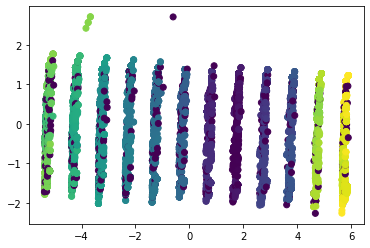

In [206]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_50hd)

optics_cluster = OPTICS(min_samples=2, 
                                     algorithm='auto')
cluster_labels = optics_cluster.fit_predict(pca_components)
print('OPTICS with auto algorithm and two min_samples.')
print("The silhoutte score of the OPTICS solution: {}".format(metrics.silhouette_score(pca_components, cluster_labels, metric='euclidean')))
plt.scatter(pca_components[:,0], pca_components[:,1], c=cluster_labels)
plt.show()
print('\n')

## Spectral Clustering with UMAP Components for All Features

In [34]:
umap_results = umap.UMAP(n_neighbors=100,
                     min_dist=0.1,
                     metric='correlation').fit_transform(X_all)

clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
silhouettes_spectral = []
silhouettes_spectral_dict = {} # silhoutte scores are keys, clusters are values
dbs_spectral = []

# looping through cluster numbers to find the best cluster
for cluster in clusters:
    labels = SpectralClustering(n_clusters=cluster, random_state=123).fit_predict(umap_results)
    spectral_cluster = SpectralClustering(n_clusters=cluster, random_state=123)
    %timeit spectral_cluster.fit(umap_results)
    y_pred = spectral_cluster.predict(umap_results)
    silhouette = metrics.silhouette_score(umap_results, labels, metric='euclidean')
    silhouettes_spectral.append(silhouette)
    silhouettes_spectral_dict[silhouette] = cluster
    db = metrics.davies_bouldin_score(umap_results, labels)
    dbs_spectral.append(db)

# plotting the silhouette scores
plt.title('Silhouette Scores for Number of Clusters')  
plt.scatter(list(silhouettes_spectral_dict.values()), list(silhouettes_spectral_dict.keys()))
plt.show()


print('Best Silhouette score is {} with {} clusters. '.format(max(silhouettes_spectral_dict.keys()), silhouettes_spectral_dict[max(silhouettes_spectral_dict.keys())]))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
print('Best Davies Bouldin score: ', min(dbs_kumap))

# plotting the clusters with the best silhouette score
best_cluster = silhouettes_spectral_dict[max(silhouettes_spectral_dict.keys())]
labels = SpectralClustering(n_clusters=best_cluster, random_state=123).fit_predict(umap_results)
spectral_cluster = SpectralClustering(n_clusters=best_cluster, random_state=123)
%timeit spectral_cluster.fit(umap_results)
y_pred = spectral_cluster.predict(umap_results)

plt.title('Spectral Clustering for {} Clusters'.format(silhouettes_spectral_dict[max(silhouettes_spectral_dict.keys())]))
plt.scatter(umap_results[:,0], umap_results[:,1], c=y_pred)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


KeyboardInterrupt: 

In [ ]:
labels = SpectralClustering(n_clusters=2, random_state=123).fit_predict(umap_results)
spectral_cluster = SpectralClustering(n_clusters=cluster, random_state=123)
get_ipython().run_line_magic('timeit', 'spectral_cluster.fit(umap_results)')
y_pred = spectral_cluster.predict(umap_results)
silhouette = metrics.silhouette_score(umap_results, labels, metric='euclidean')

## Neural Networks

## RBM

In [ ]:
rbm = BernoulliRBM(n_components=64, learning_rate=0.1,
                            batch_size=10, random_state=9)

In [108]:
# number of neurons in the encoding hidden layer
encoding_dim = 5
# input placeholder
input_data = Input(shape=(6,)) # 6 is the number of features/columns
# encoder is the encoded representation of the input
encoded = Dense(encoding_dim, activation ='relu')(input_data)
# decoder is the lossy reconstruction of the input
decoded = Dense(6, activation ='sigmoid')(encoded) # 6 again number of features and should match input_data


# this model maps an input to its reconstruction
autoencoder = Model(input_data, decoded)




# this model maps an input to its encoded representation
encoder = Model(input_data, encoded)
# model optimizer and loss
autoencoder = Model(input_data, decoded)

# loss function and optimizer
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# train test split
x_train, x_test, = train_test_split(data, test_size=0.1, random_state=42)


# train the model
autoencoder.fit(x_train,
                x_train,
                epochs=50,
                batch_size=256,
                shuffle=True)

autoencoder.summary()

# predict after training
# note that we take them from the *test* set
encoded_data = encoder.predict(x_test)

NameError: name 'X' is not defined

For your third capstone, you’ll complete an unsupervised learning project. You can choose your own research question or choose from one below.

Go out and find a dataset of interest. It could be one that helps you work on one of our recommended research questions, or any other dataset that addresses an unsupervised learning question of your own.

Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

Things to keep in mind: how do clustering and modeling compare? What are the advantages of each? Why would you want to use one over the other?

Be prepared to talk about:

Your end-user and the value your project provides to them.


Quantifiable results based on the research you’ve conducted.
The visuals you chose and what they represent for your research.
Next steps you'd take to expand on your work.
A specified research question your model addresses.
How you chose your model specification and what alternatives you compared it to.
The practical uses of your model for an audience of interest.
Any weak points or shortcomings of your model.